# Algorithme de Machine Learning : les TPs

## Kostadinovic Nemanja

https://github.com/wikistat/Apprentissage/blob/master/Pic-ozone/Apprent-R-Ozone.ipynb

## TP1: Introduction à R statistiques

TP de rappel du langage R pour l'étude statistique de données issues du cours:
   - DataFrame 
   - Indicateurs statistiques (moyenne, médiane, quantiles)
   - Graphiques

In [1]:
age = c(43,29,57,45,50,29,37,59,46,31,46,24,33,38,49,31,62,60,52,38,38,26,41,52,60,49,52,41,38,26,37,59,57,41,29,33,33,43,46,57,46,33,46,49,57,57,46,43)

In [2]:
age

[1] 43 29 57 45 50 29 37 59 46 31 46 24 33 38 49 31 62 60 52 38 38 26 41 52 60
[26] 49 52 41 38 26 37 59 57 41 29 33 33 43 46 57 46 33 46 49 57 57 46 43

In [3]:
df = data.frame(age= age)

In [4]:
summary(df$age) # résumé des valeurs statistiques

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.00   36.00   44.00   43.62   52.00   62.00 

In [5]:
mean(df$age) #la moyenne

[1] 43.625

In [6]:
median(df$age) #la médiane

[1] 44

In [7]:
quantile(df$age) #les différents quantiles

0%  25%  50%  75% 100% 
  24   36   44   52   62

In [8]:
var(df$age) #variance

[1] 112.1117

In [9]:
sd(df$age) #écart type

[1] 10.58828

In [10]:
tab_effectifs = table(df$age)

In [11]:
tab_effectifs 


24 26 29 31 33 37 38 41 43 45 46 49 50 52 57 59 60 62 
 1  2  3  2  4  2  4  3  3  1  6  3  1  3  5  2  2  1 

In [12]:
tab_effectifs_total = addmargins(tab_effectifs)

In [13]:
tab_effectifs_total


 24  26  29  31  33  37  38  41  43  45  46  49  50  52  57  59  60  62 Sum 
  1   2   3   2   4   2   4   3   3   1   6   3   1   3   5   2   2   1  48 

In [14]:
cumsum(table(df$age)) # effectifs cumulés

24 26 29 31 33 37 38 41 43 45 46 49 50 52 57 59 60 62 
 1  3  6  8 12 14 18 21 24 25 31 34 35 38 43 45 47 48

In [15]:
table(df$age)/nrow(df)*100 # fréquences


       24        26        29        31        33        37        38        41 
 2.083333  4.166667  6.250000  4.166667  8.333333  4.166667  8.333333  6.250000 
       43        45        46        49        50        52        57        59 
 6.250000  2.083333 12.500000  6.250000  2.083333  6.250000 10.416667  4.166667 
       60        62 
 4.166667  2.083333 

In [16]:
cumsum(table(df$age)/nrow(df)) # fréquences cumulées

24         26         29         31         33         37         38 
0.02083333 0.06250000 0.12500000 0.16666667 0.25000000 0.29166667 0.37500000 
        41         43         45         46         49         50         52 
0.43750000 0.50000000 0.52083333 0.64583333 0.70833333 0.72916667 0.79166667 
        57         59         60         62 
0.89583333 0.93750000 0.97916667 1.00000000

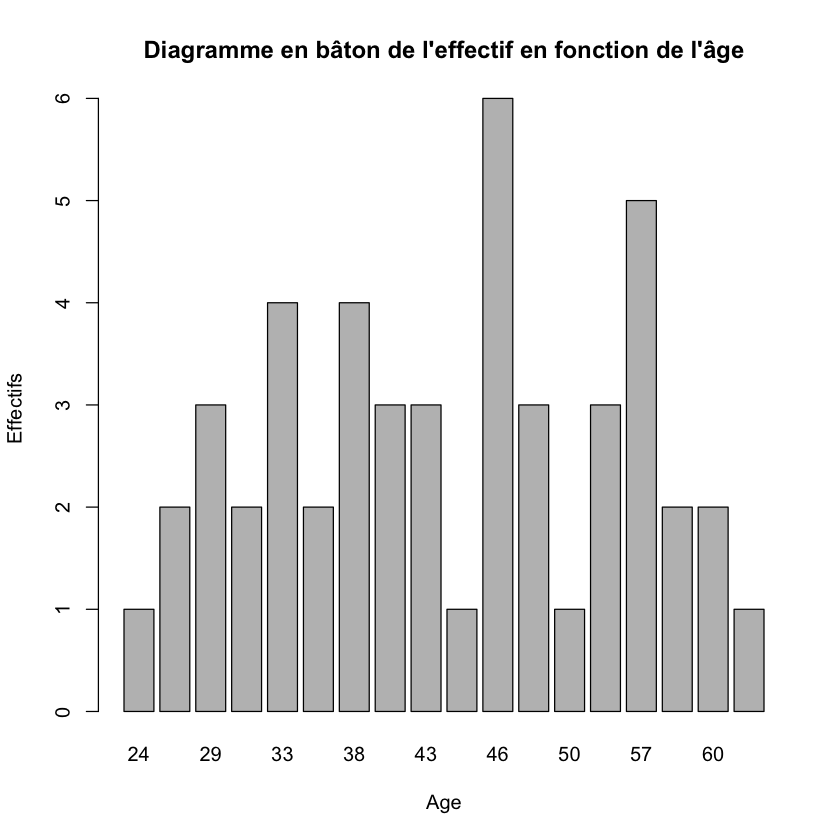

In [17]:
barplot(tab_effectifs, xlab ='Age', ylab='Effectifs', main ='Diagramme en bâton de l\'effectif en fonction de l\'âge')

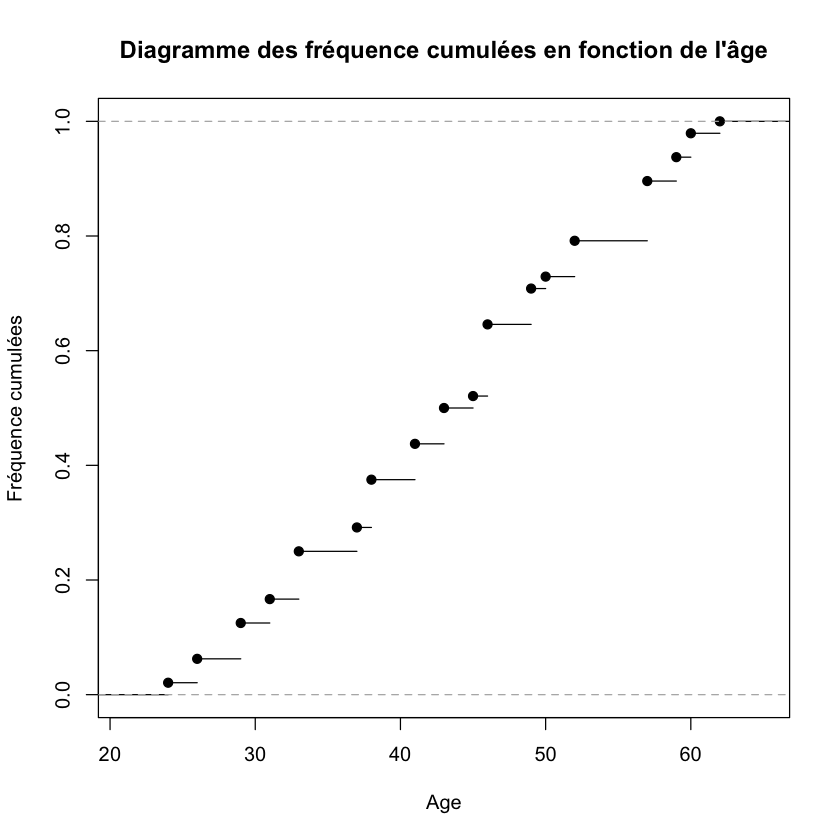

In [18]:
plot(ecdf(df$age), xlab ='Age', ylab='Fréquence cumulées', main='Diagramme des fréquence cumulées en fonction de l\'âge')

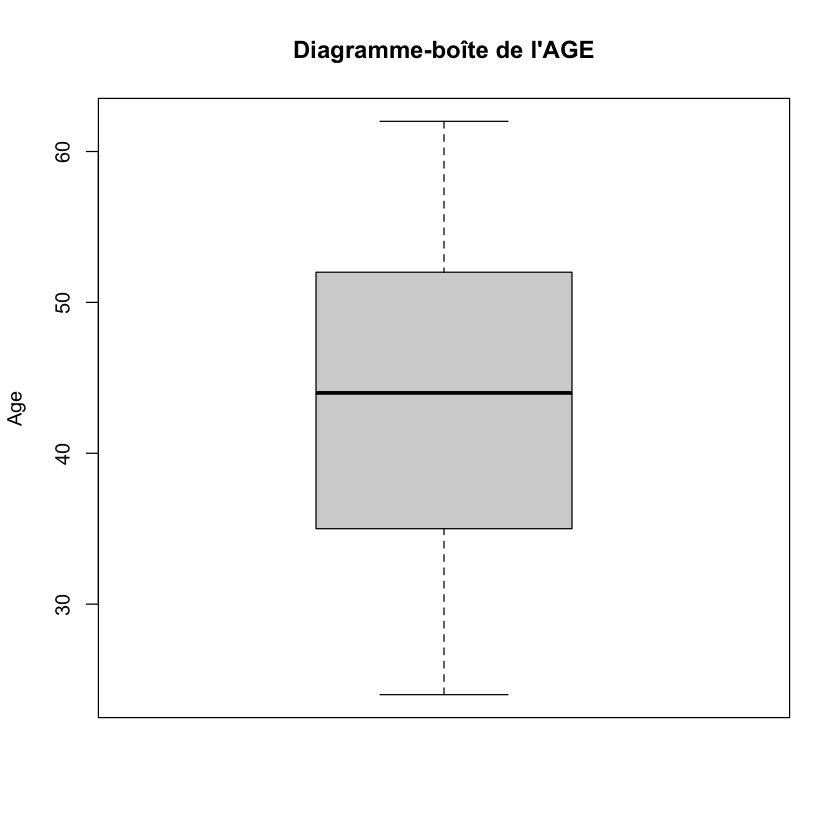

In [19]:
boxplot(df$age, ylab="Age", main='Diagramme-boîte de l\'AGE', col = "lightgray")

## TP 2:

## Description des données Pic-Ozone:

Les données ont été extraites et mises en forme par le service concerné de Météo France. Elles sont décrites par les variables suivantes:
* JOUR Le type de jour ; férié (1) ou pas (0) ;
* O3obs La concentration d'ozone effectivement observée le lendemain à 17h locales correspondant souvent au maximum de pollution observée ;
* MOCAGE Prévision de cette pollution obtenue par un modèle déterministe de mécanique des fluides (équation de Navier et Stockes);
* TEMPE Température prévue par MétéoFrance pour le lendemain 17h ;
* RMH2O Rapport d'humidité ;
* NO2 Concentration en dioxyde d'azote ;
* NO Concentration en monoxyde d'azote ;
* STATION Lieu de l'observation : Aix-en-Provence, Rambouillet, Munchhausen, Cadarache et Plan de Cuques ;
* VentMOD Force du vent ;
* VentANG Orientation du vent.


Ce sont des données "propres", sans trous, bien codées et de petites tailles. Elles présentent donc avant tout un caractère pédagogique car permettant de décliner puis comparer toutes les approches de régression et classification supervisée.

**Attention:** Même si les données sont de qualité, une étude exploratoire préalable est toujours nécessaire pour se familiariser avec les données et les préparer à la phase de modélisation.

In [20]:
# Lecture des données
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
ozone <- read.table(paste(path, "depSeuil.dat", sep = ""), sep = ",", header = TRUE)

# Vérification du contenu
summary(ozone)

      JOUR            O3obs           MOCAGE          TEMPE      
 Min.   :0.0000   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:0.0000   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :0.0000   Median :109.0   Median :125.6   Median :23.80  
 Mean   :0.3045   Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:1.0000   3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :1.0000   Max.   :319.0   Max.   :284.7   Max.   :38.00  
     RMH2O              NO2               NO           STATION         
 Min.   :0.00285   Min.   : 0.258   Min.   :0.0010   Length:1041       
 1st Qu.:0.00763   1st Qu.: 1.248   1st Qu.:0.2360   Class :character  
 Median :0.00985   Median : 2.109   Median :0.3880   Mode  :character  
 Mean   :0.01025   Mean   : 3.505   Mean   :0.6574                     
 3rd Qu.:0.01244   3rd Qu.: 4.062   3rd Qu.:0.7440                     
 Max.   :0.02753   Max.   :44.396   Max.   :9.4290                     
    VentMOD           VentANG     

In [21]:
# Changement du type de la variable jour en facteur
ozone[, "JOUR"] <- as.factor(ozone[, "JOUR"])

### 2. Exploration élémentaire

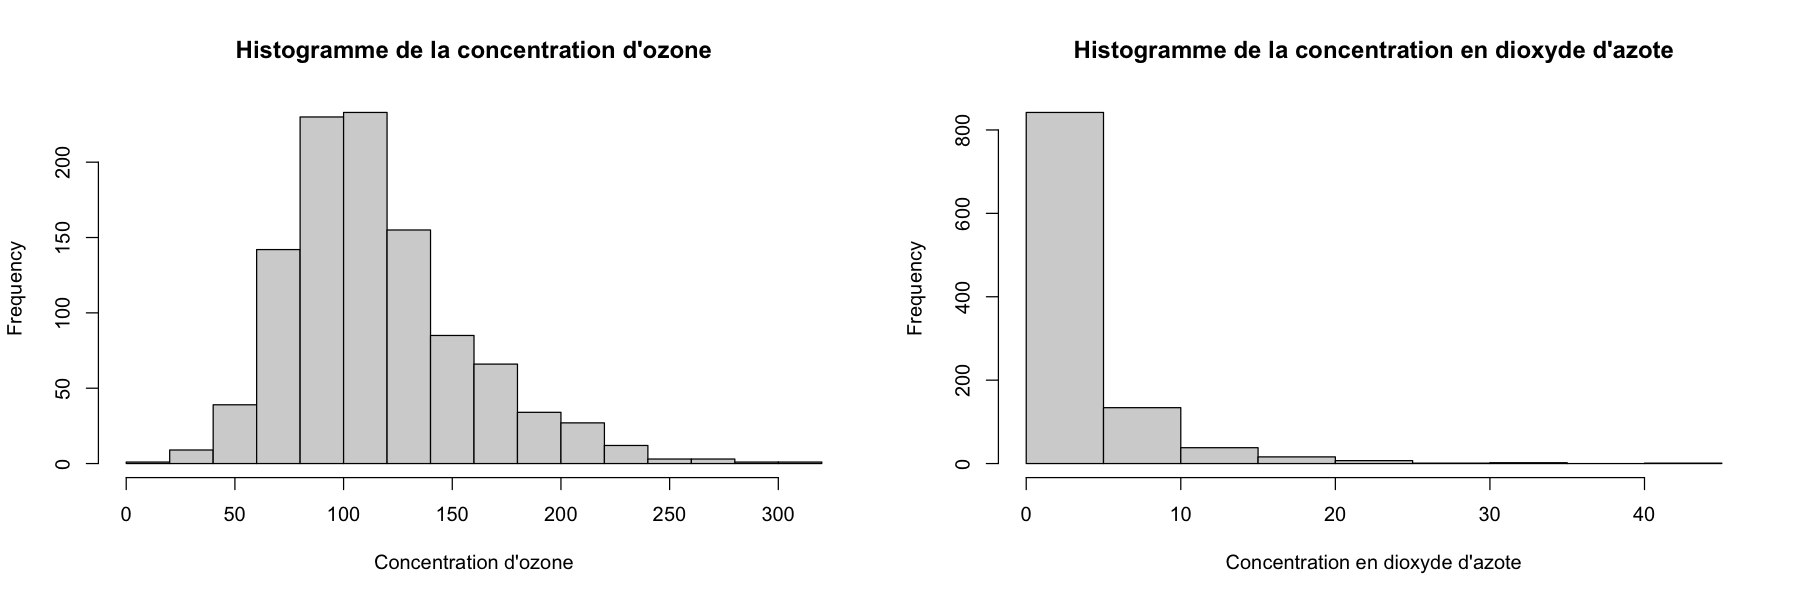

In [22]:
par(mfrow = c(1, 2))
options(repr.plot.width = 15, repr.plot.height = 5) 
hist(ozone[, "O3obs"],xlab='Concentration d\'ozone', main='Histogramme de la concentration d\'ozone', col = "lightgray")
hist(ozone[, "NO2"], xlab='Concentration en dioxyde d\'azote', main='Histogramme de la concentration en dioxyde d\'azote', col = "lightgray")

***
**Remarquer le type des variables. Il est nécessaire d'en étudier la distribution. Noter la symétrie ou non de celles-ci.**
- ce sont des variables continues (type float).
- la concentration d'ozone semble suivre un modèle Gaussien (courbe en cloche, peu symètrique par rapport à la valeur x=100.
- la concentration en dioxyde d'azote semble suivre un modèle exponentiel non symètrique.
***

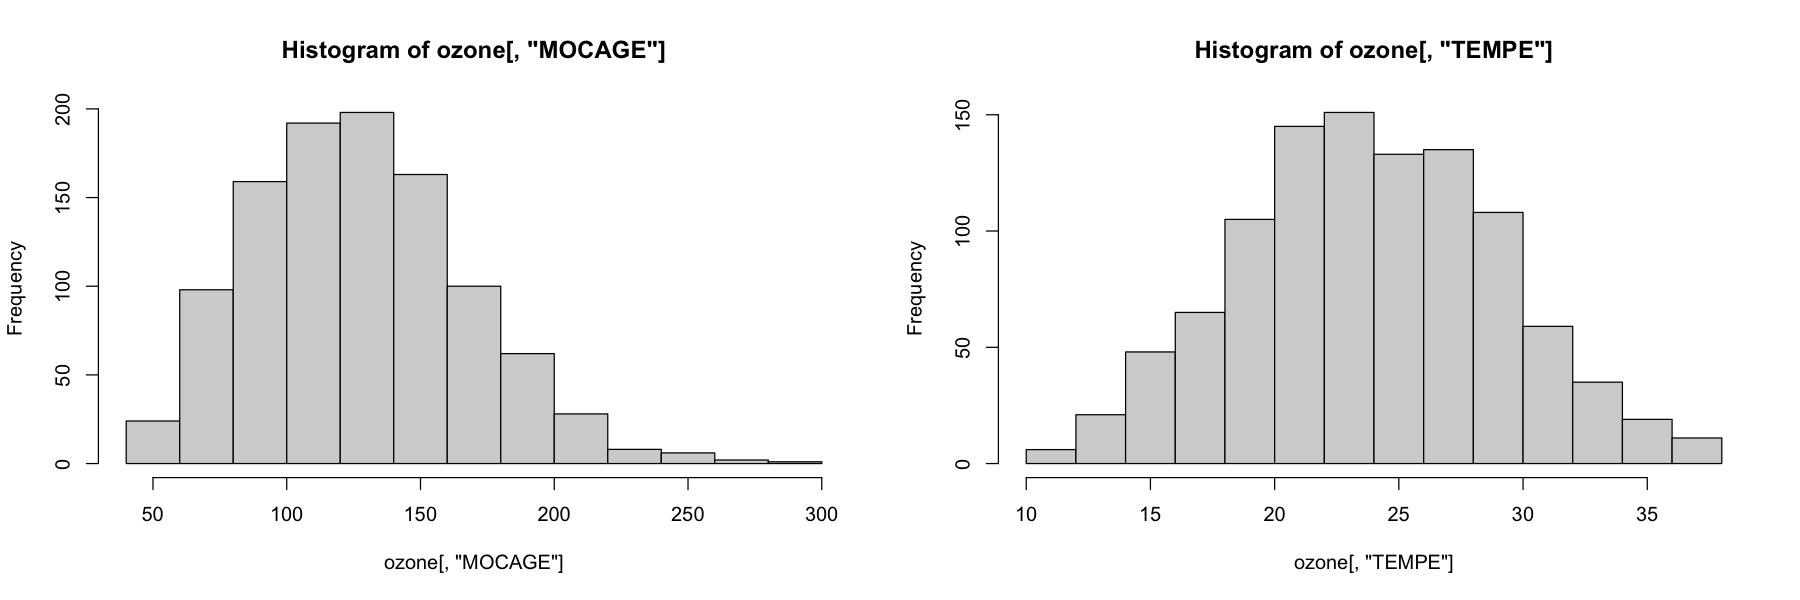

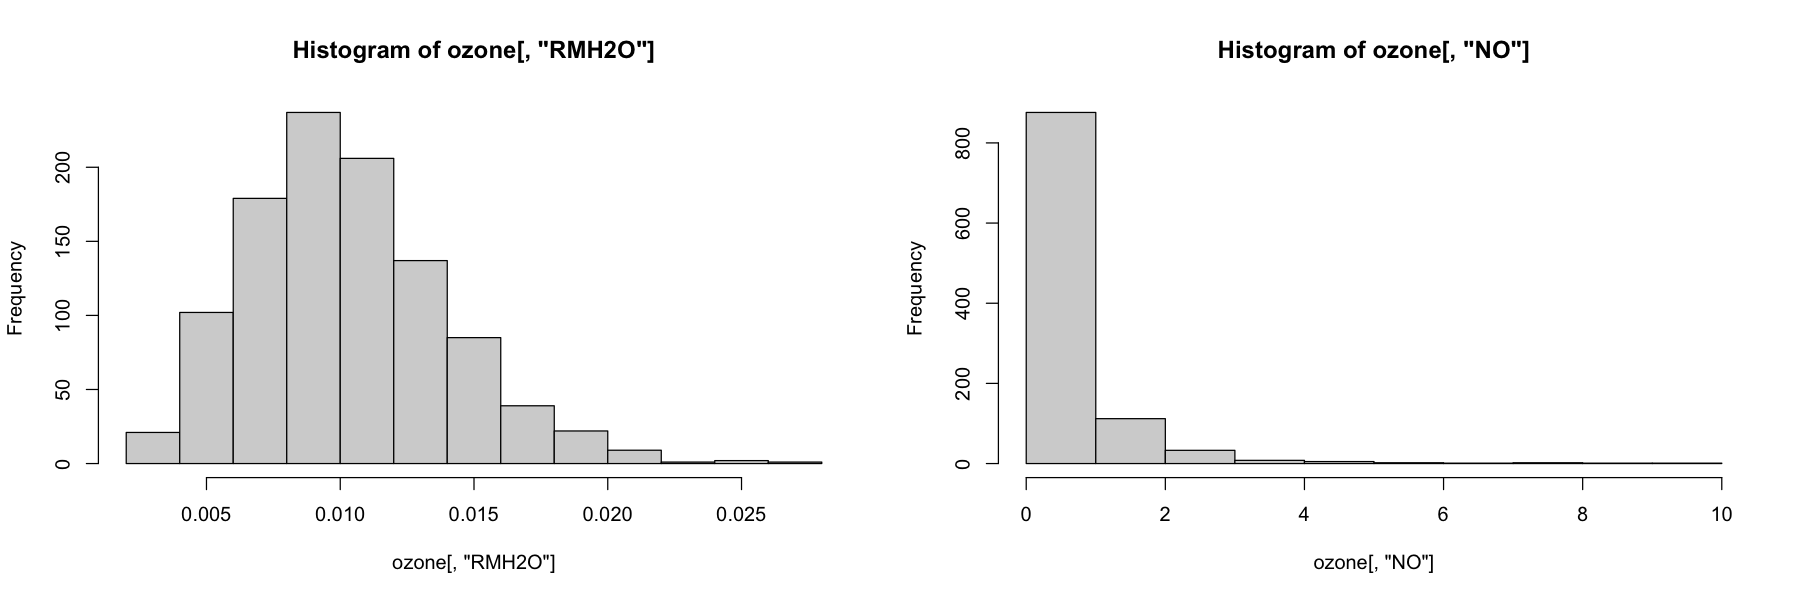

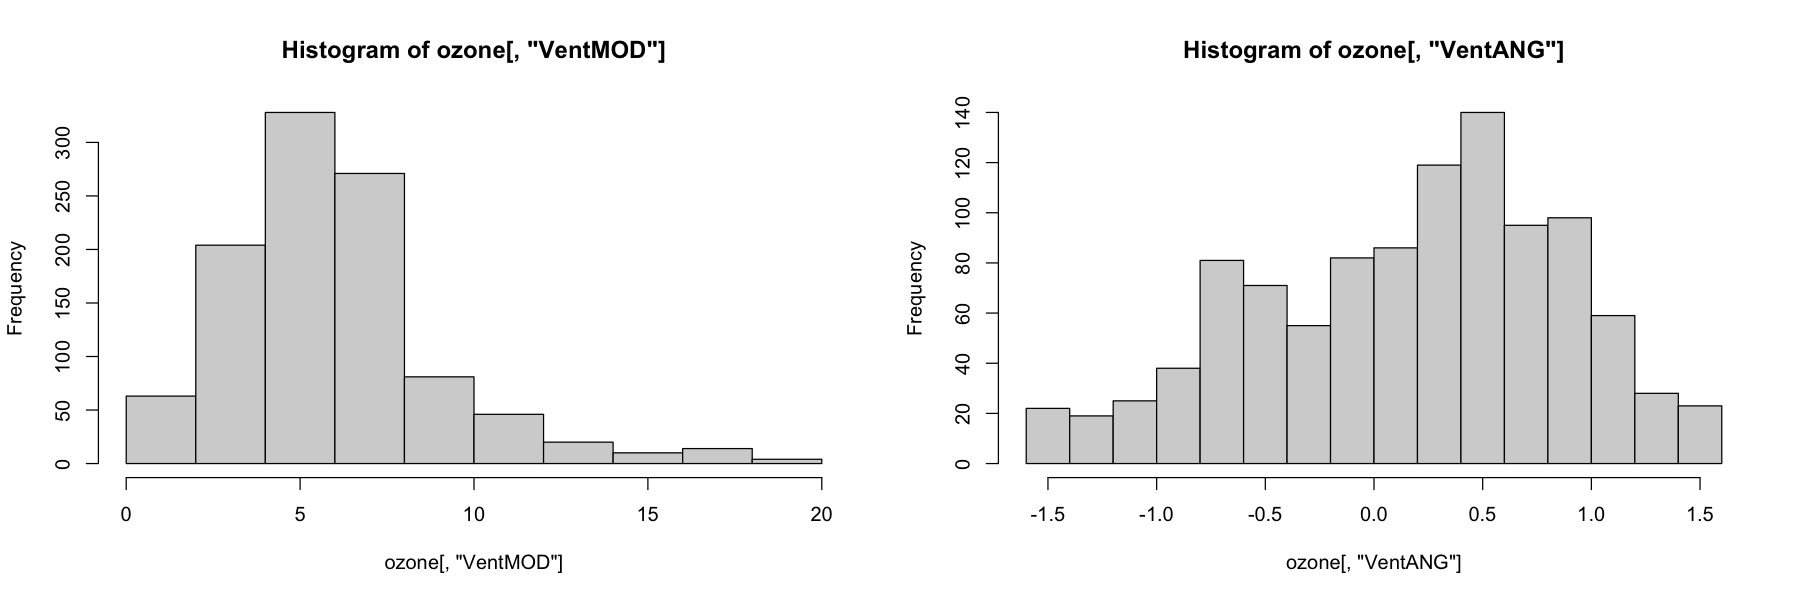

In [23]:
par(mfrow = c(1, 2))
options(repr.plot.width = 15, repr.plot.height = 5)
hist(ozone[,"MOCAGE"]); hist(ozone[,"TEMPE"]); hist(ozone[,"RMH2O"])
hist(ozone[,"NO"]); hist(ozone[,"VentMOD"]); hist(ozone[,"VentANG"])

Des transformations sont proposées pour rendre certaines distributions plus symétriques et  ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir  de modélisation (linéaires),par pour toutes (arbres).

In [24]:
ozone[, "SRMH2O"] <- sqrt(ozone[, "RMH2O"])
ozone[, "LNO2"] <- log(ozone[, "NO2"])
ozone[, "LNO"] <- log(ozone[, "NO"])

Vérifier l'opportunité de ces transformations puis retirer les variables initiales et construire la variable "dépassement de seuil" pour obtenir le fichier qui sera effectivement utilisé.

In [25]:
ozone <- ozone[, c(1:4, 8:13)]
ozone[, "DepSeuil"] <- as.factor(ozone[, "O3obs"] > 150)
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE         STATION         
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Length:1041       
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   Class :character  
         Median :109.0   Median :125.6   Median :23.80   Mode  :character  
         Mean   :115.4   Mean   :127.2   Mean   :23.88                     
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60                     
         Max.   :319.0   Max.   :284.7   Max.   :38.00                     
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548  
 1st Qu.: 3.9623   1st Qu.:-0.3948   1st Qu.:0.08735   1st Qu.: 0.2215  
 Median : 5.5973   Median : 0.2783   Median :0.09925   Median : 0.7462  
 Mean   : 5.9072   Mean   : 0.1631   Mean   :0.09957   Mean   : 0.8440  
 3rd Qu.: 7.1063   3rd Qu.: 0.6926   3rd Qu.:0.11153   3rd Qu.: 1.4017  
 Max.   :19.8910   Max.   : 1.

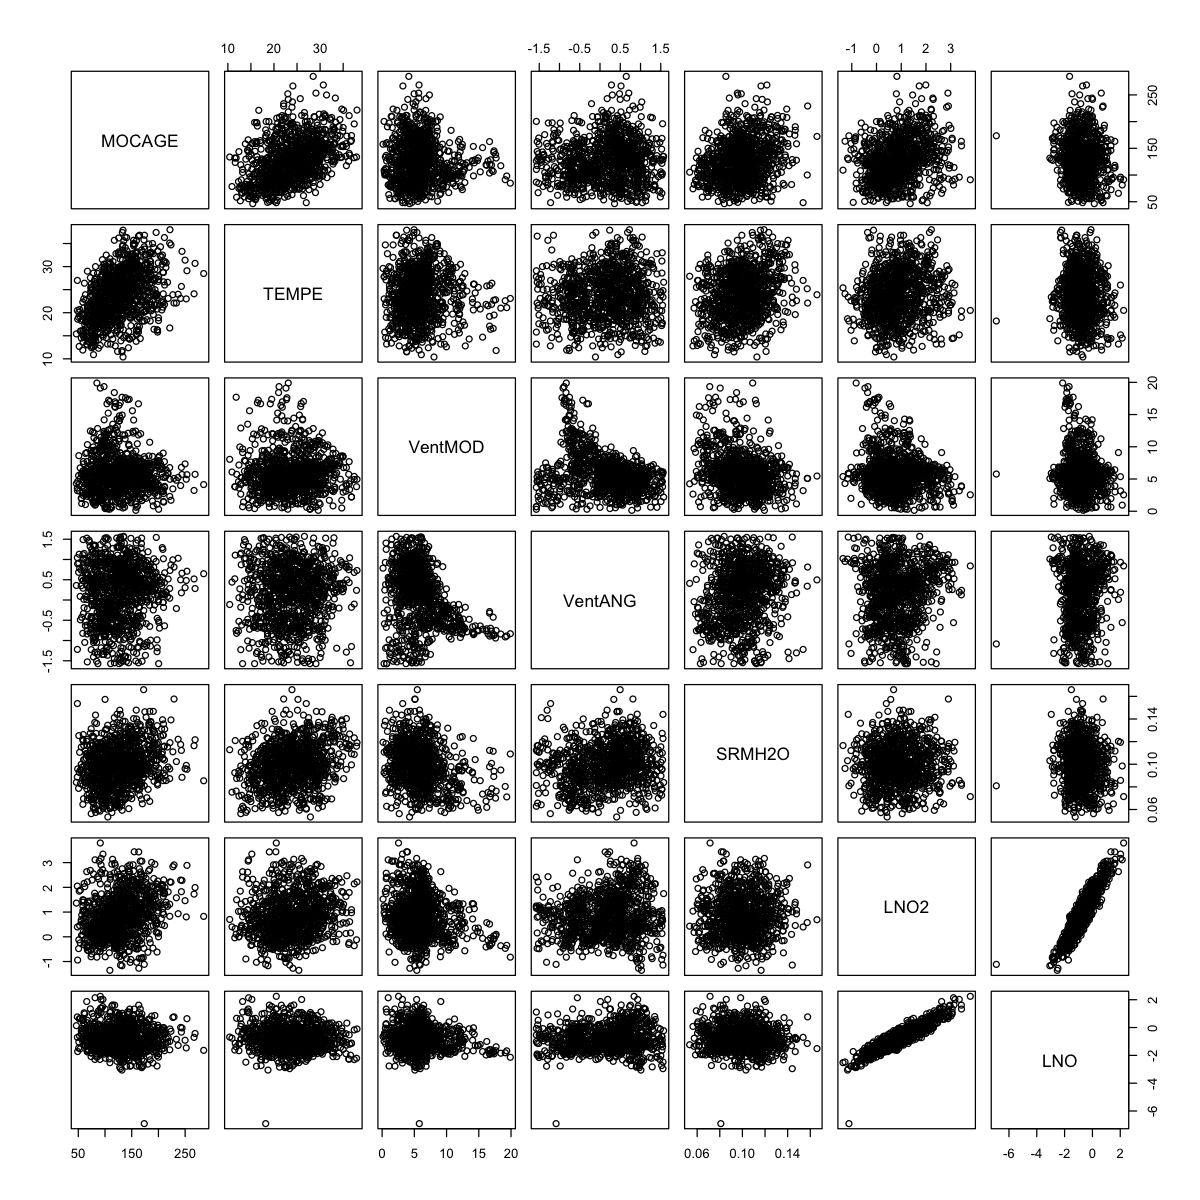

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs(ozone[, c(3, 4, 6:10)])

*** 
## **Questions**
* Que dire sur les relations des varibles 2 à 2 ?
   - les variables MOCAGE/TEMPE et LNO2/LN0 sont corrélé positivement
   - les autres variables ne semblent pas être corrélés 
***

In [27]:
#install.packages("corrplot")

corrplot 0.84 loaded



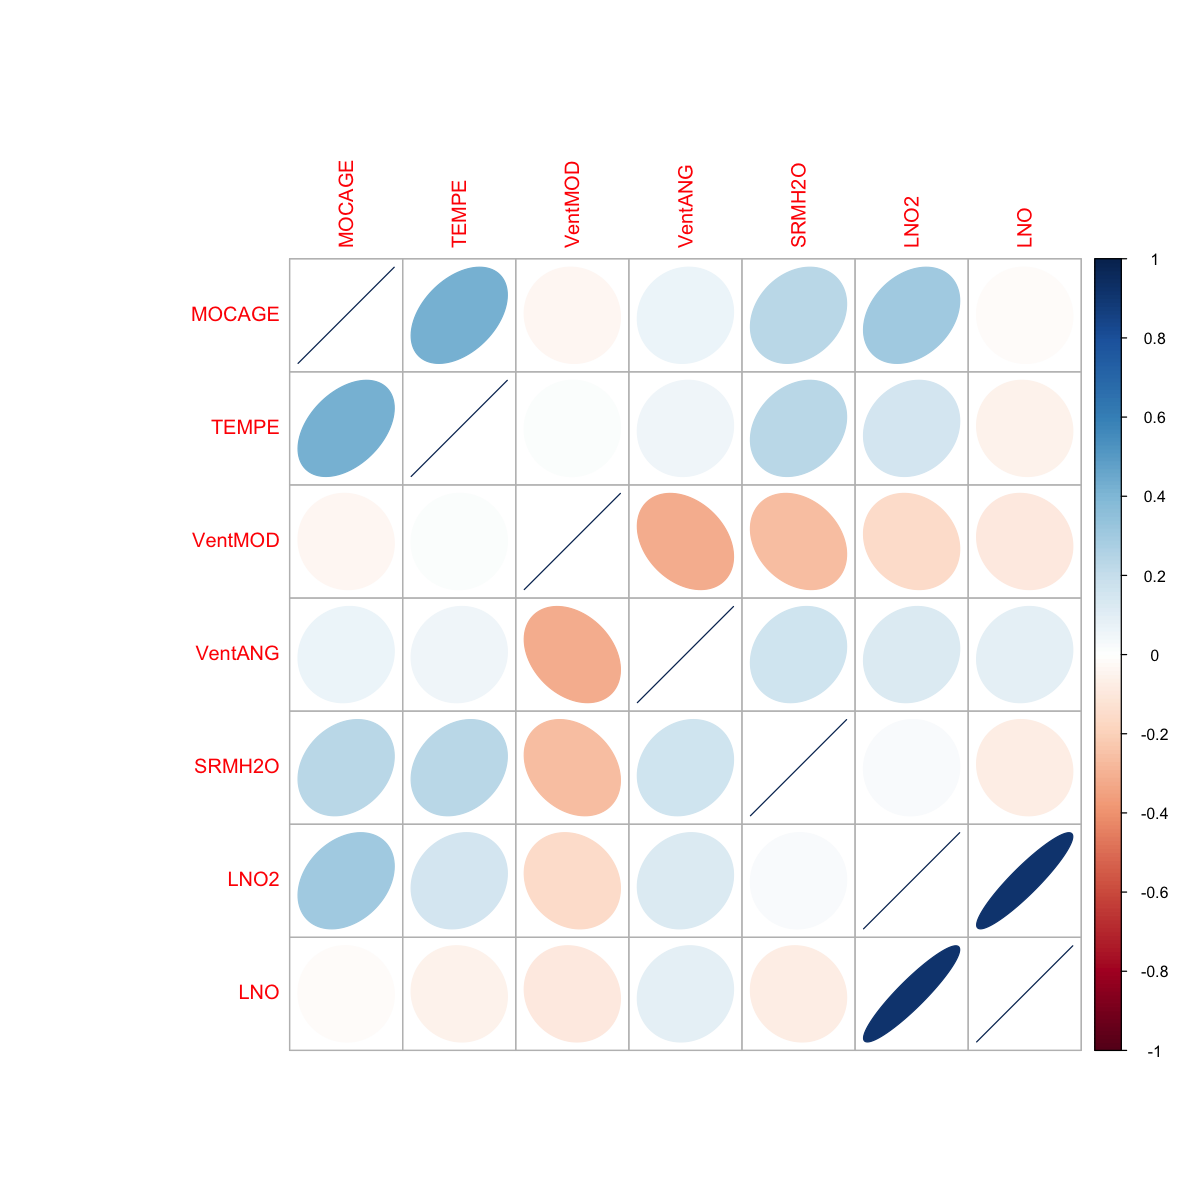

In [28]:
library(corrplot)
M <- cor(ozone[, c(3, 4, 6:10)])
corrplot(M, method = "ellipse")

***
## **Questions**

* Compléter en visualisant les corrélations avec la fonction 'corrplot' (package corrplot). Quelle est la limite de ce type de diagnostic numérique : quel type de corrélation est mesuré ?

    - le corrplot ci-dessus nous permet d'affirmer que les variables MOCAGE/TEMP (>0.4) et LNO/LNO2 (>0.8) sont bien positivement corrélé.
    
    - une faible corrélation positive entre LNO2/MOCAGE (0.2).
    
    - une faible corrélation négative entre VentANG et VentMOD.
***

##  ACP

Les commandes suivantes permettent de réaliser une analyse en composantes principales sur les seules variables quantitatives. Par ailleurs la variable à modéliser (O3obs, concentration observée) n'est pas utilisée.



In [29]:
#install.packages("FactoMineR")

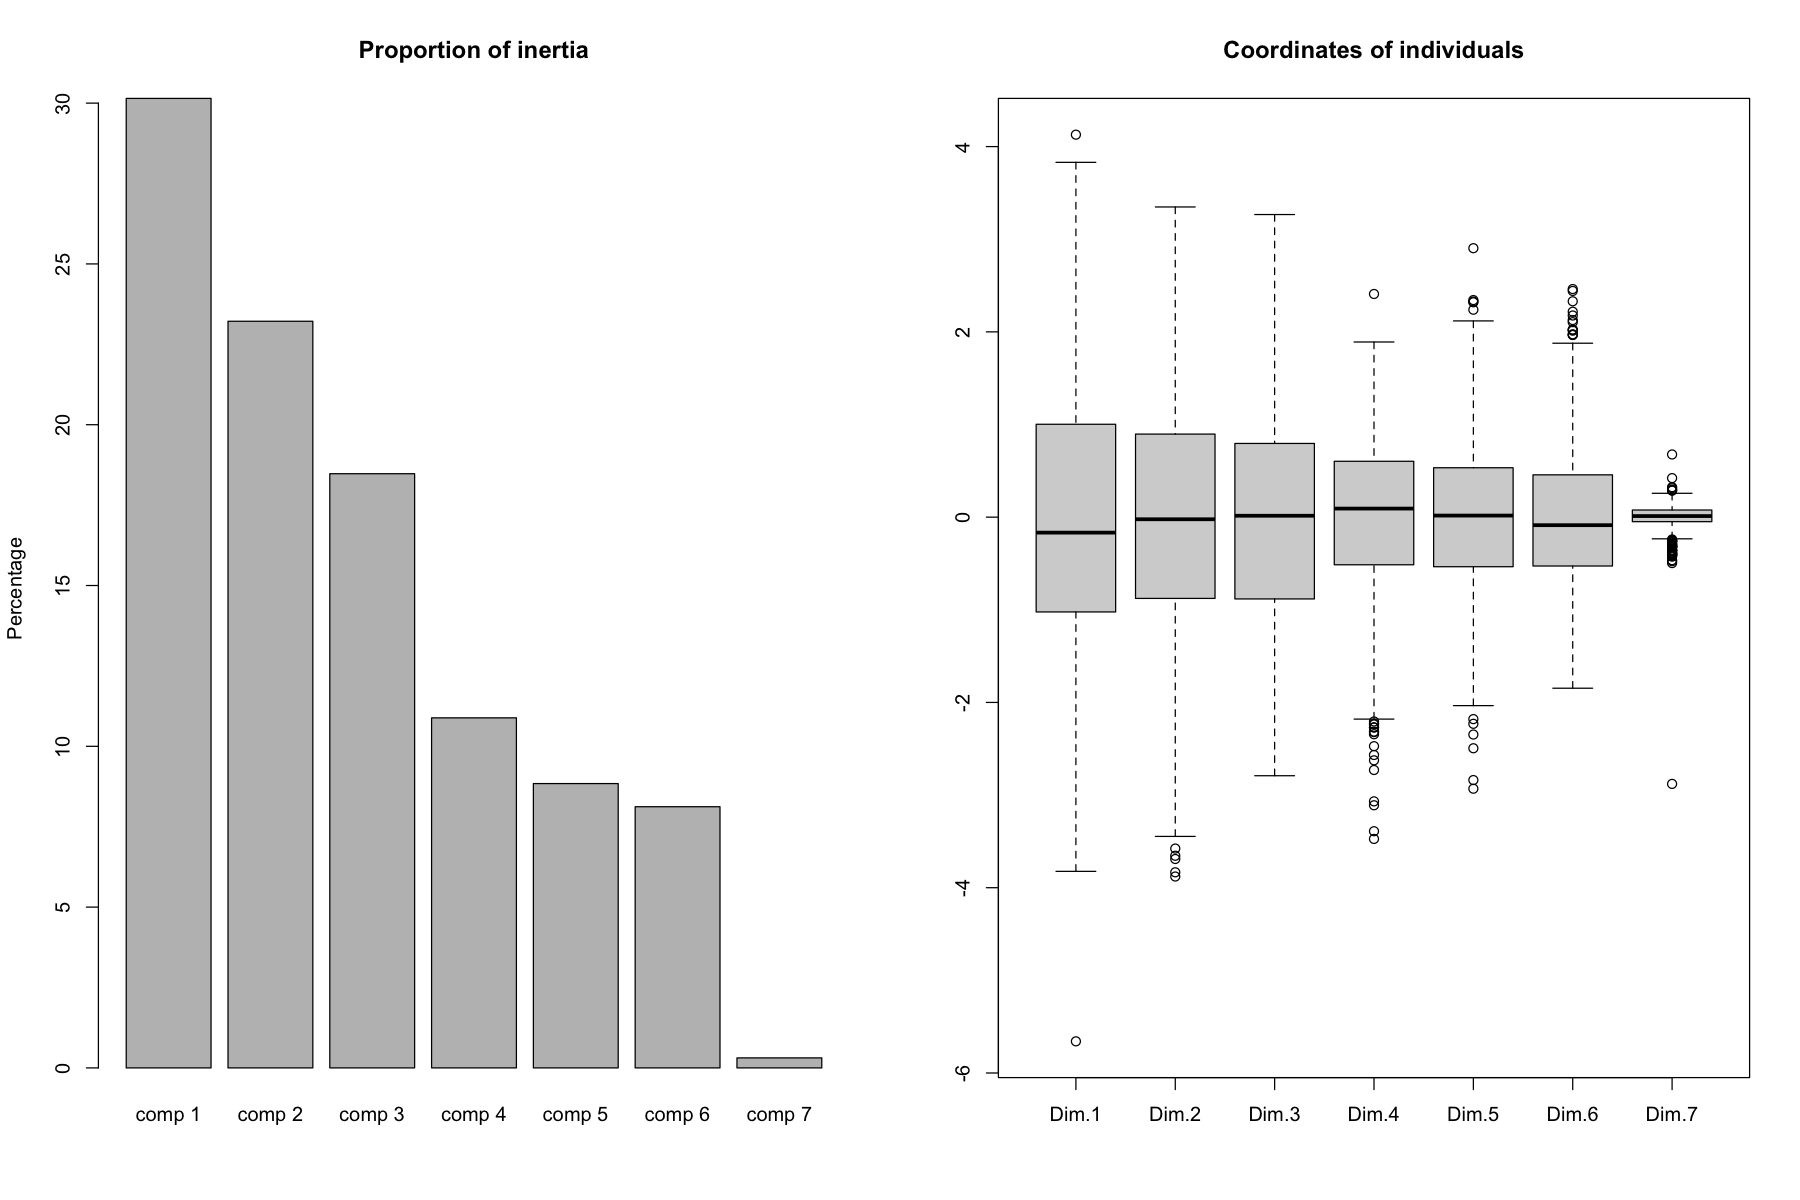

In [30]:
# ACP réduite
# Décroissance des valeurs propres
library(FactoMineR)
acp <- PCA(ozone[, c(11, 3:4, 6:10)], scale.unit = TRUE, graph = FALSE, quali.sup = 1, ncp = 7)
options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow = c(1, 2))
barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")

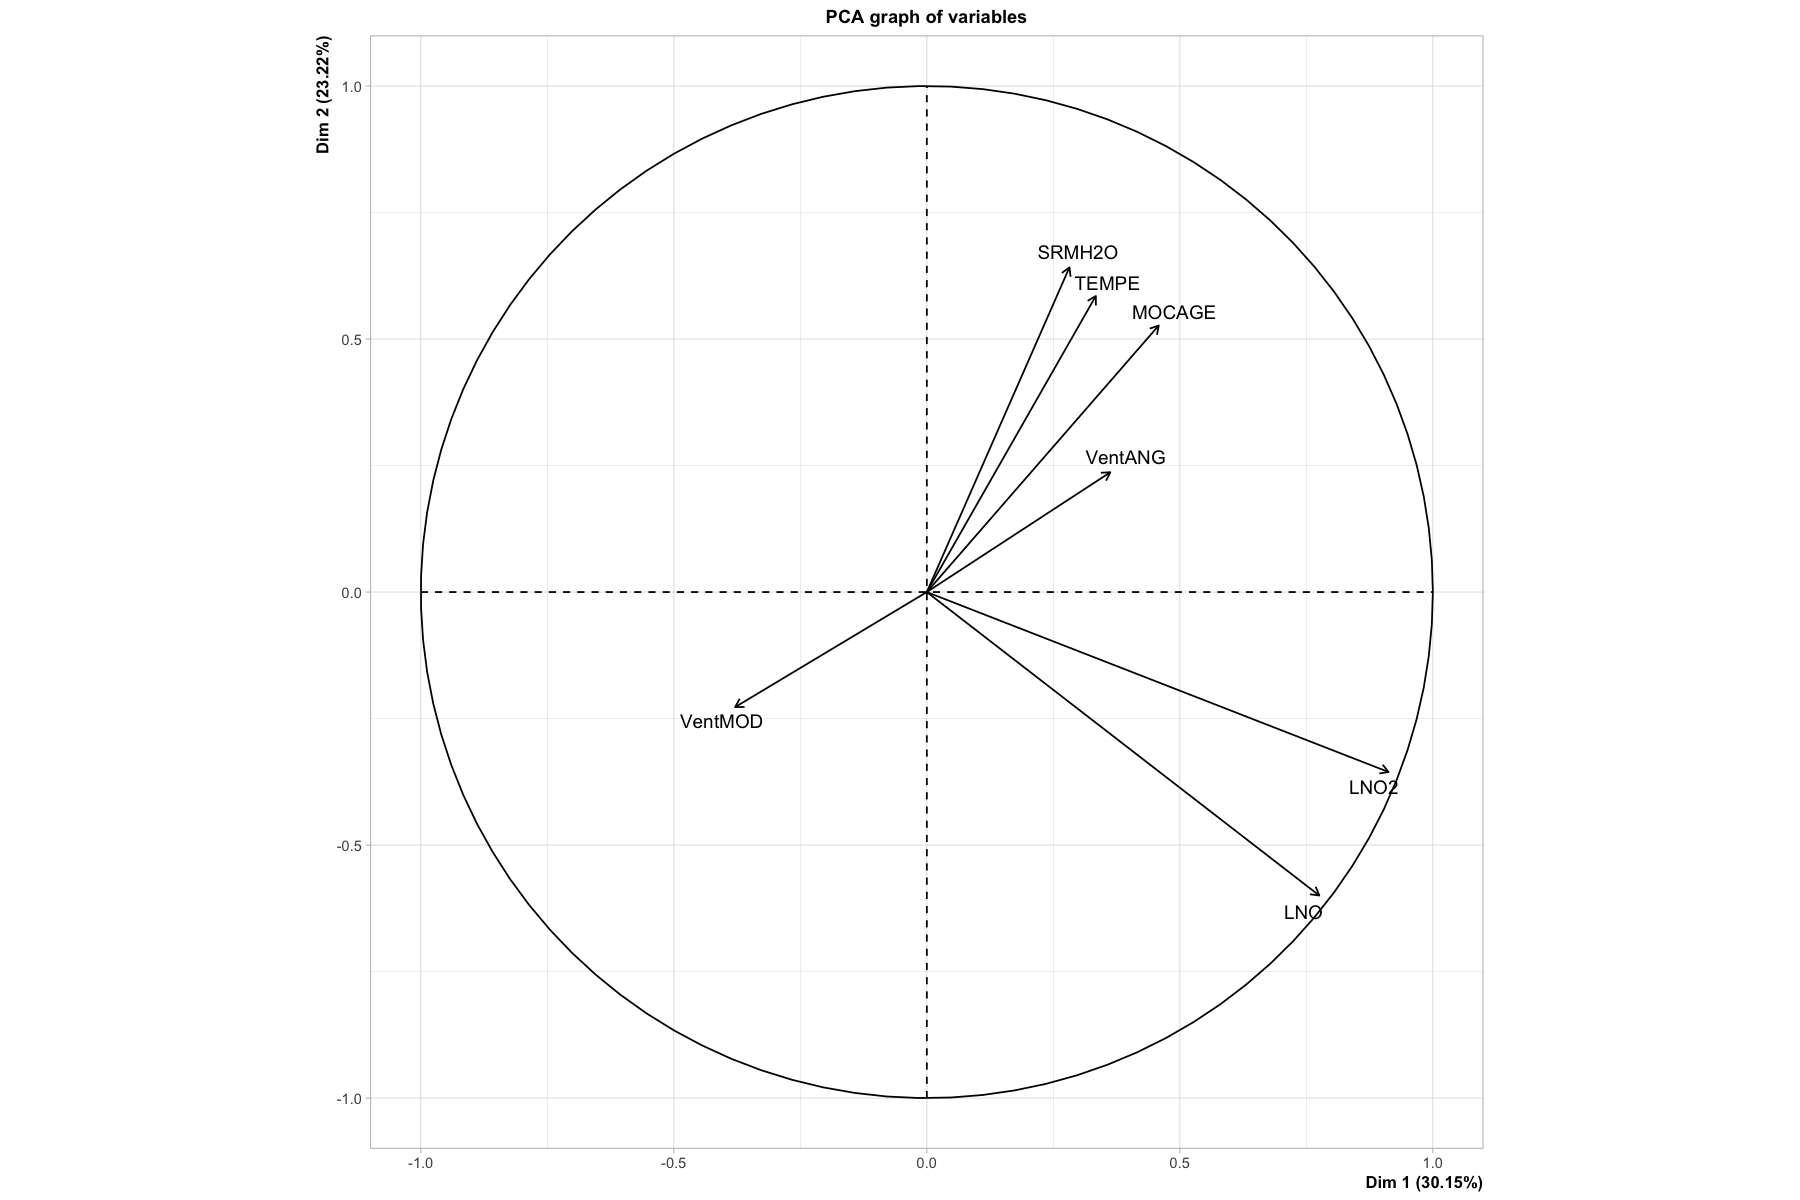

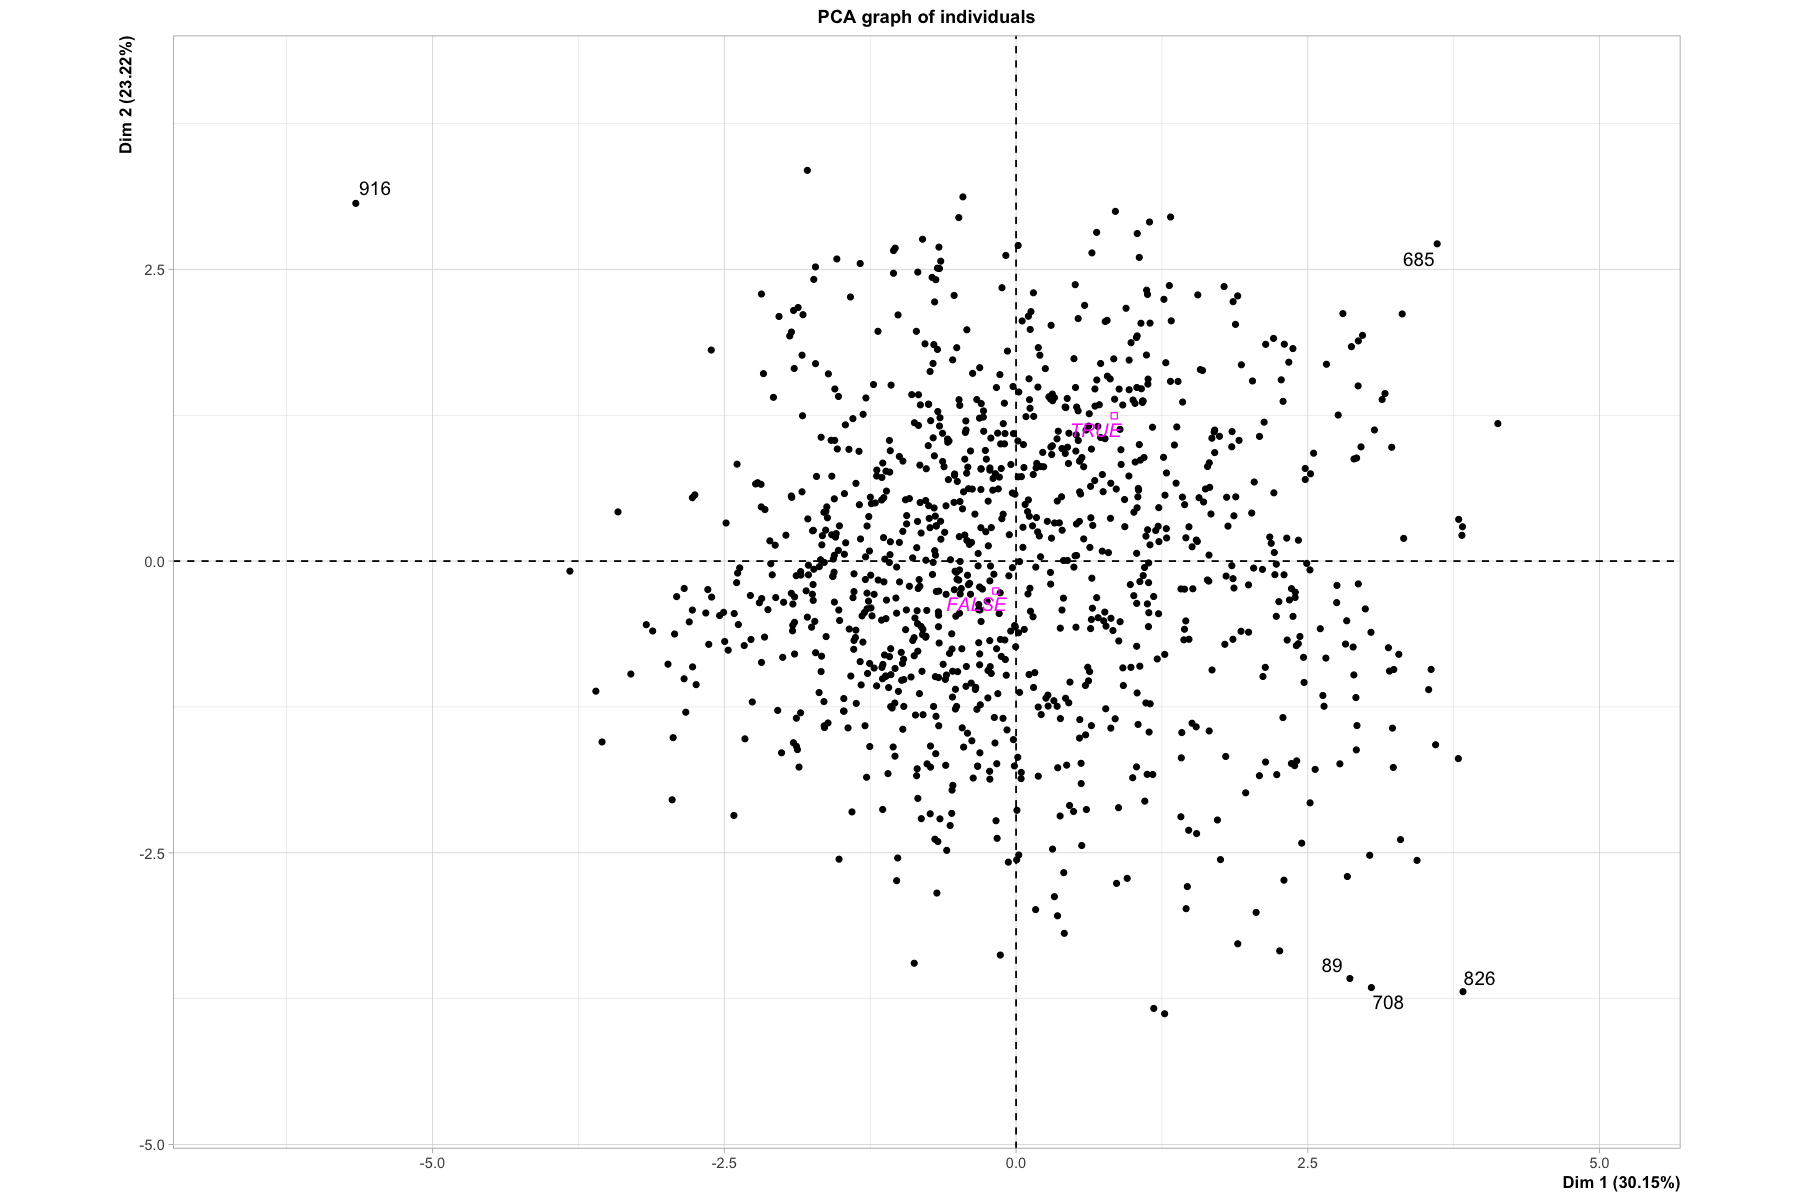

In [31]:
plot(acp, choix = "varcor")
plot(acp, choix = "ind", select = "contrib 5", unselect = 0)

***
## **Questions**

* Que sont ces graphiques?
    - le premier graphique "PCA graph of variables" représente la corélation entre les variables.
    - le second graphique "PCA graph of individuals" représente la contribution de chaque varaible dans la PCA. Plus le point de la variable est éloignée de l'origine plus sa contribution est importante. 
    
* Que dire du choix de la dimension, des valeurs atypiques?
    - les valeurs atypiques sont plus éloignées du centre
* Que dire de la structure de corrélation des variables ? Est-elle intuitive ?
    - les variables SRMH20,MOCAGE, TEMPE et VentANG sont positivement corrélés entre elles, car elles sont dans le même quart de cercle et dans la même direction. La variable VentMOD est négativement corrélé avec eux car dans la direction inverse.

    - les variables LNO2 et LN02 sont positivement corrélés entre elles mais pas avec les autres varaibles.

***

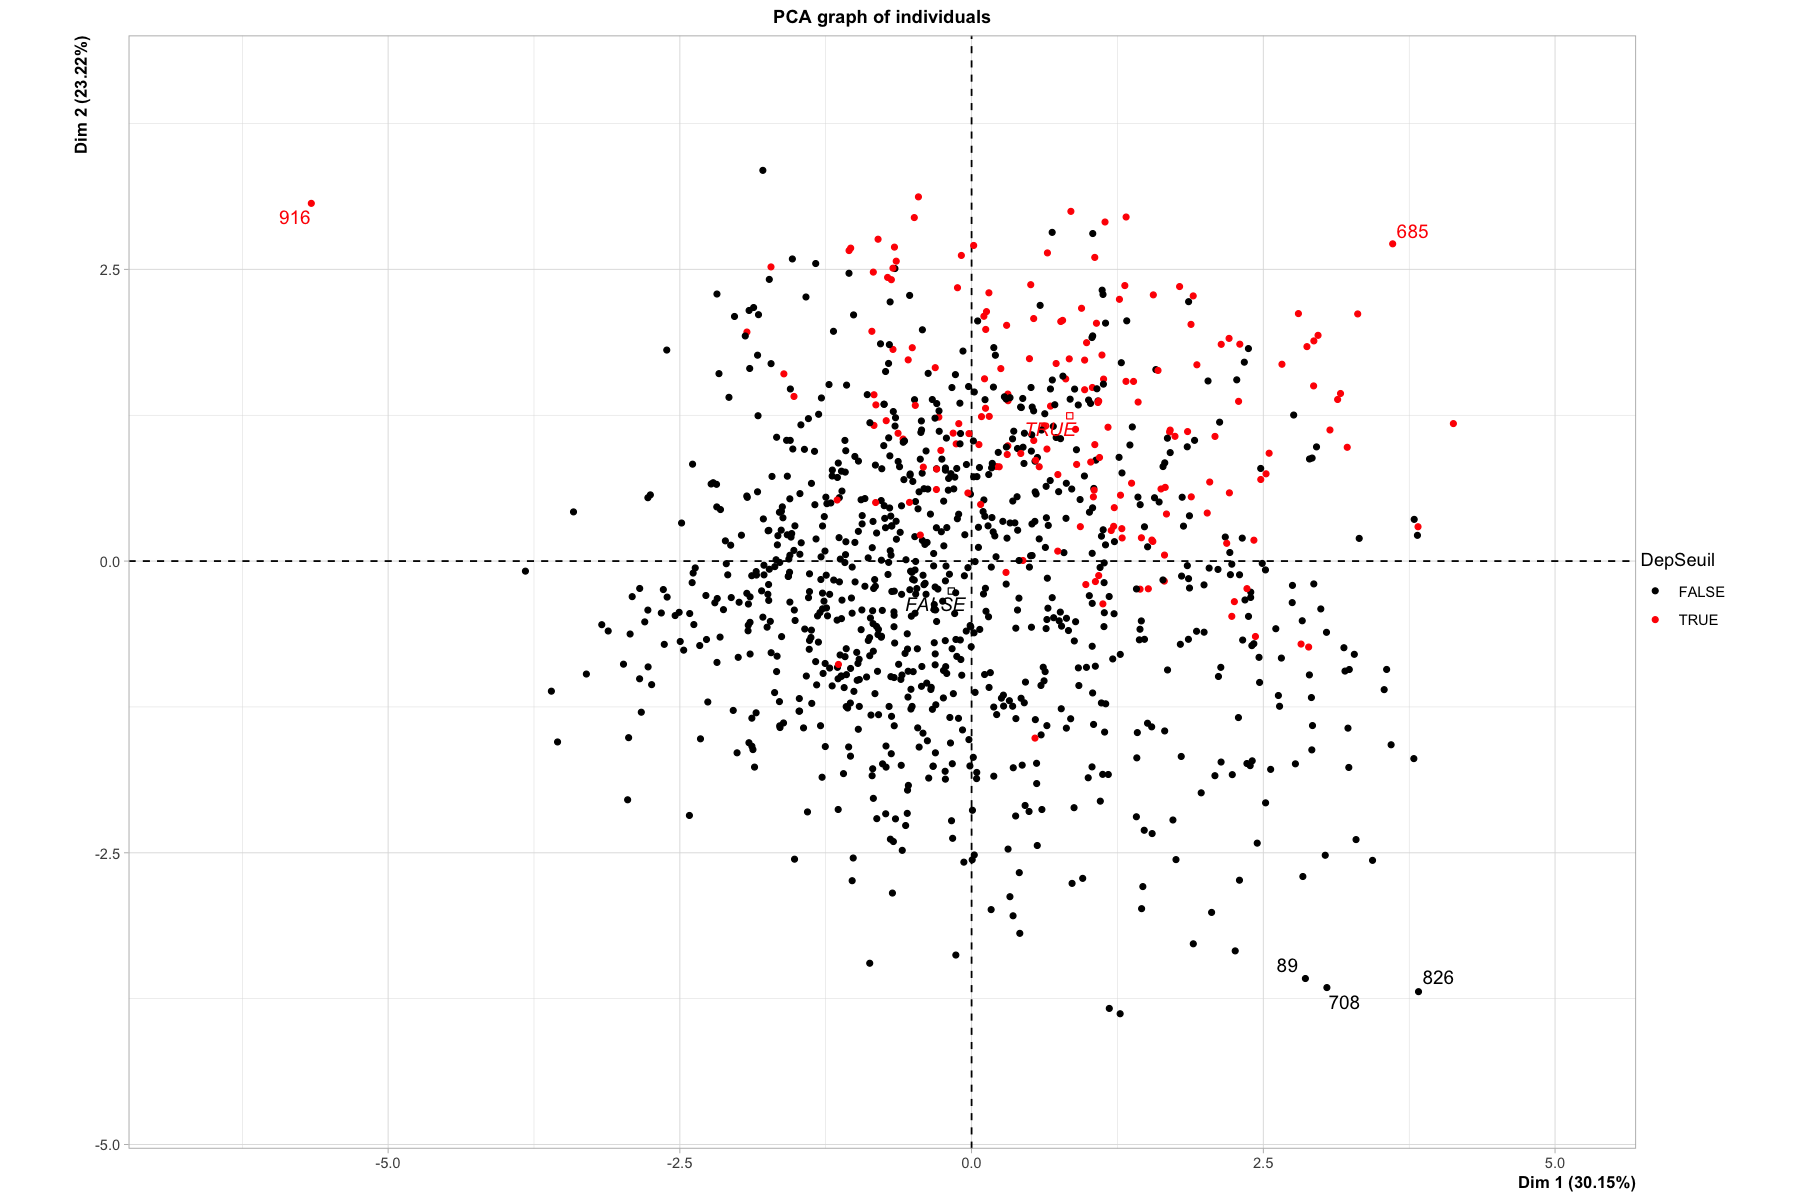

In [32]:
plot(acp, choix = "ind", habillage = 1, select = "contrib 5", unselect = 0)

L'objectif est donc de définir une surface séparant les deux classes.

***
## **Questions**

* Une discrimination linéaire (hyperplan) semble-t-elle possible ?
    - non on ne remarque pas une séparation linénaire des deux classes.


***

Ce n'est pas utile ici mais une classification non supervisée est facile à obtenir. Par exemple en 2 classes, par l'algorithme k-means. Donne t-elle la même information ?

In [33]:
km.ozone <- kmeans(ozone[, c(3:4, 6:10)], centers = 2)

# Représentation dans les coordonnées de l'acp

acp2 <- PCA(cbind(coul = as.factor(km.ozone$cluster),
          ozone[, c(11, 3:4, 6:10)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 7)



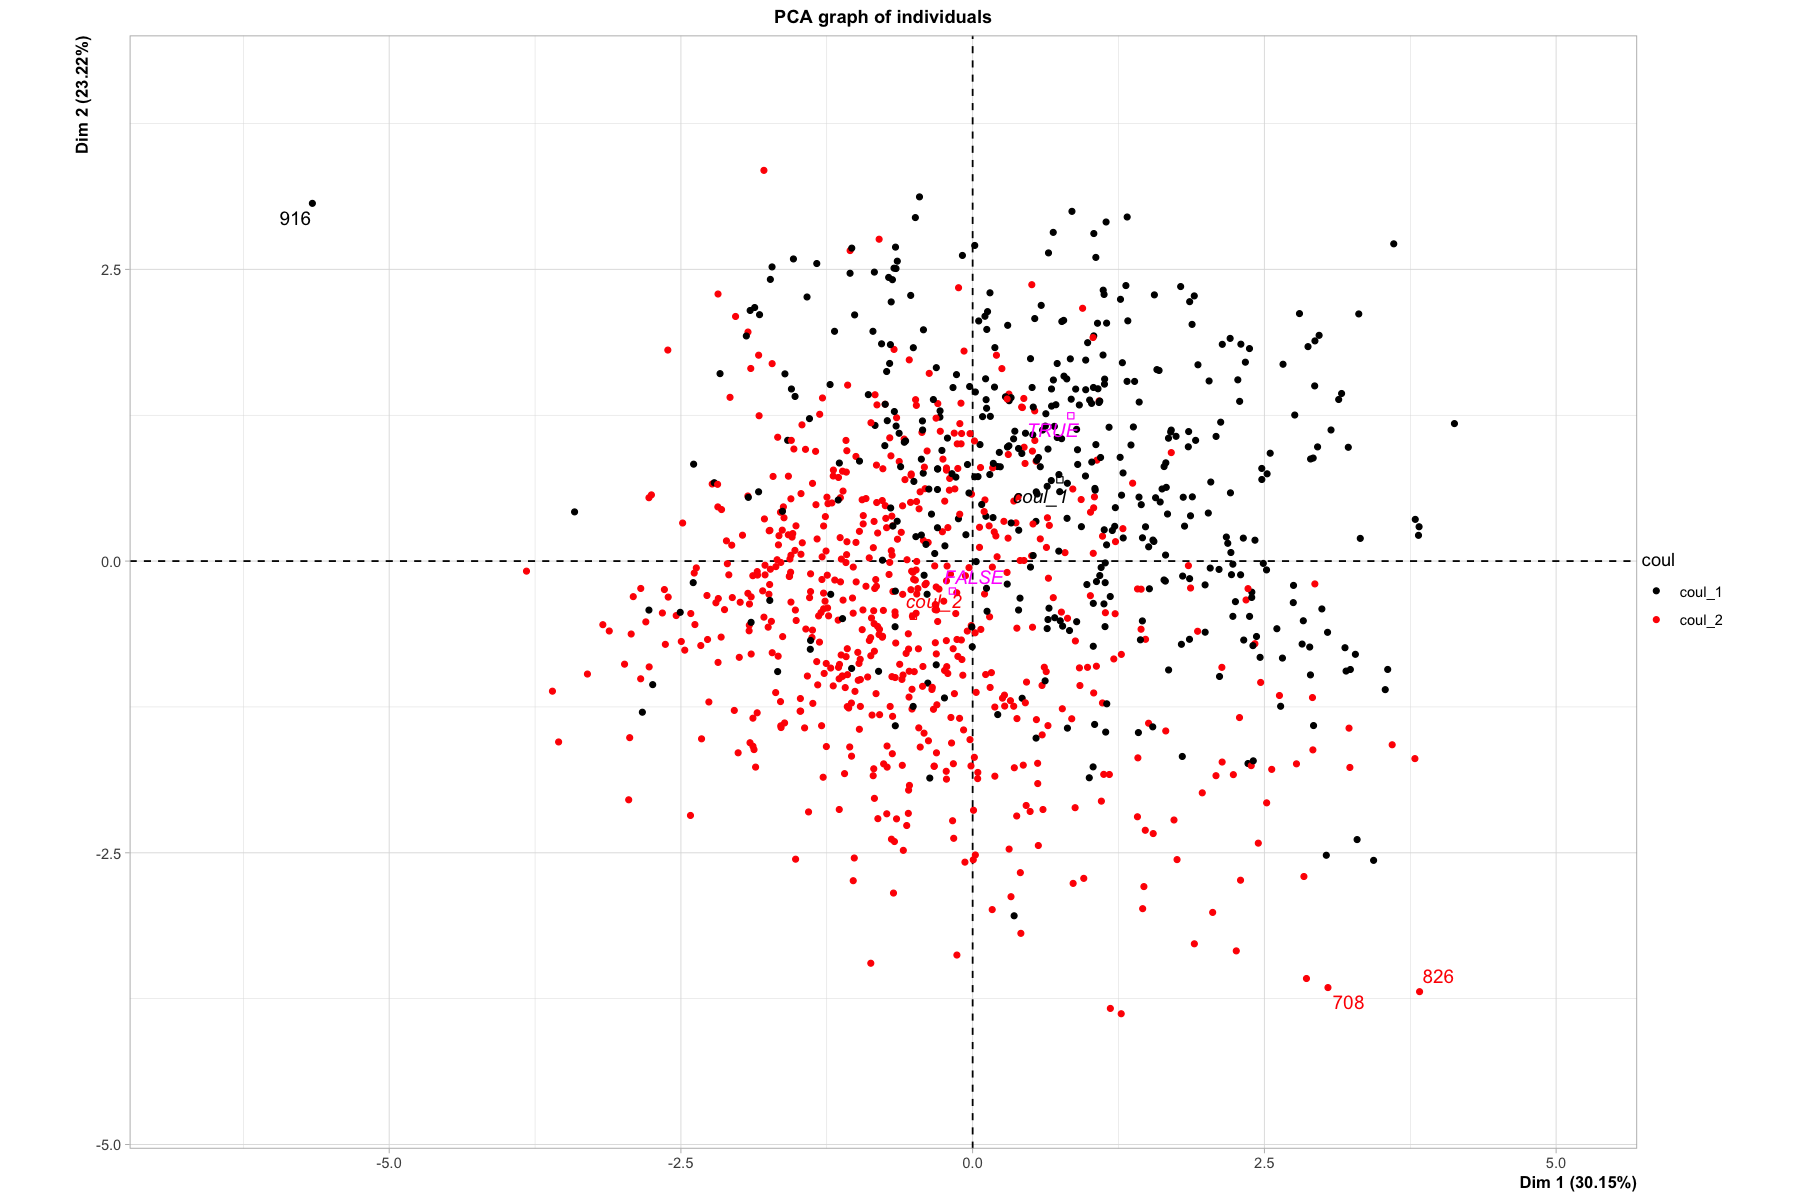

In [34]:
plot(acp2, choix = "ind", habillage = "coul", select = "contrib 3", unselect = 0)






## Protocole de comparaison
### Stratégie

La recherche d'une meilleure méthode de prévision suit le protocole suivant.
1) Etape descriptive préliminaire uni et multidimensionnelle visant à repérer les incohérences, les variables non significatives ou de distribution exotique, les individus non concernés ou atypiques... et à étudier les structures des données. Ce peut être aussi la longue étape de construction de variables, attributs ou features spécifiques des données.

2) Procéder à un tirage aléatoire d'un échantillon test qui ne sera utilisé que lors de la dernière étape de comparaison des méthodes.

3) La partie restante est l'échantillon d'apprentissage pour l'estimation des paramètres des modèles.
4) Pour chacune des méthodes, optimiser la complexité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision, par exemple par validation croisée:
* Variables et interactions à prendre en compte dans la régression linéaire ou logistique;
* variables et méthode pour l'analyse discriminante;
* nombre de feuilles dans l'arbre de régression ou de classification;
* architecture (nombre de neurones, pénalisation) du perceptron;
* algorithme d'agrégation,
* noyau et pénalisation des SVMs.

5) Comparaison des qualités de prévision sur la base du taux de mal classés pour le seul échantillon test qui est resté à l'écart de tout effort ou "acharnement" pour l'optimisation des modèles.

### Remarques
En cas d'échantillon relativement "petit" il est recommandé d'itérer la procédure de découpage apprentissage / test, afin de réduire la variance (moyenne) des estimations des erreurs de prévision.

***
## **Questions**

* Comment appelle-t-on cette procédure spécifique de validation croisée?
    - Validation croisée Monte Carlo


*** 

**Attention:** ne pas "tricher" en modifiant le modèle obtenu lors de l'étape précédente afin d'améliorer le résultat sur l'échantillon test!

Le critère utilisé dépend du problème : erreur quadratique, taux de mauvais classement, entropie, AUC (aire sous la courbe ROC), indice de Pierce, log loss function...

### Extraction des échantillons

Les commandes ci-dessous réalisent l'extraction du sous-ensemble des données d'apprentissage et de test.


Utiliser trois chiffres au hasard, et remplacer "111" ci-dessous, comme initialisation du générateur de nombres aléatoires. Attention, chaque participant tire un échantillon différent ; il est donc "normal" de ne pas obtenir les mêmes modèles, les mêmes résultats.

In [35]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(ozone) # nombre de lignes dans les données
nvar <- ncol(ozone) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

Construction des échantillons pour la régression: prévision de la concentration en ozone.

In [36]:
# construction de l'échantillon d'apprentissage
datappr <- ozone[appri, -11] 
# construction de l'échantillon test
datestr <- ozone[testi, -11] 
summary(datappr) # vérification

 JOUR        O3obs           MOCAGE          TEMPE         STATION         
 0:581   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Length:832        
 1:251   1st Qu.: 88.0   1st Qu.: 98.0   1st Qu.:20.27   Class :character  
         Median :110.0   Median :125.9   Median :23.90   Mode  :character  
         Mean   :115.8   Mean   :127.7   Mean   :23.94                     
         3rd Qu.:135.0   3rd Qu.:154.9   3rd Qu.:27.60                     
         Max.   :319.0   Max.   :268.6   Max.   :38.00                     
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548  
 1st Qu.: 3.9825   1st Qu.:-0.3940   1st Qu.:0.08813   1st Qu.: 0.2042  
 Median : 5.5938   Median : 0.3019   Median :0.09932   Median : 0.7405  
 Mean   : 5.9413   Mean   : 0.1687   Mean   :0.09967   Mean   : 0.8458  
 3rd Qu.: 7.1694   3rd Qu.: 0.6875   3rd Qu.:0.11155   3rd Qu.: 1.4301  
 Max.   :19.8910   Max.   : 1.

Construction des échantillons pour la discrimination: prévision de dépassement.

In [37]:
# construction de l'échantillon d'apprentissage
datappq <- ozone[appri,-2]
# construction de l'échantillon test 
datestq <- ozone[testi,-2] 
summary(datappq) # vérification

 JOUR        MOCAGE          TEMPE         STATION             VentMOD       
 0:581   Min.   : 46.4   Min.   :10.40   Length:832         Min.   : 0.1414  
 1:251   1st Qu.: 98.0   1st Qu.:20.27   Class :character   1st Qu.: 3.9825  
         Median :125.9   Median :23.90   Mode  :character   Median : 5.5938  
         Mean   :127.7   Mean   :23.94                      Mean   : 5.9413  
         3rd Qu.:154.9   3rd Qu.:27.60                      3rd Qu.: 7.1694  
         Max.   :268.6   Max.   :38.00                      Max.   :19.8910  
    VentANG            SRMH2O             LNO2              LNO         
 Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548   Min.   :-6.9078  
 1st Qu.:-0.3940   1st Qu.:0.08813   1st Qu.: 0.2042   1st Qu.:-1.4610  
 Median : 0.3019   Median :0.09932   Median : 0.7405   Median :-0.9455  
 Mean   : 0.1687   Mean   :0.09967   Mean   : 0.8458   Mean   :-0.8418  
 3rd Qu.: 0.6875   3rd Qu.:0.11155   3rd Qu.: 1.4301   3rd Qu.:-0.2884  
 Max.   : 1.5708

## TP3 : Exercice de régression linéaire du COURS

In [38]:
vitesse = c(4,7,8,9,10,11,11,12,12,13,14,15,15,16,17,18,19,20,24,25)

In [39]:
distance=c(2,4,16,10,26,17,28,20,28,26,36,26,54,40,50,76,46,48,92,85)

In [40]:
summary(vitesse)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   10.75   13.50   14.00   17.25   25.00 

In [41]:
summary(distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   19.25   28.00   36.50   48.50   92.00 

In [42]:
mean(vitesse)

[1] 14

In [43]:
mean(distance)

[1] 36.5

In [44]:
var(vitesse)

[1] 29.78947

In [45]:
var(distance)

[1] 642.7895

In [46]:
sd(vitesse)

[1] 5.457973

In [47]:
sd(distance)

[1] 25.35329

In [48]:
lm(distance ~ vitesse)


Call:
lm(formula = distance ~ vitesse)

Coefficients:
(Intercept)      vitesse  
    -23.655        4.297  


In [49]:
lm(vitesse ~ distance)


Call:
lm(formula = vitesse ~ distance)

Coefficients:
(Intercept)     distance  
     6.7317       0.1991  


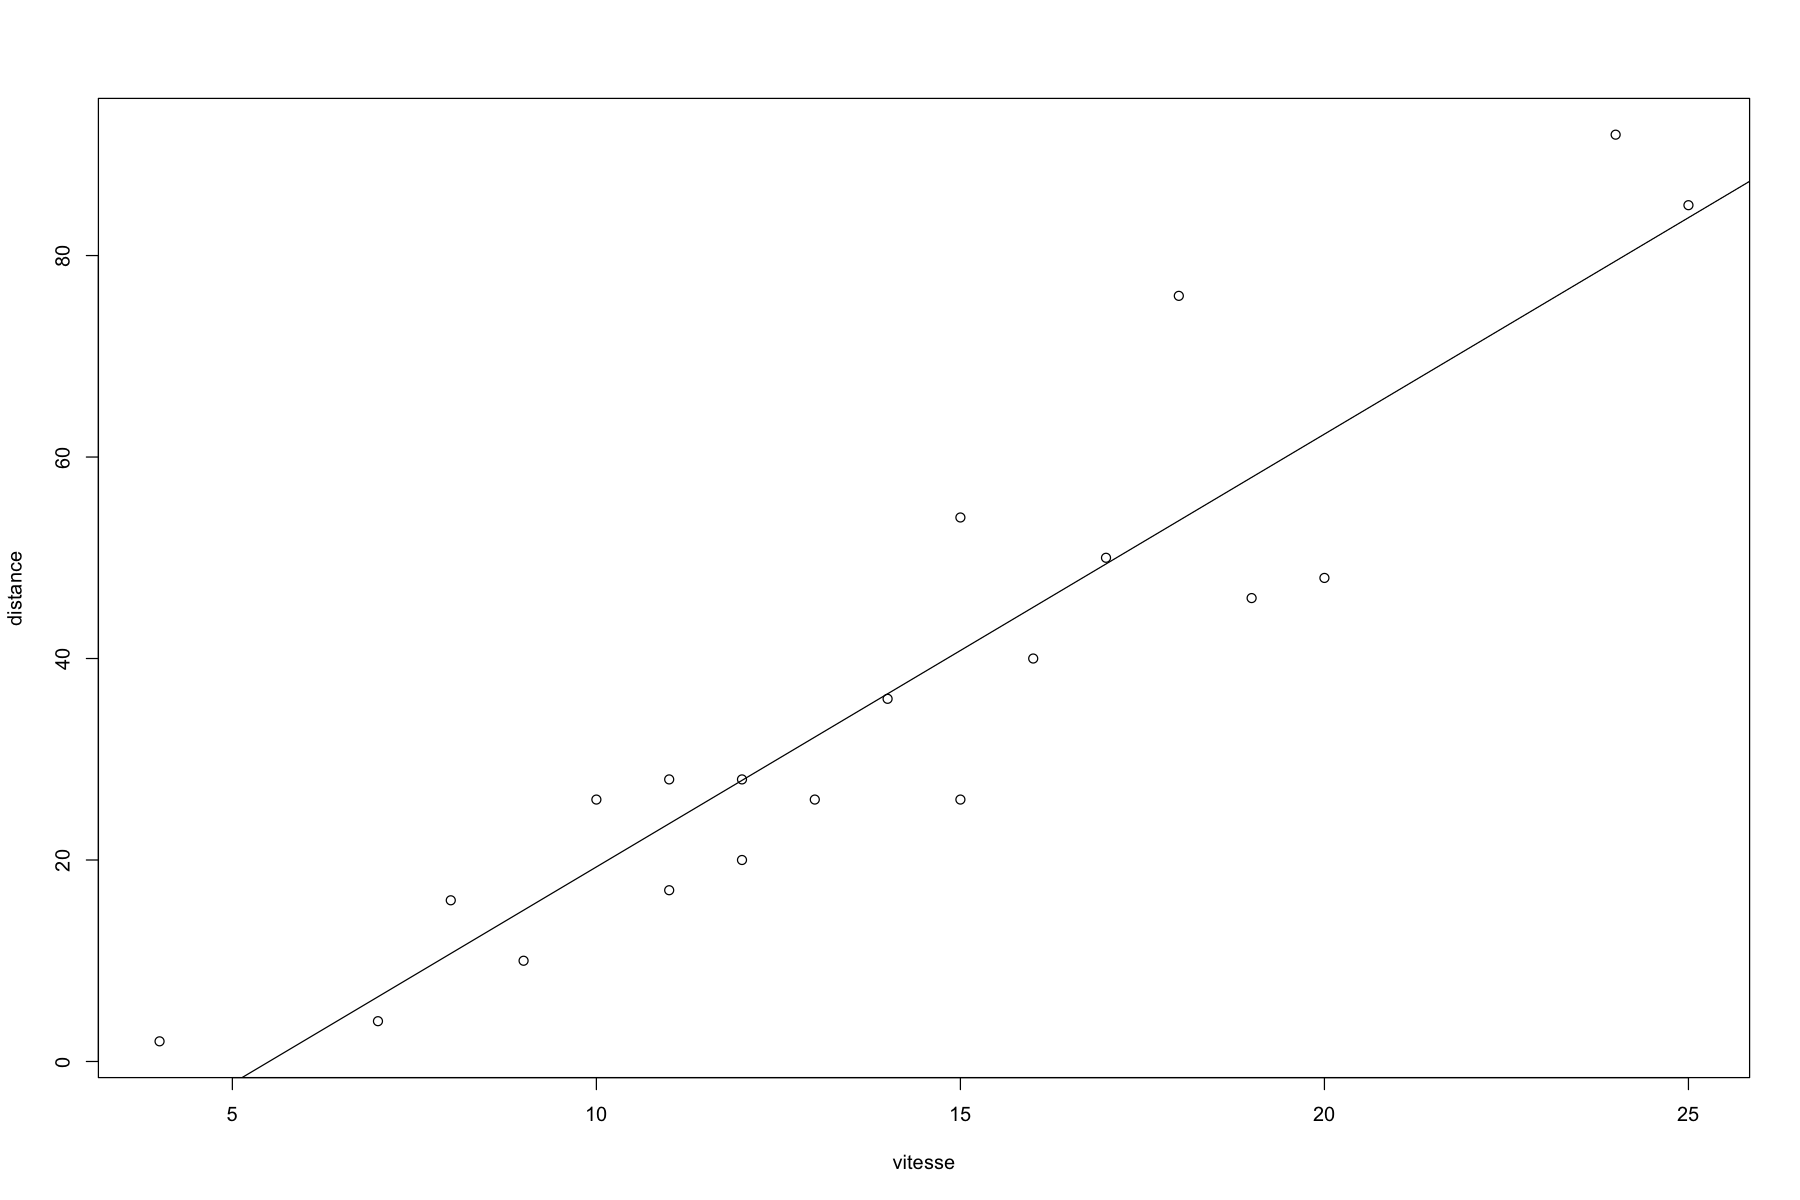

In [50]:
plot(distance ~ vitesse)
abline(lm(distance ~ vitesse))

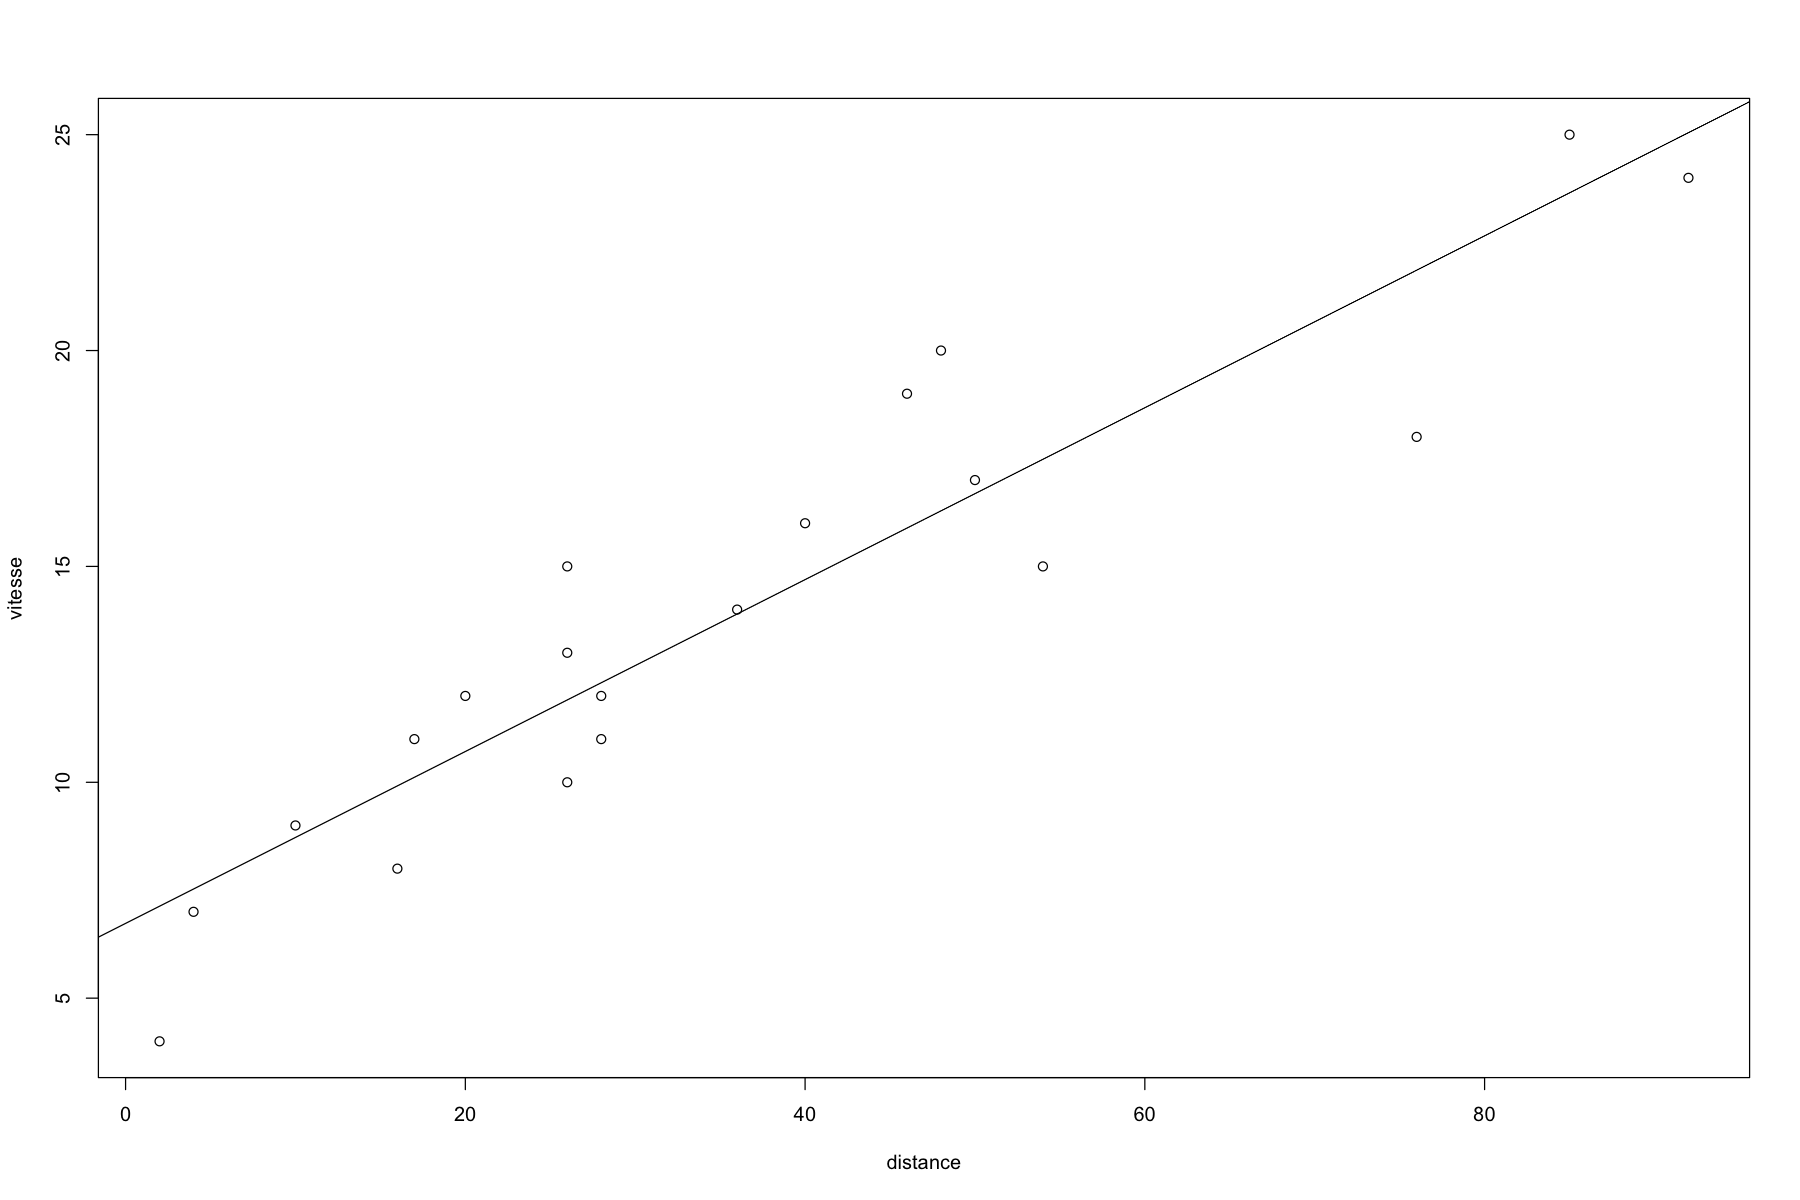

In [51]:
plot(vitesse ~ distance)
abline(lm(vitesse ~ distance))

**D(D/V)**

In [52]:
a = cov(vitesse,distance)/var(vitesse)
a

[1] 4.29682

In [53]:
b = mean(distance) - (a*mean(vitesse))
b

[1] -23.65548

In [54]:
# y = a*x+b

In [55]:
rl_vitesse = a*vitesse+b

In [56]:
rl_vitesse

[1] -6.468198  6.422261 10.719081 15.015901 19.312721 23.609541 23.609541
 [8] 27.906360 27.906360 32.203180 36.500000 40.796820 40.796820 45.093640
[15] 49.390459 53.687279 57.984099 62.280919 79.468198 83.765018

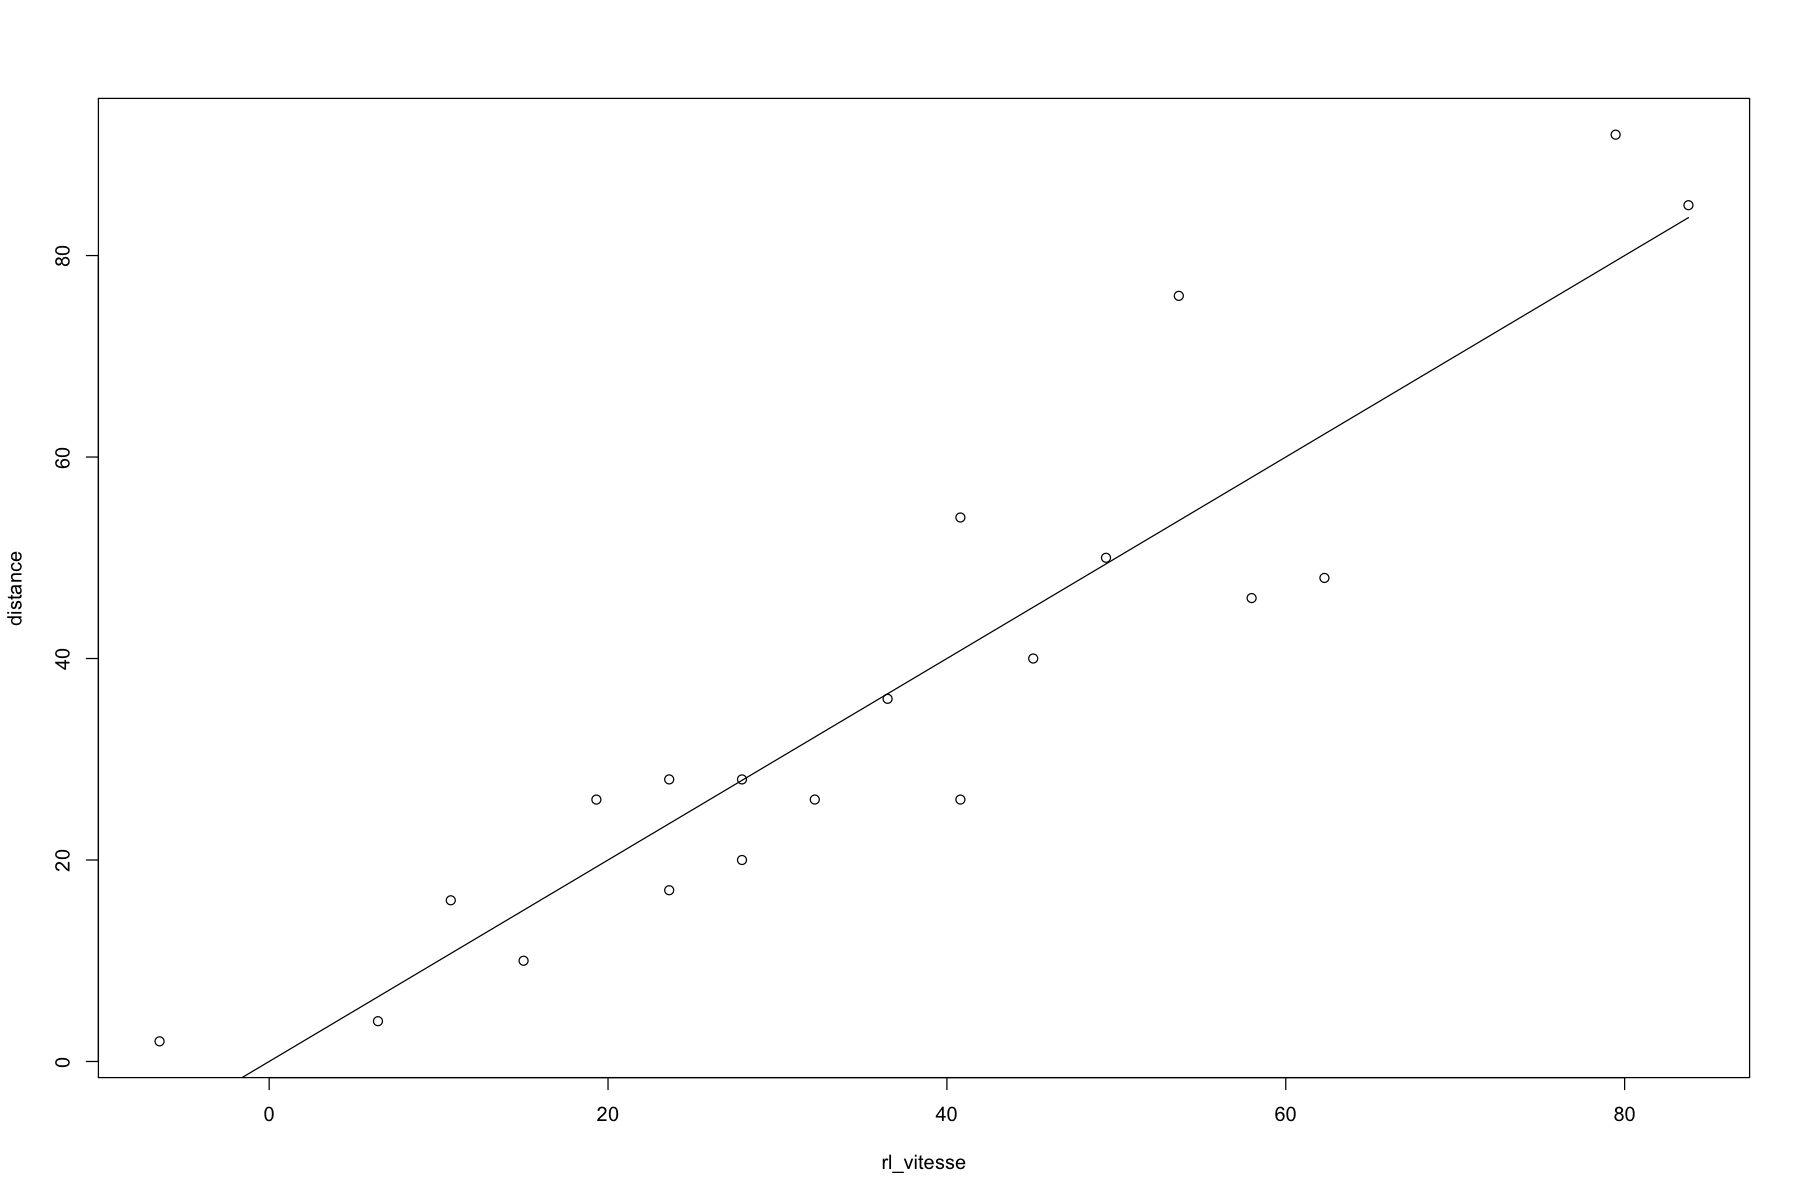

In [57]:
plot(rl_vitesse, distance)
lines(rl_vitesse, vitesse*a+b, type = "l", lty = 1)

**D(D/V)**

In [58]:
a1 = cov(distance,vitesse)/var(distance)
a1

[1] 0.1991321

In [59]:
b1 = mean(vitesse) - (a1*mean(distance))
b1

[1] 6.731679

In [60]:
rl_distance = a*distance+b

In [61]:
rl_distance

[1] -15.061837  -6.468198  45.093640  19.312721  88.061837  49.390459
 [7]  96.655477  62.280919  96.655477  88.061837 131.030035  88.061837
[13] 208.372792 148.217314 191.185512 302.902827 173.998233 182.591873
[19] 371.651943 341.574205

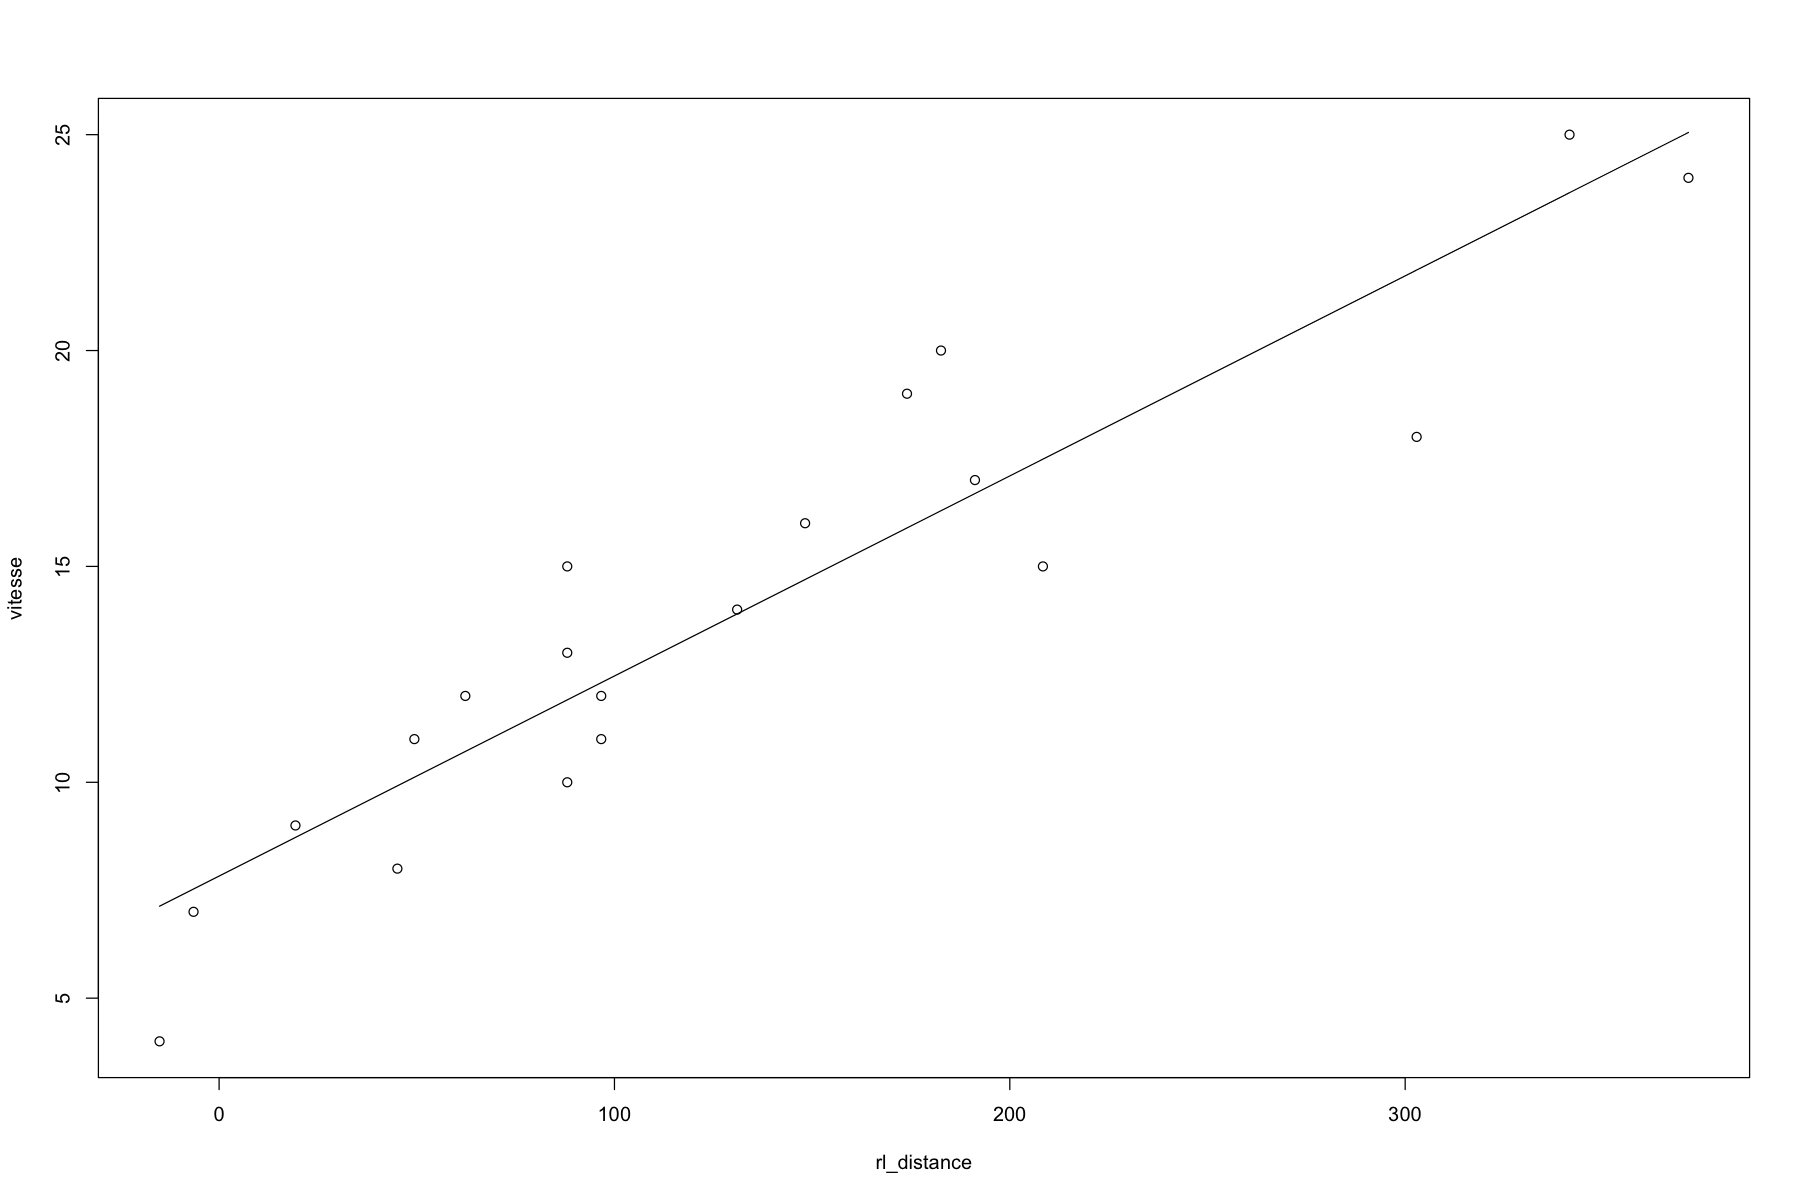

In [62]:
plot(rl_distance, vitesse)
lines(rl_distance, distance*a1+b1, type = "l", lty = 1)

In [63]:
r = a*a1
r

[1] 0.8556346

### Angle entre deux droites

In [64]:
tanphi = (a-a1)/(1+a*a1)
tanphi 

[1] 2.208241

## TP 4

## Prévision par modèle gaussien
Le premier modèle à tester est un simple modèle de régression linéaire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.


**Modèle linéaire**
Le modèle de régression linéaire simple intégre des variables qualitatives; c'est dans ce cas une analyse de covariance estimée par la fonction aov mieux adaptée à ce modèle

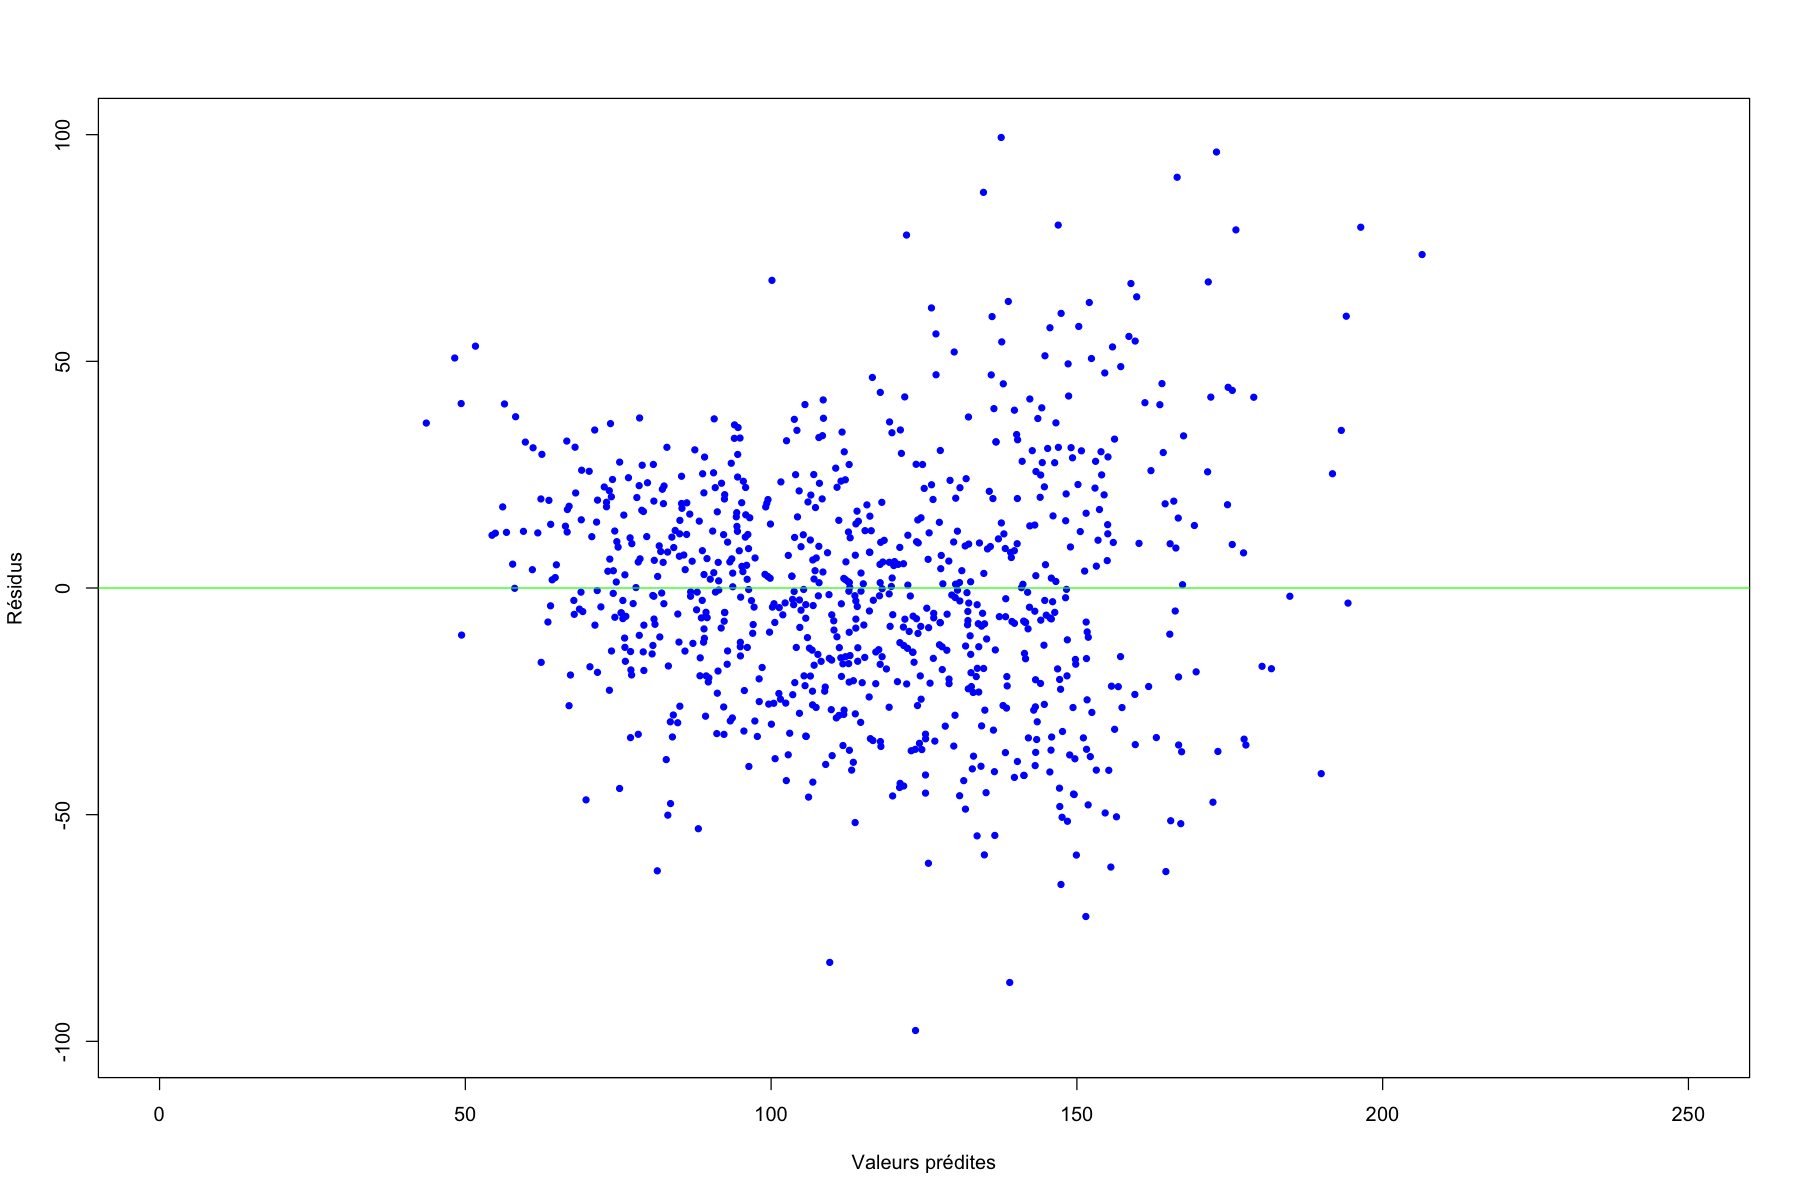

In [65]:
# estimation du modèle sans interaction
reg.lm <- aov(O3obs ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values


# graphe des résidus. 
# Définition d'une fonction pour un graphe coloré 
# et des échelles fixes sur les axes
plot.res <- function(x,y,titre="titre")
{
plot(x, y, col = "blue", xlim = c(0, 250), ylim = c(-100, 100),
ylab = "Résidus", xlab = "Valeurs prédites", main = titre, pch = 20)
#points(x2, y, col="red")
abline(h = 0, col = "green")
}
plot.res(fit.lm,res.lm,"")

In [66]:
reg.lm

Call:
   aov(formula = O3obs ~ ., data = datappr)

Terms:
                    JOUR   MOCAGE    TEMPE  STATION  VentMOD  VentANG   SRMH2O
Sum of Squares     106.4 470173.0 225426.8  10162.6  13846.3  10087.5    273.3
Deg. of Freedom        1        1        1        4        1        1        1
                    LNO2      LNO Residuals
Sum of Squares    3337.3   9005.8  651913.0
Deg. of Freedom        1        1       819

Residual standard error: 28.21323
Estimated effects may be unbalanced

***
## **Questions**

* Que dire de la distribution de ces résidus?
    - les résidus sont distribuées entre 50 et 200.
    


* La forme du nuage renseigne sur les hypothèses de linéarité du modèle et d'homoscédasticité. Que dire de la validité de ce modèle?
    - d'après la forme pas d'hypothèse de linéairité présuposée des résidus, on peut donc supposer une dépéendance linéaire entre les composantes
    - la forme d’entonnoir des résidus montrent une forte hétéroscédasticité, cela signifie que la variance des résidus et donc des prévisions croît avec la valeur donc la qualité de la prévision se dégrade pour les concentrations élevées 



***
Apprécier néanmoins sa significativité par la commande suivante.

In [67]:
summary(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
JOUR          1    106     106   0.134 0.714791    
MOCAGE        1 470173  470173 590.680  < 2e-16 ***
TEMPE         1 225427  225427 283.204  < 2e-16 ***
STATION       4  10163    2541   3.192 0.012926 *  
VentMOD       1  13846   13846  17.395 3.36e-05 ***
VentANG       1  10088   10088  12.673 0.000392 ***
SRMH2O        1    273     273   0.343 0.558101    
LNO2          1   3337    3337   4.193 0.040918 *  
LNO           1   9006    9006  11.314 0.000805 ***
Residuals   819 651913     796                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

***
## **Questions**
* Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE. Qu'en conclure?
    * Ces graphes témoignent de la mauvaise qualité de ce modèle :
        * les résidus ne sont pas répartis de façon symétrique
        * les deux nuages présentent une légère forme de "banane" signifiant que des composantes non linéaires du modèle n’ont pas été prises en compte 
        * La forme d’entonnoir des résidus montrent une forte hétéroscédasticité, cela signifie que la variance des résidus et donc des prévisions croît avec la valeur donc la qualité de la prévision se dégrade pour les concentrations élevées 
        * Mais le modèle quadratique (figure: linéaire, MOCAGE seul) fournit une forme plus "linéaire" (que les graphiques au-dessus) des résidus mais l’hétéroscédasticité reste présente

***

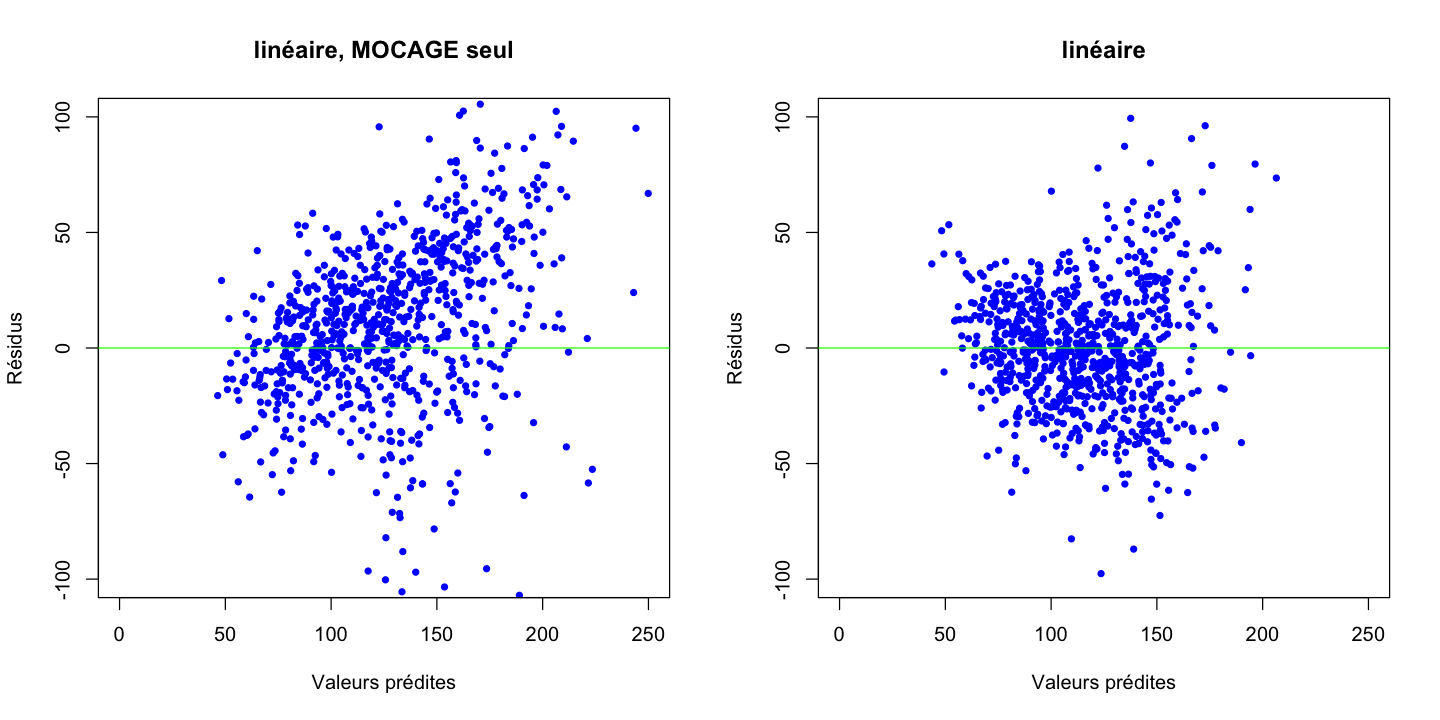

In [68]:
# Graphe des résidus du modèle déterministe MOCAGE
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 2))
plot.res(datappr[, "MOCAGE"],
         datappr[, "MOCAGE"] - datappr[, "O3obs"], "linéaire, MOCAGE seul")
plot.res(fit.lm, res.lm, "linéaire")
par(mfrow = c(1, 1))

**Sélection de variable par régularisation L1 (LASSO)**

In [69]:
#install.packages("glmnet")

Loading required package: Matrix

Loaded glmnet 4.0-2



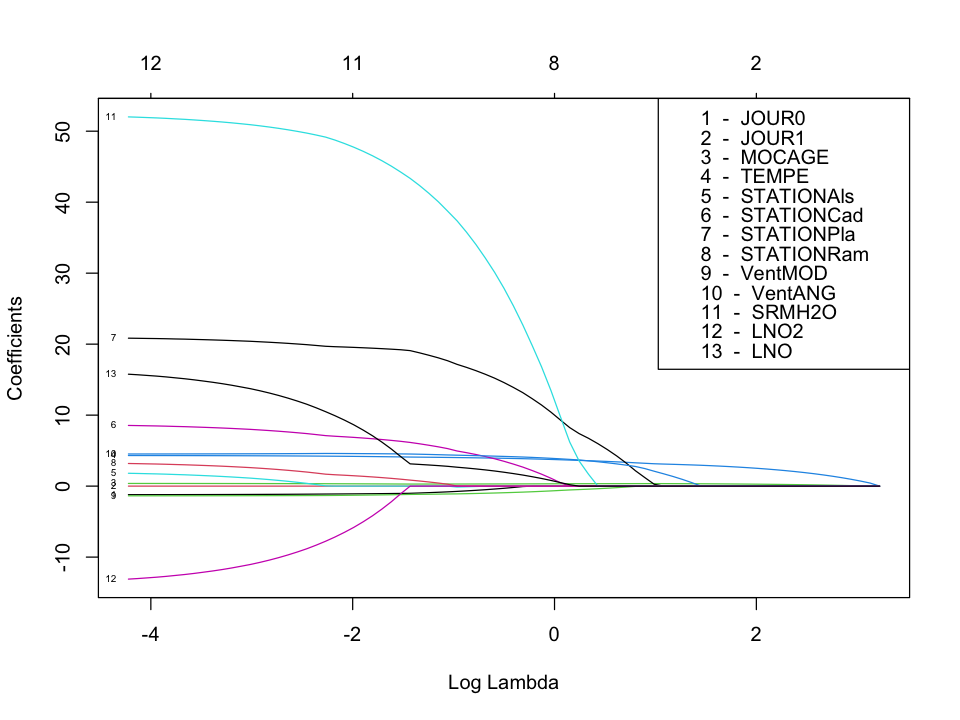

In [70]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 2],
                           x = as.matrix(datappr[, -c(1, 2, 5)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(O3obs ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$O3obs, x = x.mat)
options(repr.plot.width = 8, repr.plot.height = 6)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

***
## Questions 
* Que fait la commande model.matrix ? Comment sont gérées les variables catégorielles ?
    * Crée une matrice de conception (ou de modèle), par exemple en développant les facteurs en un ensemble de variables fictives (en fonction des contrastes) et en développant les interactions de la même manière


* Que représentent les courbes ci-dessus, appelées "chemins de régularisation"?
    * Identification de la valeur « optimale » de λ. Nous avons les logarithmes des λi en abscisse de notre graphique ils varient de log(-4) à log(3). Une règle empirique consiste à choisir la valeur de λ à partir de laquelle les coefficients commencent « à se stabiliser ». Onn se rend compte que la lecture en ce sens du graphique n’est pas aisé. De plus, cette démarche ne sous assure pas de trouver la solution qui optimise les qualités prédictives du modèle. La solution viable consiste à passer par la validation croisée, qui ne fait intervenir que l’échantillon d’apprentissage. Nous faisons appel à la fonction cv.glmnet() dans la partie suivante.

***

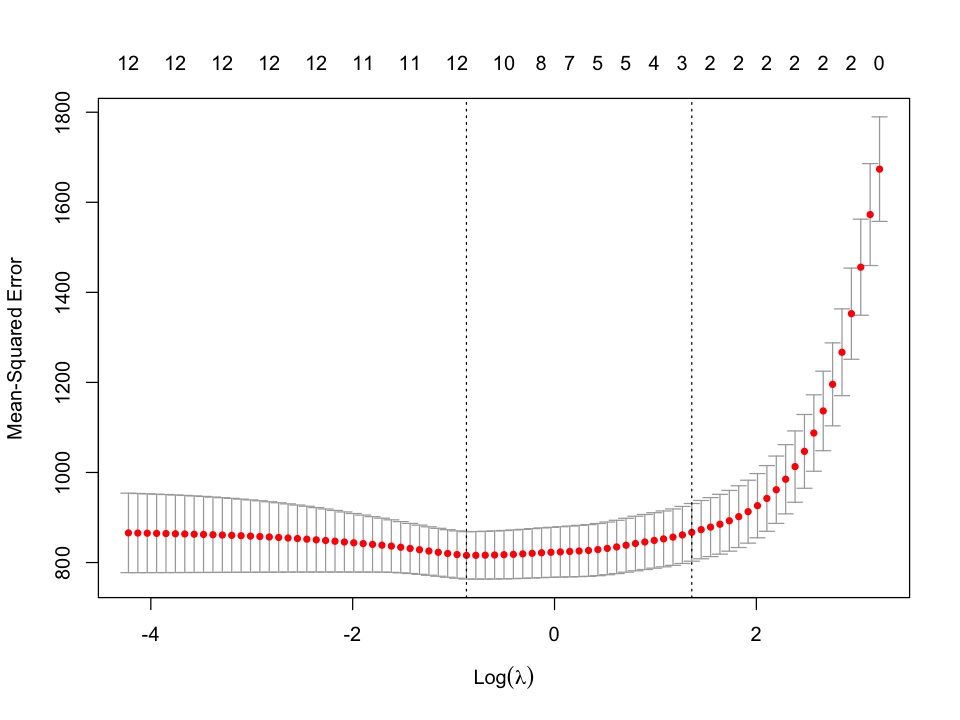

In [71]:
# choix du paramètre de régularisation par validation croisée
reg.lasso.cv <- cv.glmnet(y = datappr[, 2], x = x.mat)
plot(reg.lasso.cv)

***
## Questions
* Que représente la courbe rouge ? Et la bande qui est autour ?
    * La fonction glmnet effectue une validation croisée de k fois, produit un graphique qui permet de mettre en relation les valeurs de log(λ) avec le taux d’erreur moyen en validation croisée (points rouges). Un intervalle de confiance est tracé autour (interavles par +/- 1).


* Comment sont obtenues les valeurs de log(lambda) correspondant aux lignes verticales en pointillé ?
    * Le plus grand λ tel que MSE < min(MSE) + écart_type[min(SE)]

***

In [72]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 3.896"

14 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept) 1.1658431
JOUR0       .        
JOUR1       .        
MOCAGE      0.3370194
TEMPE       2.9855716
STATIONAls  .        
STATIONCad  .        
STATIONPla  .        
STATIONRam  .        
VentMOD     .        
VentANG     0.4939696
SRMH2O      .        
LNO2        .        
LNO         .        

In [73]:
# valeur estimée pour lambda.min
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.418"

14 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept) 1.1658431
JOUR0       .        
JOUR1       .        
MOCAGE      0.3370194
TEMPE       2.9855716
STATIONAls  .        
STATIONCad  .        
STATIONPla  .        
STATIONRam  .        
VentMOD     .        
VentANG     0.4939696
SRMH2O      .        
LNO2        .        
LNO         .        

***
## Questions
* Combien restent-ils de coefficients non nuls. Vérifier sur les chemins de régularisation.
    * il reste MOCAGE, TEMPE et VentANG, d'après le graphique des chemins de régularisation ce sont les dernières valeurs à se stabiliser


* Même question en choisissant l'autre valeur de lambda retenue par glmnet, i.e. "reg.lasso.cv$lambda.min"
    * pareil 


***

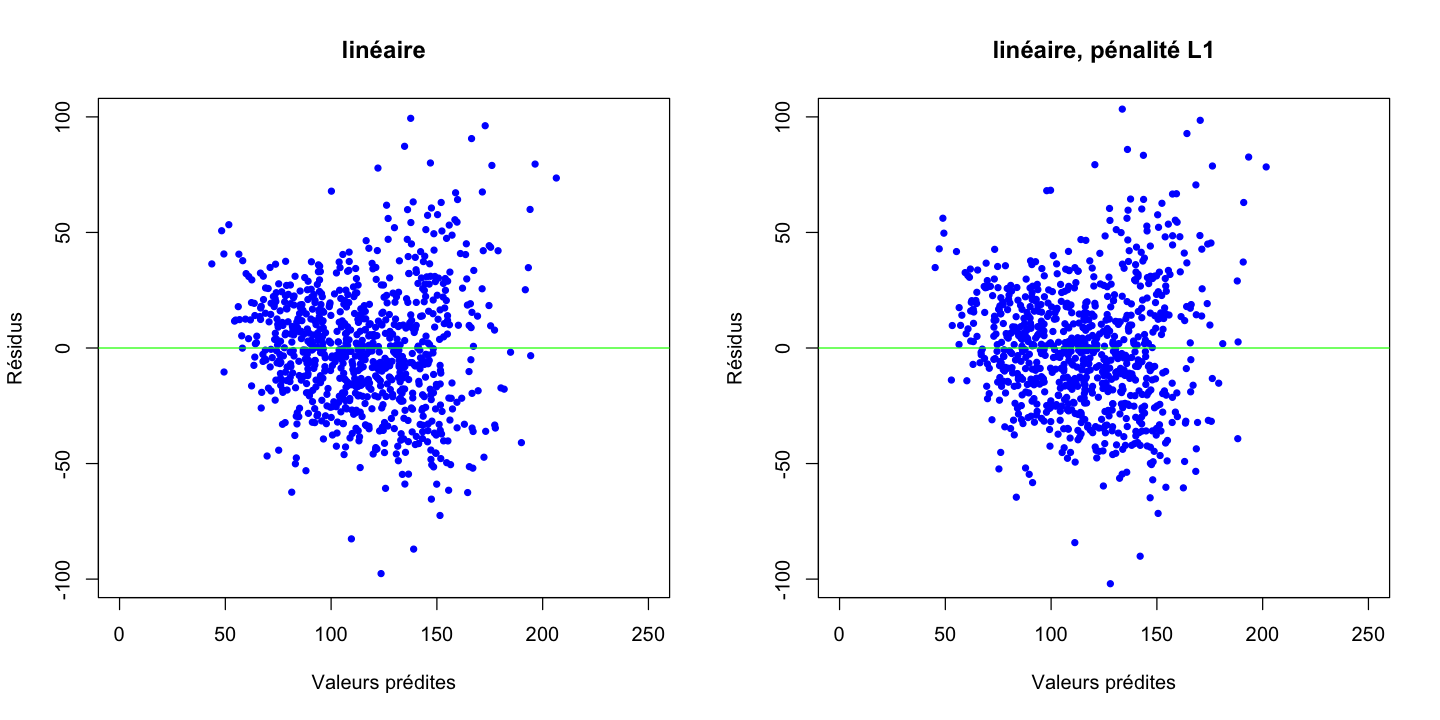

In [74]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$O3obs - fit.lasso
# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")

In [75]:
sqrt(mean(res.lm^2)) ## RMSE modèle linéaire

[1] 27.99195

In [76]:
sqrt(mean(res.lasso^2)) ## RMSE modèle linéaire

[1] 28.17064

*** 
## Questions
* Commenter.
    * Graphiquement très similaire (idée : pénalisation L1 très faible ?)


* Calculer le critère MSE (moyenne des carrés des résidus) pour les deux modèles. Pourquoi celui obtenu par LASSO est-il moins bon ? Quel critère LASSO minimise t-il ?
    * RMSE pour la régression linéaire (modèle lm) = 27.9
    * RMSE pour la régression linéaire avec régularisation lasso(modèle lasso) = 28.17
    * LASSO minimise le MSE
    * **Pourquoi moins bon ?** par ce que le lasso est utilisé quand le nombre de variable est plus important que le nombre d'observations dans ce cas, les colonnes de la matrice ne sont pas linéairement indépendantes. Très utile surtout pour sélectionner des variables dans des modèles de grande dimension ce qui n'est pas le cas ici. Je pense qu'ici il est moins performant car les variables explicatives sont corrélées

***

## Modèle quadratique

L'étude suivante met en oeuvre toutes les interactions d'ordre 2 entre les variables. Il s'agit donc d'un modèle de régression quadratique. Il est estimé avec la fonction glm qui permet une sélection automatique de modèle. La méthode descendante est utilisée mais celle pas-à-pas pourrait également l'être. Ce type de procédure n'est pas implémentée en python.


Sélection descendante: à chaque étape, chaque modèle est comparé à tous les sous-modèles possibles obtenus par suppression d'une des interactions ou une des variables, à condition qu'elle ne soit pas présente dans une interaction. La variable sélectionnée et supprimée est celle qui fait décroîre le critère considéré : AIC ou Akaïke Information Criterion.

*** 
## Questions

* Quel autre critère, équivalent à AIC dans le cas gaussien et de variance résiduelle connue, est utilisée en régression linéaire?
    * C'est le critère Cp de Mallows: c'est une estimation de l’erreur quadratique moyenne de prévision qui s’écrit aussi comme la somme d’une variance et du carré d’un biais


* Pourquoi n'est-il pas utilisable ici?
    * Car on utilise la séléction descendante (on supprime des variables donc pas possible d'utiliser Cp de Mallows)


***

In [77]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm <- glm(O3obs ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=7783.44
O3obs ~ (JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO)^2

                  Df Deviance    AIC
- JOUR:STATION     4   471877 7776.5
- STATION:VentANG  4   471970 7776.7
- JOUR:TEMPE       1   471262 7781.4
- JOUR:LNO2        1   471262 7781.4
- LNO2:LNO         1   471263 7781.4
- JOUR:SRMH2O      1   471265 7781.4
- MOCAGE:TEMPE     1   471270 7781.5
- JOUR:LNO         1   471321 7781.5
- JOUR:MOCAGE      1   471324 7781.6
- VentMOD:VentANG  1   471374 7781.6
- JOUR:VentANG     1   471464 7781.8
- MOCAGE:VentANG   1   471510 7781.9
- MOCAGE:STATION   4   475115 7782.2
- JOUR:VentMOD     1   471774 7782.3
- VentANG:SRMH2O   1   471804 7782.4
- MOCAGE:SRMH2O    1   471846 7782.5
- VentMOD:LNO2     1   472012 7782.8
- TEMPE:VentMOD    1   472318 7783.3
<none>                 471261 7783.4
- VentMOD:LNO      1   472416 7783.5
- MOCAGE:VentMOD   1   472452 7783.5
- STATION:LNO      4   476488 7784.6
- VentANG:LNO2     1   473094 7784.7


In [78]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")

Df Deviance    Resid. Df Resid. Dev F           Pr(>F)       
NULL            NA          NA 831       1394332.0           NA            NA
MOCAGE           1 469071.2081 830        925260.8  763.8571548 3.647061e-118
TEMPE            1 225512.0241 829        699748.7  367.2341644  1.630666e-67
STATION          4  10252.6125 825        689496.1    4.1739566  2.371040e-03
VentMOD          1  14316.7164 824        675179.4   23.3140002  1.652264e-06
VentANG          1  10355.9415 823        664823.5   16.8640919  4.433664e-05
SRMH2O           1    244.5782 822        664578.9    0.3982825  5.281601e-01
LNO2             1   3273.0334 821        661305.9    5.3299583  2.121919e-02
LNO              1   9138.5263 820        652167.3   14.8815971  1.238032e-04
MOCAGE:VentANG   1    229.4027 819        651937.9    0.3735699  5.412406e-01
MOCAGE:LNO2      1   1392.3531 818        650545.6    2.2673720  1.325235e-01
MOCAGE:LNO       1   7498.8544 817        643046.7   12.2114798  5.014127e-04
TEMPE:STATION    4  10079.5913 813        632967.1    4.1035177  2.681764e-03
TEMPE:VentMOD    1   3698.7762 812        629268.4    6.0232575  1.433333e-02
TEMPE:VentANG    1  11807.2735 811        617461.1   19.2275078  1.317325e-05
TEMPE:SRMH2O     1  41395.1197 810        576066.0   67.4097190  8.959821e-16
TEMPE:LNO2       1  17788.6182 809        558277.4   28.9678051  9.707807e-08
TEMPE:LNO        1   7007.4383 808        551269.9   11.4112353  7.657581e-04
STATION:VentMOD  4   3104.0582 804        548165.9    1.2636978  2.827053e-01
STATION:SRMH2O   4  19622.2380 800        528543.6    7.9884390  2.580211e-06
STATION:LNO2     4  13822.5121 796        514721.1    5.6273038  1.809803e-04
VentMOD:SRMH2O   1   1213.3495 795        513507.8    1.9758743  1.602189e-01
VentANG:SRMH2O   1    618.2969 794        512889.5    1.0068631  3.159628e-01
VentANG:LNO2     1   1374.8292 793        511514.6    2.2388352  1.349817e-01
VentANG:LNO      1  21205.1488 792        490309.5   34.5314408  6.181379e-09
SRMH2O:LNO2      1    364.8414 791        489944.6    0.5941246  4.410590e-01
SRMH2O:LNO       1   4819.5703 790        485125.1    7.8484102  5.210926e-03

In [79]:
# Comparer avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(O3obs ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, 2], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

74 x 1 sparse Matrix of class "dgCMatrix"
                              1
(Intercept)         29.78872739
JOUR0                .         
JOUR1                .         
MOCAGE               .         
TEMPE                1.26885748
STATIONAls           .         
STATIONCad           .         
STATIONPla           .         
STATIONRam           .         
VentMOD              .         
VentANG              .         
SRMH2O               .         
LNO2                 .         
LNO                  .         
JOUR1:MOCAGE         .         
JOUR1:TEMPE          .         
JOUR1:STATIONAls     .         
JOUR1:STATIONCad     .         
JOUR1:STATIONPla     .         
JOUR1:STATIONRam     .         
JOUR1:VentMOD        .         
JOUR1:VentANG        .         
JOUR1:SRMH2O         .         
JOUR1:LNO2           .         
JOUR1:LNO            .         
MOCAGE:TEMPE         0.01332892
MOCAGE:STATIONAls    .         
MOCAGE:STATIONCad    .         
MOCAGE:STATIONPla    .        

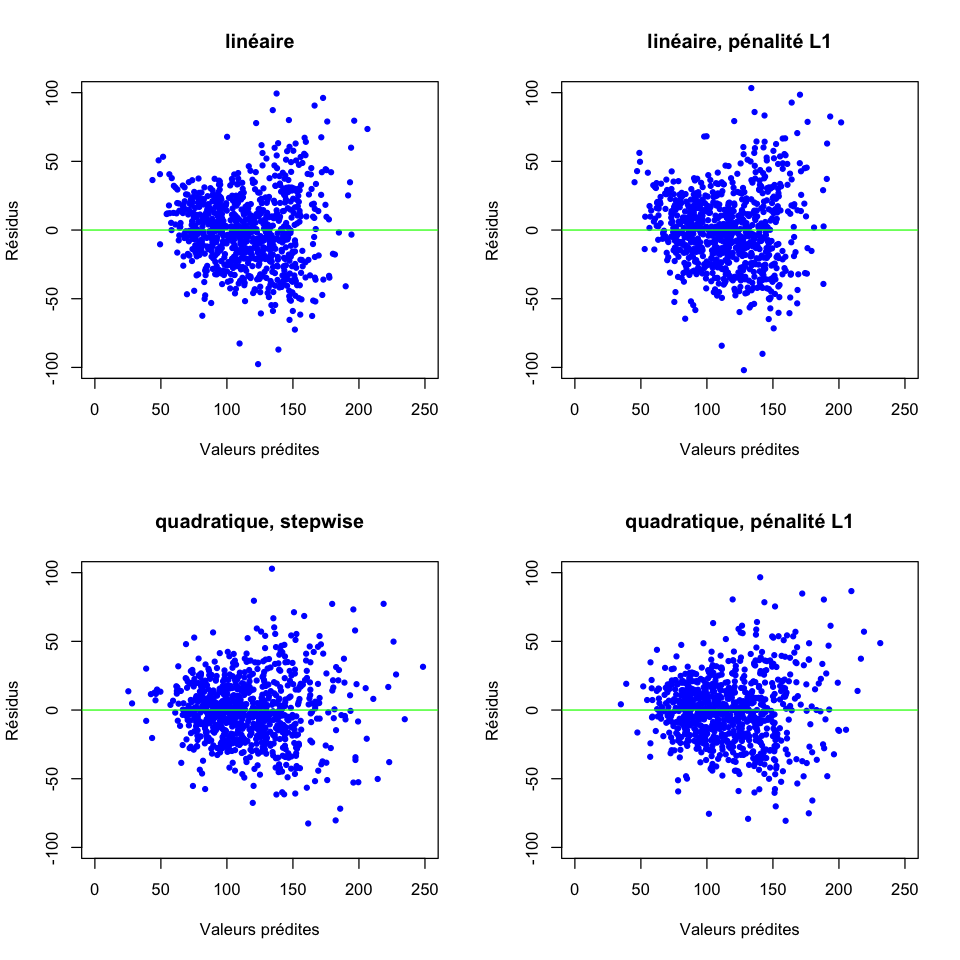

In [80]:
# Extraction des valeurs ajustées et des résidus
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$O3obs - fit.lasso2
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
plot.res(fit.glm, res.glm, "quadratique, stepwise")
plot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")

On remarque que la présence de certains interactions ou variables sont pertinentes au sens du critère d'Akaïke mais pas significative au sens du test de Fisher. 

Cette présence dans le modèle pourrait être plus finement analysée en considérant une estimation de l'erreur par validation croisée. L'idée serait de retirer une à une les variables ou interactions les moins significatives pour voir comment se comporte la validation croisée. D'autre part, si la procédure pas-à-pas conduit à un modèle différent, l'estimation de l'erreur par validation croisée permet également d'optimiser le choix.

Ces raffinements ne s'avèrent pas efficaces sur ces données. Le modèle obtenu par minimisaiton du critère AIC est conservé.



### Prévision de l'échantillon test


Le modèle "optimal" obtenu par la méthode stepwise est utilisé pour prédire l'échantillon test et estimer ainsi, sans biais, une erreur de prévision. Deux erreurs sont estimées ; la première est celle quadratique pour la régression tandis que la deuxième est issue de la matrice de confusion qui croise les dépassements de seuils prédits avec ceux effectivement observés.

In [81]:
# Calcul des prévisions
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "O3obs"])^2) / nrow(datestr)

[1] 601.5874

In [82]:
# Erreur quadratique par MOCAGE
sum((datestr[,"MOCAGE"] - datestr[,"O3obs"])^2) / nrow(datestr)

[1] 1384.503

In [83]:
# Matrice de confusion pour la prévision du dépassement de seuil
table(pred.glm > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   161   19
  TRUE      5   24

In [84]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil par MOCAGE
table(datestr[, "MOCAGE"] > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   141   19
  TRUE     25   24

Noter ces erreurs pour les comparer avec celles obtenues par les autres méthodes. Noter l'asymétrie des erreurs.

## Prévision par modèle binomial
Plutôt que de prévoir la concentration puis le dépassement, on peut se poser la question de savoir s'il ne serait pas pertinent de prévoir directement la présence ou l'absence d'un dépassement. La variable à modéliser étant binaire, c'est la régression logistique qui va être employée. Comme pour la régression, différentes stratégies de choix de modèle peuvent être utilisées et comparées avant d'estimer l'erreur de prévision sur l'échantillon test.


### Régression logistique sans interaction

In [85]:
# estimation du modèle complet
log.lm <- glm(DepSeuil ~. , data = datappq, family = binomial)
# significativité des paramètres
anova(log.lm, test = "Chisq")

Df Deviance    Resid. Df Resid. Dev Pr(>Chi)    
NULL    NA          NA 831       737.8141             NA
JOUR     1   0.4443555 830       737.3698   5.050277e-01
MOCAGE   1 125.2166123 829       612.1532   4.563158e-29
TEMPE    1 136.8421803 828       475.3110   1.305601e-31
STATION  4  16.9891229 824       458.3219   1.942378e-03
VentMOD  1  11.7860664 823       446.5358   5.967570e-04
VentANG  1   0.8373860 822       445.6984   3.601454e-01
SRMH2O   1   6.4120067 821       439.2864   1.133512e-02
LNO2     1   0.1893011 820       439.0971   6.634989e-01
LNO      1   5.3778575 819       433.7192   2.039391e-02

In [86]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step <- step(log.lm, direction = "backward")

Start:  AIC=459.72
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO

          Df Deviance    AIC
- MOCAGE   1   434.25 458.25
- JOUR     1   434.36 458.36
- VentANG  1   434.60 458.60
<none>         433.72 459.72
- LNO      1   439.10 463.10
- LNO2     1   439.21 463.21
- SRMH2O   1   440.49 464.49
- VentMOD  1   440.90 464.90
- STATION  4   455.47 473.47
- TEMPE    1   550.99 574.99

Step:  AIC=458.25
DepSeuil ~ JOUR + TEMPE + STATION + VentMOD + VentANG + SRMH2O + 
    LNO2 + LNO

          Df Deviance    AIC
- JOUR     1   434.79 456.79
- VentANG  1   435.23 457.23
<none>         434.25 458.25
- SRMH2O   1   441.49 463.49
- VentMOD  1   442.86 464.86
- LNO      1   447.00 469.00
- LNO2     1   451.13 473.13
- STATION  4   471.33 487.33
- TEMPE    1   558.59 580.59

Step:  AIC=456.79
DepSeuil ~ TEMPE + STATION + VentMOD + VentANG + SRMH2O + LNO2 + 
    LNO

          Df Deviance    AIC
- VentANG  1   436.01 456.01
<none>         434.79 456.79

In [87]:
# Modèle obtenu
anova(log.lm.step, test = "Chisq")

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)    
NULL    NA         NA 831       737.8141             NA
TEMPE    1 214.189011 830       523.6251   1.674882e-48
STATION  4  32.315989 826       491.3091   1.648689e-06
VentMOD  1  29.015384 825       462.2937   7.180577e-08
SRMH2O   1   9.116772 824       453.1770   2.532764e-03
LNO2     1   5.017192 823       448.1598   2.509684e-02
LNO      1  12.150777 822       436.0090   4.906743e-04

In [88]:
# matrice de confusion de l'échantillon 
# d'apprentissage et erreur apparente
table(log.lm.step$fitted.values > 0.5, datappq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   673   70
  TRUE     24   65

## Régression logistique avec interactions

Avec autant de variables et d'interactions donc de paramètres, l'estimation du modèle complet de régression logistique rencontre des soucis et affiche des warnings car certaines probabilité trop bien ajustés (0 ou 1) provoquent des divisions par 0. Ici une procédure forward ou mieux stepwise de sélection des variables et interactions conduit à des résultats raisonnables. Une méthode avec pénalisation L1 peut aussi être utilisée.

In [89]:
# régression avec le modèle minimum
log.qm <- glm(DepSeuil ~ 1, data = datappq,family = binomial)
# algorithme stepwise en précisant le plus grand 
# modèle possible
log.qm.step1 <- step(log.qm, direction = "both",
    scope = list(lower = ~1, upper = ~(JOUR + MOCAGE + TEMPE + 
            STATION + VentMOD + VentANG + LNO2 + LNO + SRMH2O)^2), 
    family=binomial)

Start:  AIC=739.81
DepSeuil ~ 1

          Df Deviance    AIC
+ TEMPE    1   523.63 527.63
+ MOCAGE   1   613.24 617.24
+ SRMH2O   1   683.87 687.87
+ VentANG  1   726.72 730.72
+ STATION  4   721.68 731.68
+ LNO2     1   727.76 731.76
+ VentMOD  1   733.38 737.38
<none>         737.81 739.81
+ LNO      1   736.47 740.47
+ JOUR     1   737.37 741.37

Step:  AIC=527.63
DepSeuil ~ TEMPE

          Df Deviance    AIC
+ MOCAGE   1   476.67 482.67
+ STATION  4   491.31 503.31
+ SRMH2O   1   503.12 509.12
+ VentMOD  1   515.31 521.31
+ VentANG  1   516.54 522.54
<none>         523.63 527.63
+ LNO      1   521.92 527.92
+ JOUR     1   522.78 528.78
+ LNO2     1   523.06 529.06
- TEMPE    1   737.81 739.81

Step:  AIC=482.67
DepSeuil ~ TEMPE + MOCAGE

               Df Deviance    AIC
+ SRMH2O        1   465.50 473.50
+ STATION       4   460.11 474.11
+ LNO           1   470.23 478.23
+ LNO2          1   471.61 479.61
+ VentMOD       1   473.42 481.42
+ VentANG       1   473.55 481.55
<none>  

In [90]:
anova(log.qm.step1, test = "Chisq")

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)    
NULL           NA         NA 831       737.8141             NA
TEMPE           1 214.189011 830       523.6251   1.674882e-48
MOCAGE          1  46.956415 829       476.6687   7.258302e-12
SRMH2O          1  11.172483 828       465.4962   8.301945e-04
STATION         4  15.922320 824       449.5739   3.125190e-03
VentMOD         1   8.683311 823       440.8906   3.211370e-03
TEMPE:STATION   4  11.682335 819       429.2083   1.987666e-02
MOCAGE:VentMOD  1   5.702069 818       423.5062   1.694493e-02
SRMH2O:STATION  4  15.218744 814       408.2874   4.268380e-03
TEMPE:SRMH2O    1   6.941017 813       401.3464   8.424122e-03
MOCAGE:STATION  4   8.537208 809       392.8092   7.376738e-02

In [91]:
# Prévision
pred.log <- predict(log.qm.step1, newdata = datestq, type = "response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.log > 0.5, datestq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   164   20
  TRUE      2   23

Comparer avec l'approche précédente. Mémoriser les résultats obtenus pour comparer avec les autres méthodes.

***
**Question**


Le nombre de vrai négatif a augmenté par rapport à la technique précédante mais les matrices de confusion ne sont pas symétriques et affectées du même biais : tous ces modèles oublient systématiquement plus de dépassements de seuils qu’ils n’en prévoient. Une analyse plus poussée de l’estimation de l’erreur de prévision est nécessaire.


***

## Courbe ROC
Il est également possible de construire une courbe ROC en association de la prévision obtenue à partir d'un modèle gaussien. En effet, la variation du seuil théorique de dépassement (150) va faire varier les proportions respectives des taux de vrais et faux positifs. Cela revient encore à faire varier le seuil d'une "proba" pour les valeurs de prévisions divisées par 300.

In [92]:
#install.packages("ROCR")

In [93]:
library(ROCR)

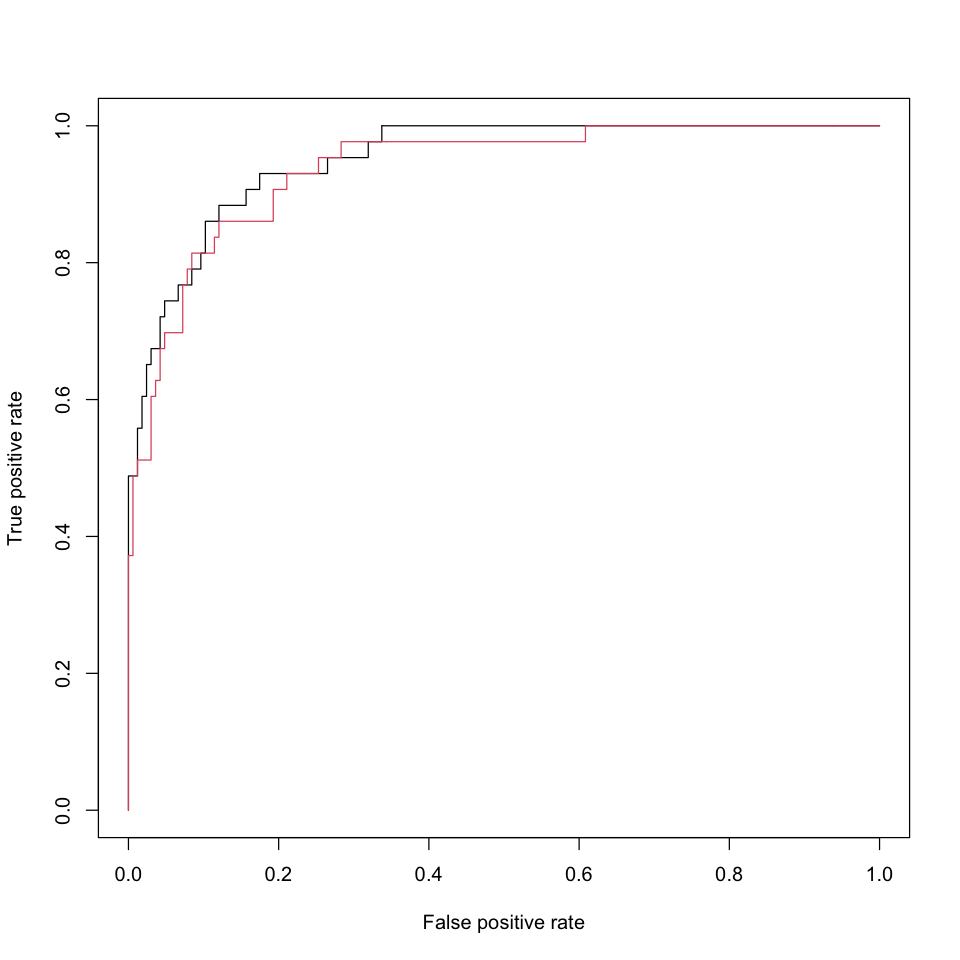

In [94]:
roclogit <- predict(log.qm.step1, newdata = datestq, type="response")
predlogit <- prediction(roclogit, datestq[, "DepSeuil"])
perflogit <- performance(predlogit, "tpr", "fpr")
# Tracé de la courbe
plot(perflogit, col = 1)
# Calculs pour la régression
rocglm <- pred.glm / 300
predglm <- prediction(rocglm, datestq[, "DepSeuil"])
perfglm <- performance(predglm, "tpr", "fpr")
# tracé de la courbe et ajout au graphe précédent.
plot(perfglm, col = 2, add = TRUE)

Les résultats obtenus dépendent évidemment en plus de l'échantillonnage initial entre apprentissage et test. Dans le cas où les courbes se croisent, cela signifie qu'il n'y a pas de prévision uniformément meilleure de l'occurrence de dépassement. Cela dépend de la sensibilité ou de la spécificité retenue pour le modèle. Ceci souligne l'importance de la bonne définition du critère à utiliser pour le choix d'une "meilleure" méthode. Ce choix dépend directement de celui , "politique" ou "économique" de sensibilité et / ou spécificité du modèle retenu. En d'autres termes, quel taux de fausse alerte, avec des imputations économiques évidentes, est supportable au regard des dépassements non détectés et donc de la dégradation sanitaire de la population à risque ?



C'est une fois ce choix arrêté que le statisticien peut opérer une comparaison des méthodes en présence.

***
## Questions

* Que sont sensibilité et spécificité d'une courbe ROC?

   * La sensibilité est la proportion de vrais positifs 
   * La spécificité est la proportion de vrais négatifs



* Les performances des deux approches gaussiennes et binomiales sont-elles très différentes?
    * L'approche binomiales réduit le nombre de faux positif (d'après la matrice de confusion)

***

# Analyse discriminante

### Introduction
L'objectif est de comparer les trois méthodes d'analyses discriminantes disponibles dans R: lda paramétrique linéaire (homoscédasticité), qda paramétrique quadratique (hétéroscédasticité) sous hypothèse gaussienne et celle non-paramétrique des $k$ plus proches voisins.

***
## Questions
* Quel critère d'affectation est utilisé en lda?
    * Le principe est de modéliser la distribution de chaque variable prédictive par une loi de probabilité gaussienne qui dépend de la classe à prédire et de calculer les paramètres de ces lois de probabilité. Puis, lors de la prédiction, on applique la loi de Bayes pour en déduire la probabilité de chaque classe connaissant les valeurs des variables prédictives. 
* Que signifient les hypothèses d'homo ou d'hétéroscédasticité?
    * L'homoscédasticité, (variance = scédasticité) d'un modèle est testé pour voir si toutes les variables explicatives (sauf la variable constante) ont un effet significatif sur la variable à prédire. Alors la variance de l'erreur est constante pour toutes les estimations.
    * Le concept d' hétéroscédasticité décrit le cas où la variance des erreurs du modèle n'est pas la même pour toutes les observations, alors que souvent, l'une des hypothèse de base en modélisation (régréssion linéaire..) est que les variances sont homogènes et que les erreurs du modèle sont identiquement distribuées.

* Quelle fonction est estimée "non paramétriquement" par l'algorithme des $k$ plus proches voisins?
    * la fonction cl le facteur de bonne classification dans le dataset d'apprentissage

*** 

Attention, ces techniques n'acceptent par principe que des variables explicatives ou prédictives quantitatives. Néanmoins, une variable qualitative à deux modalités, par exemple le type de jour, peut être considérée comme quantitative sous la forme d'une fonction indicatrice prenant ses valeurs dans $\{0, 1\}$ et, de façon plus "abusive", une variable ordinale est considérée comme "réelle". Dans ce dernier cas, il ne faut pas tenter d'interpréter les fonctions de discrimination, juste considérer des erreurs de prévision. La variable Station n'est pas prise en compte.
La bibliothèque standard de R (MASS) pour l'analyse discriminante ne propose pas de procédure automatique de choix de variable mais, dans cet exemple, les variables sont peu nombreuses

### Estimation des modèles

In [95]:
library(MASS) # chargement des librairies
library(class) # pour kNN

In [96]:
# analyse discriminante linéaire
disc.lda=lda(DepSeuil~.,data=datappq[,-4]) 
# analyse discriminante quadratique 
disc.qda=qda(DepSeuil~.,data=datappq[,-4]) 
# k plus proches voisins
disc.knn=knn(datappq[,c(-4,-10)],datappq[,c(-4,-10)],datappq$DepSeuil,k=10)


Noter le manque d'homogénéité des commandes de R issues de librairies différentes. L'indice de colonne négatif ($-10$) permet de retirer la colonne contenant la variable à prédire de type facteur. Celle-ci est mentionnée en troisième paramètre pour les données d'apprentissage. La librairie caret contourne ces difficultés en englobant toutes les librairies d'apprentissage et en homogénéisant les appels pour l'estimation et la prévision des modèles.

### Estimation de l'erreur de prévision par validation croisée

In [97]:
# erreur par validation croisée  en analyse discriminante linéaire
disc.lda=lda(DepSeuil~.,data=datappq[,-4],CV=T) 
# estimer le taux d'erreur à partir de la matrice de confusion
table(datappq[,"DepSeuil"],disc.lda$class)

       
        FALSE TRUE
  FALSE   673   24
  TRUE     77   58

In [98]:
# analyse discriminante quadratique
disc.qda=qda(DepSeuil~.,data=datappq[,-4],CV=T)  
table(datappq[,"DepSeuil"],disc.qda$class)

       
        FALSE TRUE
  FALSE   665   32
  TRUE     78   57


Pour knn, le choix du nombre de voisins $k$ doit être optimisé par validation croisée mais la procédure proposée par la bibliothèque class est celle leave-one-out, donc trop coûteuse en calcul pour des gros fichiers. Il serait simple de la programmer mais une autre bibliothèque (e1071) propose déjà une batterie de fonctions de validation croisée pour de nombreuses techniques de discrimination.

In [99]:
#install.packages("e1071")

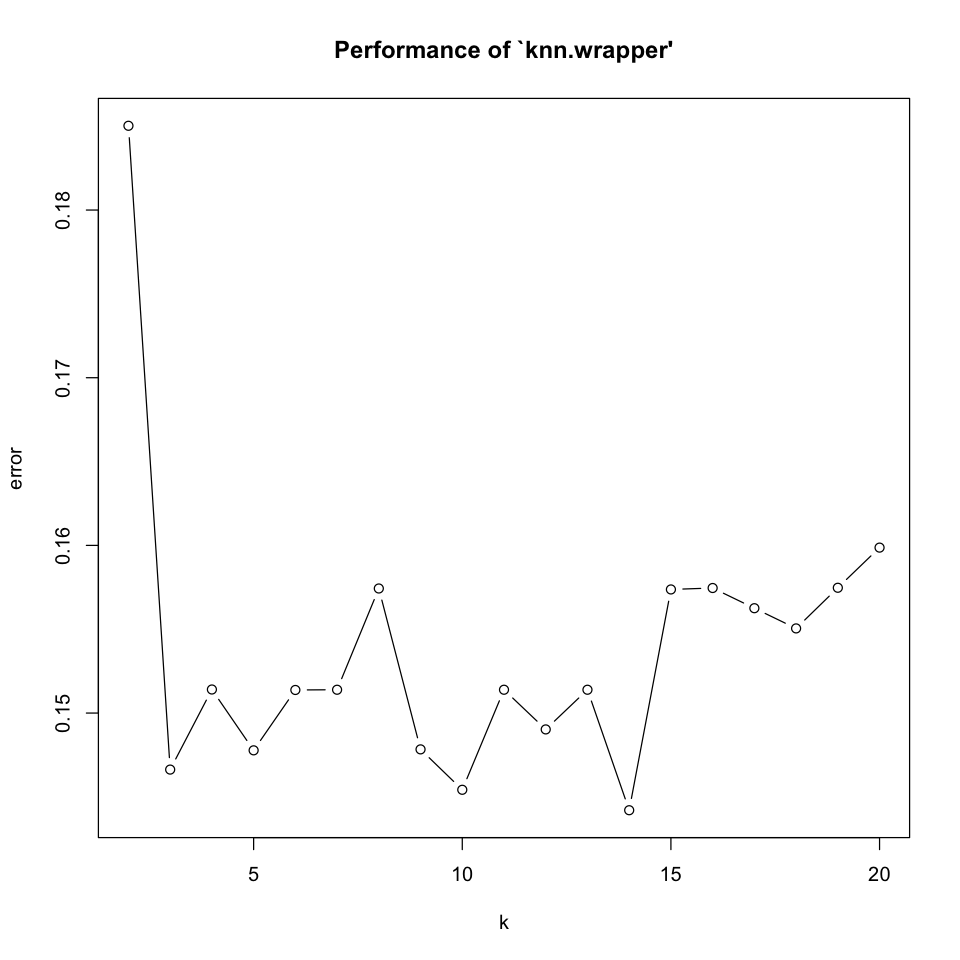

In [100]:
# k plus proches voisins: optimisation de k
library(e1071)
plot(tune.knn(as.matrix(datappq[,c(-4,-10)]),as.factor(datappq[,10]),k=2:20))

***
## Questions

* Quelle procédure de validation croisée est exécutée par défaut par la fonction tune?
    * 10-fold cross validation par défaut et la fonction knn leave-one-out (bibliothèque class)


Lancer plusieurs exécutions successives de cette "optimisation".


* Pourquoi la valeur de $k$ optimale diffère à chaque exécution? Comment choisir k ?
    * à cause du choix des observations qui est aléatoire, plusieurs exécutions permettent de converger vers un k "idéal" dans la plus part des cas donc chaque exécution de l’estimation de l’erreur par validation croisée conduit à des résultats aléatoires et très différents et k optimal oscille entre 5 et 15

Comparer avec les erreurs précédentes estimées également par validation croisée.

* Quelle analyse discriminante retenir ? Pourquoi?
    * au sens de la validation croisée c'est la lda et non pas la qda qui est meilleure, en comlparant leurs matrices de confusion la lda classe mieux les échantillons

***

## Erreur sur l'échantillon test
Les commandes suivantes calculent la matrice de confusion pour la "meilleure" méthode d'analyse discriminante au sens de la validation croisée. Cette "meilleure" méthode peut être edifférente d'un participant à l'autre.

In [101]:
disc.lda=lda(DepSeuil~.,data=datappq[,-4])  
table(datestq[,"DepSeuil"],predict(disc.lda,datestq[,-4])$class)

       
        FALSE TRUE
  FALSE   162    4
  TRUE     21   22


A titre indicatif, voici l'estimation de l'erreur sur l'échantillon test pour la méthode des $k$ plus proches voisins.

In [102]:
disc.knn=knn(as.matrix(datappq[,c(-4,-10)]),as.matrix(datestq[,c(-4,-10)]),datappq$DepSeuil,k=15)
table(disc.knn,datestq$DepSeuil)

        
disc.knn FALSE TRUE
   FALSE   162   31
   TRUE      4   12

## Courbes ROC

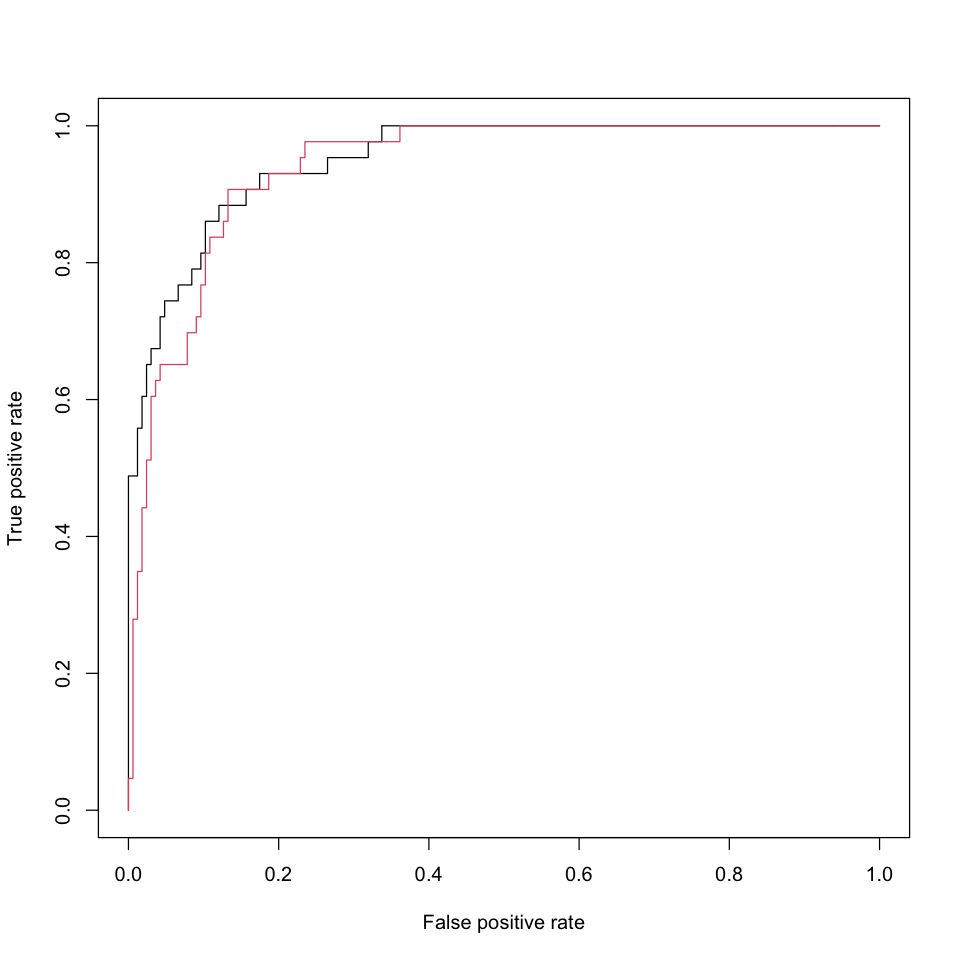

In [103]:
ROCdiscrim=predict(disc.lda,datestq[,c(-4)])$posterior[,2]
preddiscrim=prediction(ROCdiscrim,datestq$DepSeuil)
perfdiscrim=performance(preddiscrim,"tpr","fpr")
# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col=1) 
plot(perfdiscrim,col=2,add=TRUE)

***
## Question

* Une méthode est elle uniformément meilleure sur cet échantillon test ?
    * c'est logit qui a une distribution unifome (lissé) de tp_rate et fp_rate et qui converge plus rapidement vers l'optimum
***

## TP5. Arbre de décision (partie TD+TP)

In [104]:
#install.packages("rpart.plot")

In [105]:
library(rpart) # chargement de la librairie
library(rpart.plot)

In [106]:
data <- read.csv(file = '/Users/nemanja/Documents/FAC/M1S2/ArbreDecision/TP1/barbecue.csv')

In [107]:
data

Meteo Amis Vent Jour barbecue
1 1     1    0    1    1       
2 1     0    1    0    0       
3 1     1    1    0    0       
4 1     0    0    0    1       
5 0     0    0    1    0       
6 0     1    1    1    0       
7 0     0    1    0    0       
8 0     1    0    1    1       
9 1     0    0    1    0

In [108]:
fit <- rpart(formula= barbecue~Meteo+Amis+Vent+Jour, data = data, method = 'class', control=rpart.control(minsplit=2, minbucket=1, cp=0.001))

In [109]:
printcp(fit) # display the results 


Classification tree:
rpart(formula = barbecue ~ Meteo + Amis + Vent + Jour, data = data, 
    method = "class", control = rpart.control(minsplit = 2, minbucket = 1, 
        cp = 0.001))

Variables actually used in tree construction:
[1] Amis Jour Vent

Root node error: 3/9 = 0.33333

n= 9 

       CP nsplit rel error xerror   xstd
1 0.33333      0         1      1 0.4714
2 0.00100      3         0      1 0.4714


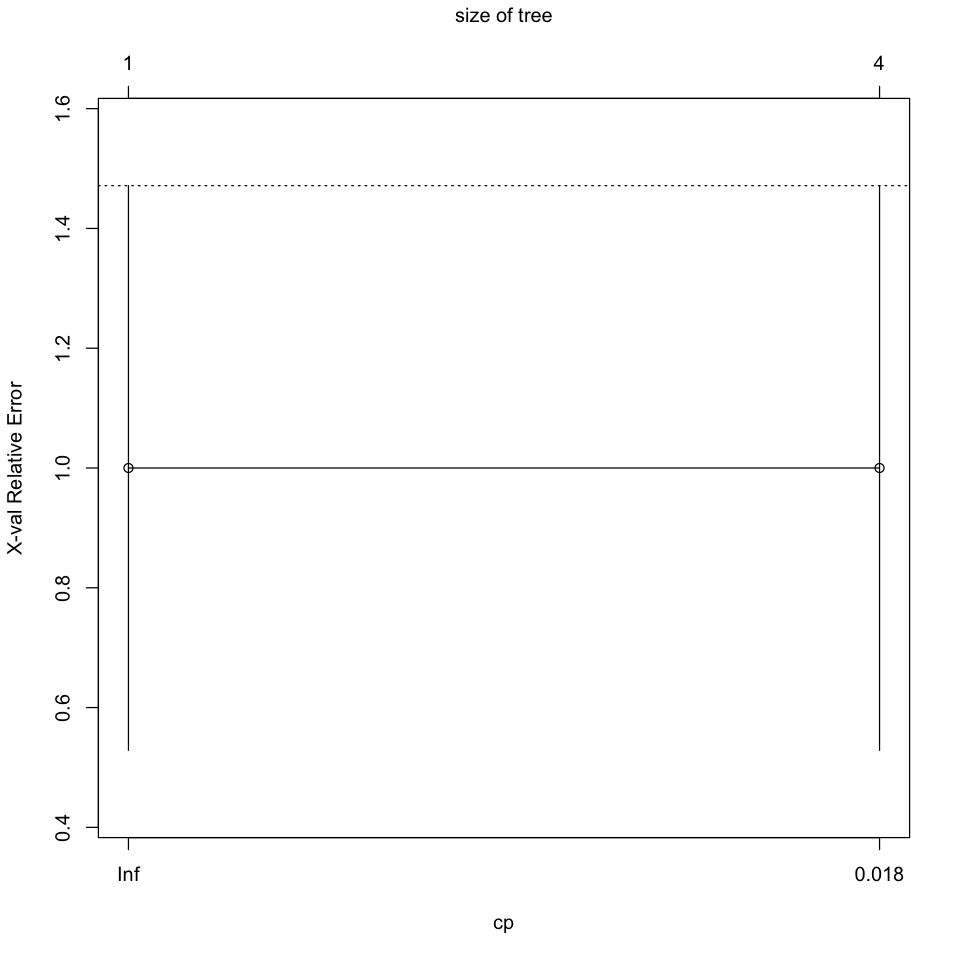

In [110]:
plotcp(fit) # visualize cross-validation results 

In [111]:
summary(fit)

Call:
rpart(formula = barbecue ~ Meteo + Amis + Vent + Jour, data = data, 
    method = "class", control = rpart.control(minsplit = 2, minbucket = 1, 
        cp = 0.001))
  n= 9 

         CP nsplit rel error xerror      xstd
1 0.3333333      0         1      1 0.4714045
2 0.0010000      3         0      1 0.4714045

Variable importance
Jour Vent Amis 
  44   33   22 

Node number 1: 9 observations,    complexity param=0.3333333
  predicted class=0  expected loss=0.3333333  P(node) =1
    class counts:     6     3
   probabilities: 0.667 0.333 
  left son=2 (4 obs) right son=3 (5 obs)
  Primary splits:
      Vent  < 0.5 to the right, improve=1.6, (0 missing)
      Amis  < 0.5 to the left,  improve=0.4, (0 missing)
      Meteo < 0.5 to the left,  improve=0.1, (0 missing)
      Jour  < 0.5 to the left,  improve=0.1, (0 missing)
  Surrogate splits:
      Jour < 0.5 to the left,  agree=0.778, adj=0.5, (0 split)

Node number 2: 4 observations
  predicted class=0  expected loss=0  P(node) =

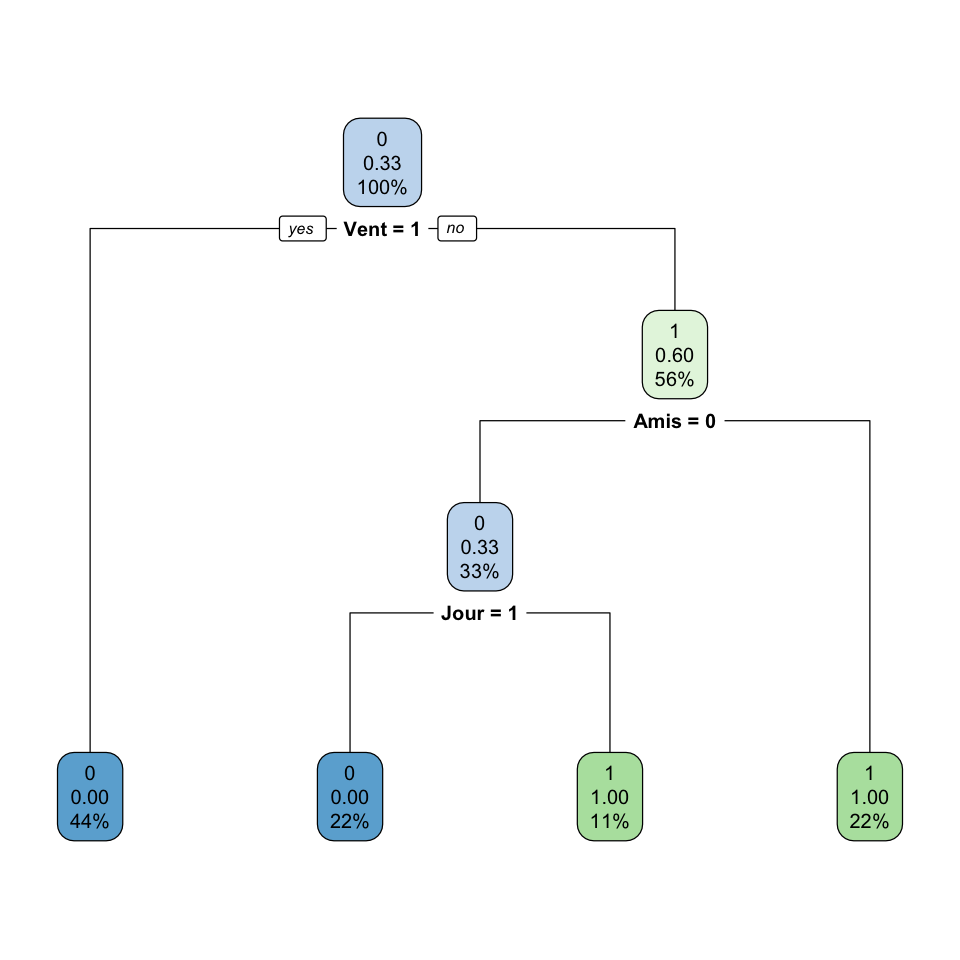

In [112]:
rpart.plot(fit)

In [113]:
test <- read.csv(file = '/Users/nemanja/Documents/FAC/M1S2/ArbreDecision/TP1/barbecue_train.csv')

In [114]:
predictions <-predict(fit, test, type = 'class')

In [115]:
fit

n= 9 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 9 3 0 (0.6666667 0.3333333)  
   2) Vent>=0.5 4 0 0 (1.0000000 0.0000000) *
   3) Vent< 0.5 5 2 1 (0.4000000 0.6000000)  
     6) Amis< 0.5 3 1 0 (0.6666667 0.3333333)  
      12) Jour>=0.5 2 0 0 (1.0000000 0.0000000) *
      13) Jour< 0.5 1 0 1 (0.0000000 1.0000000) *
     7) Amis>=0.5 2 0 1 (0.0000000 1.0000000) *

In [116]:
table_mat <- table(test$barbecue, predictions)
table_mat

   predictions
    0 1
  0 6 0
  1 0 3

In [117]:
print(fit$cptable[which.min(fit$cptable[,4]),1])

[1] 0.3333333


In [118]:
tree_opt <- prune(fit,cp=fit$cptable[which.min(fit$cptable[,4]),1])

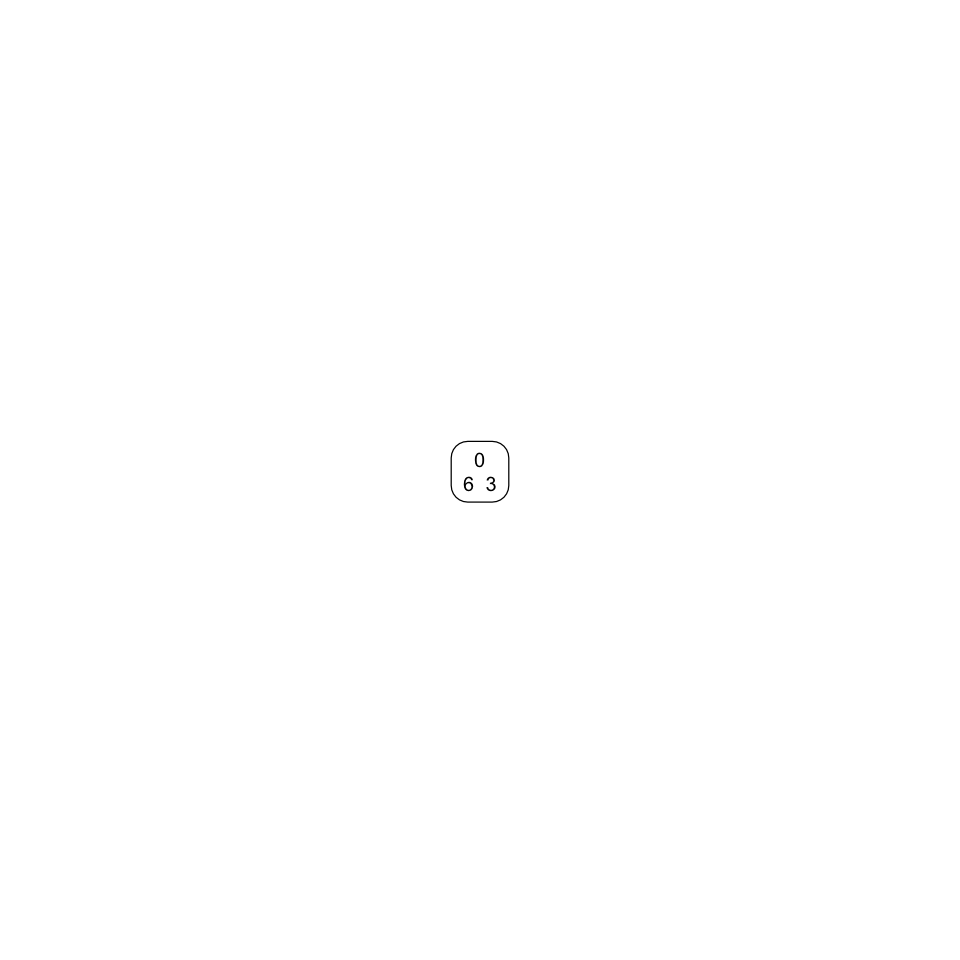

In [119]:
prp(tree_opt,extra=1)

## Arbre de décision binaire

La librairie  rpart est celle la plus couramment utilisée pour la construction d'arbres de décision. Deux types d'arbre peuvent être estimer selon que la variable à modéliser est la concentration d'ozone (arbre de régression) ou directement le dépassement du seuil (arbre de discrimination ou de décision). Différents paramètres contrôlent l'exécution de l'algorithme: la pénalisation minimale (cp) pour la construction de l'arbre maximal, le nombre minimal d'observation par noeud, le nombre de validations croisées (par défaut 10)... cf. l'aide en ligne (?rpart.control) pour plus de détails mais celle-ci n'est pas très explicite sur certains paramètres, c'est le travers des logiciels "libres".

NB. Une séquence de valeurs de la pénalisation cp est associée à une séquence d'arbres emboîtés.
Estimation et élagage de l'arbre de régression

***
## Question
* Quel critère est optimisé lors de la création d'un noeud? de l'arbre?
    * Le critère optimisé est la homogénéité des descendants par rapport à la variable cible, la variable qui est testée dans un nœud sera celle qui maximise cette homogénéité (entropie, concentration de Ginie..)
***

In [120]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu
# summary(tree.reg)  
# mais un graphe est  préférable

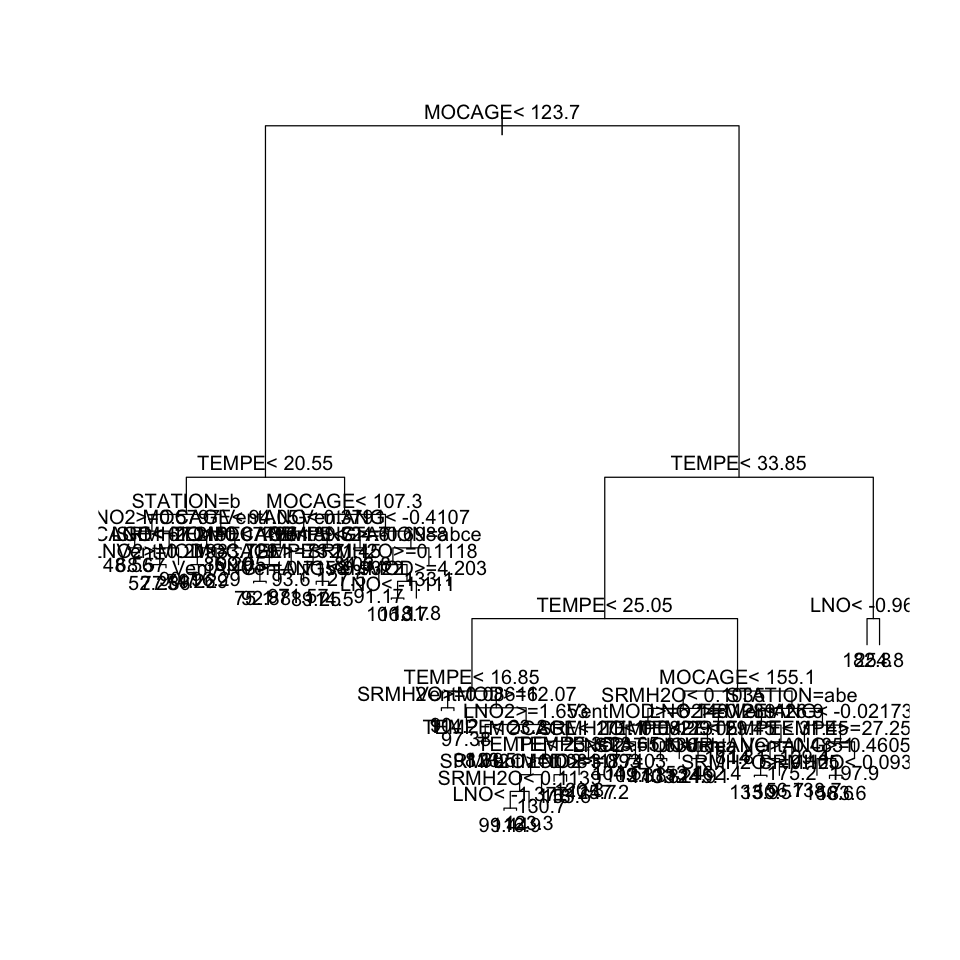

In [121]:
plot(tree.reg)
text(tree.reg)


L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par validation croisée 10-fold pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. La séquence de ces valeurs est implicitement celle fournit par rpart.

In [122]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"O3obs"])^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0.650389937 0.190757054 0.086599002 0.044402955 0.026636689 0.018187164 
  1402169.3    997686.8    914903.0    834867.3    758847.0    737186.4 
0.013732509 0.011084622 0.008362540 0.007221621 0.006956881 0.006653914 
   732870.6    708474.5    694643.5    696501.1    695161.6    705391.9 
0.006487036 0.006270700 0.005972066 0.005319037 0.004732087 0.004557061 
   705391.9    709624.0    706404.2    697287.5    701391.9    700279.9 
0.004513292 0.004302262 0.004031475 0.003886693 0.003757776 0.003456486 
   698712.2    703908.6    701749.2    709482.7    715696.2    721727.2 
0.002930327 0.002647561 0.002567387 0.002437882 0.002374911 0.002342909 
   719786.4    724381.1    717700.8    714139.8    717827.1    716073.1 
0.002280352 0.002186360 0.002005132 0.001884622 0.001785959 0.001682822 
   717272.2    722514.2    720360.2    730380.5    733020.6    736273.6 
0.001630264 0.001587103 0.001579396 0.001451242 0.001333661 0.001326259 
   737112.3    735978.0    735978.0    737898.6    740435.8    740435.8 
0.001314821 0.001281492 0.001246655 0.001224731 0.001193056 0.001087566 
   739833.8    744614.4    746546.6    745786.5    745605.5    746069.3 
0.001004035 
   747378.7

Chercher la valeur de cp correspondant à la plus petite erreur puis l'utiliser la construction del'arbre.

In [123]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.00836254

In [124]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

La librairie partykit propose une construction graphique de l'arbre:

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



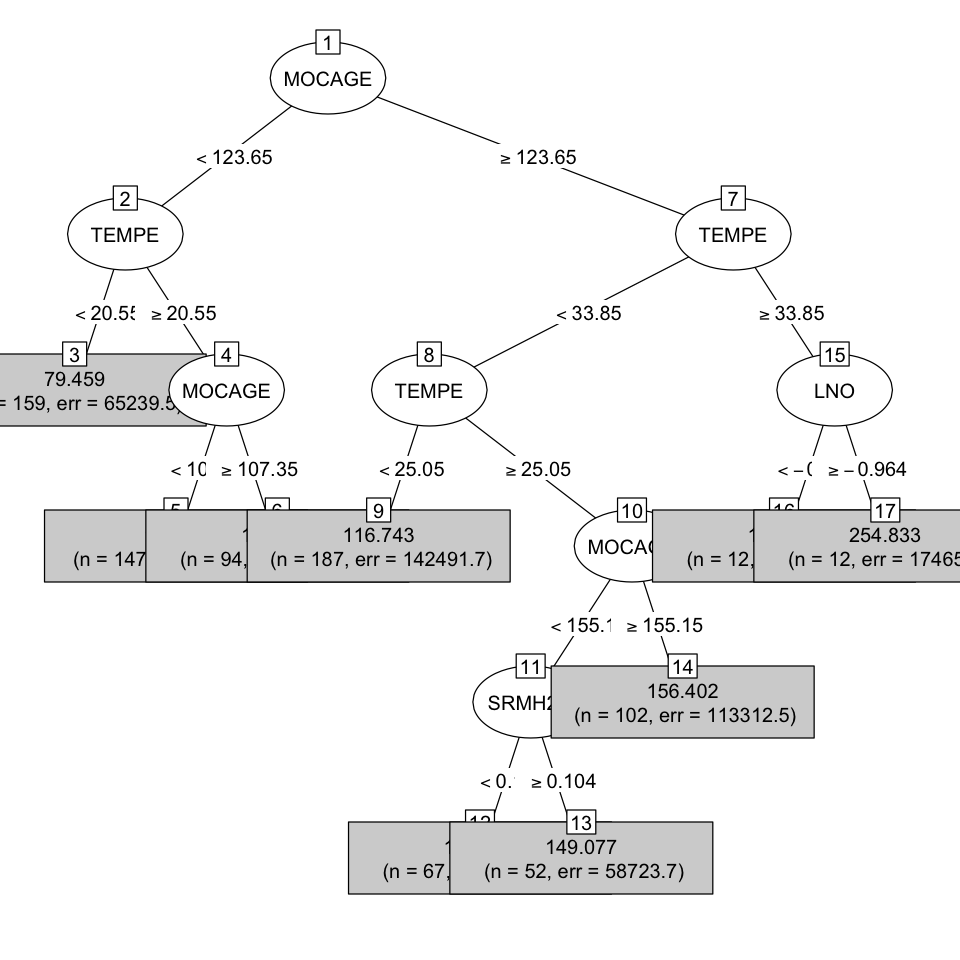

In [125]:
#install.packages("partykit")
library(partykit)
plot(as.party(tree.reg), type="simple")

La fenêtre est trop petite pour représenter les distributions (histogramme) de la variable cible (concentration en ozone) dans chaque feuille.

***
## Question 
* Quelle est la variable qui contribue le plus à l'interprétation?
    * c'est la variable MOCAGE à la racine de l'arbre puis la température



*** 


### Graphe des résidus

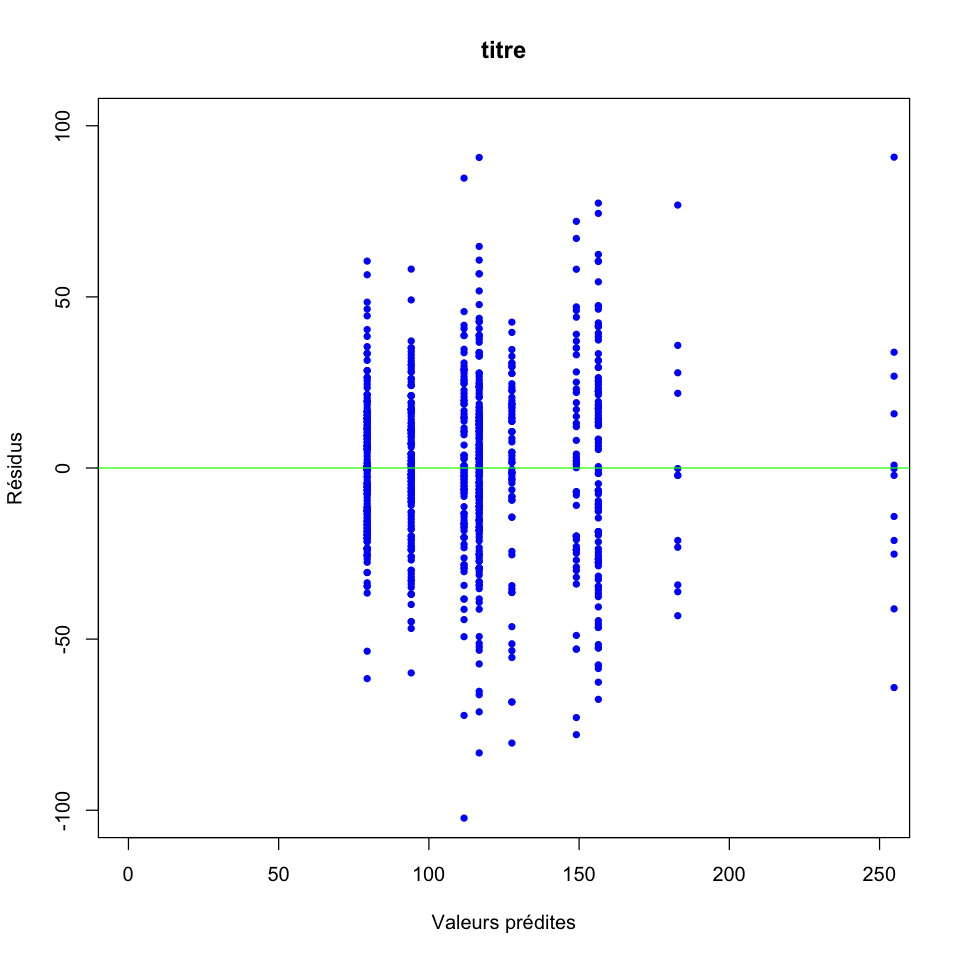

In [126]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"O3obs"]
plot.res(fit.tree,res.tree)

***
## Question

* A quoi est due la structure particulière de ce graphe?
    * Le graphique ci-dessous présente les résidus de l’échantillon test du modèle d’arbre de régression qui prennent une structure particulière car les observations (données test) communes à une feuille terminale ontla même valeur, il y a donc une colonne par feuille. 


***

## Estimation et élagage d'un arbre de discrimination

Dans le cas d'une discrimination, le critère par défaut est l'indice de concentration de Gini ; il est possible de préciser un autre critère (split="information") ainsi que des poids sur les observations, une matrice de coûts de mauvais classement ainsi que des probabilités a priori (?rpart pour plus de détails).

***
## Question 
* Quel autre critère d'hétérogénéité est utilisé?
    * l'entropie (Y qualitative) et la variance (si Y quantitative)

***

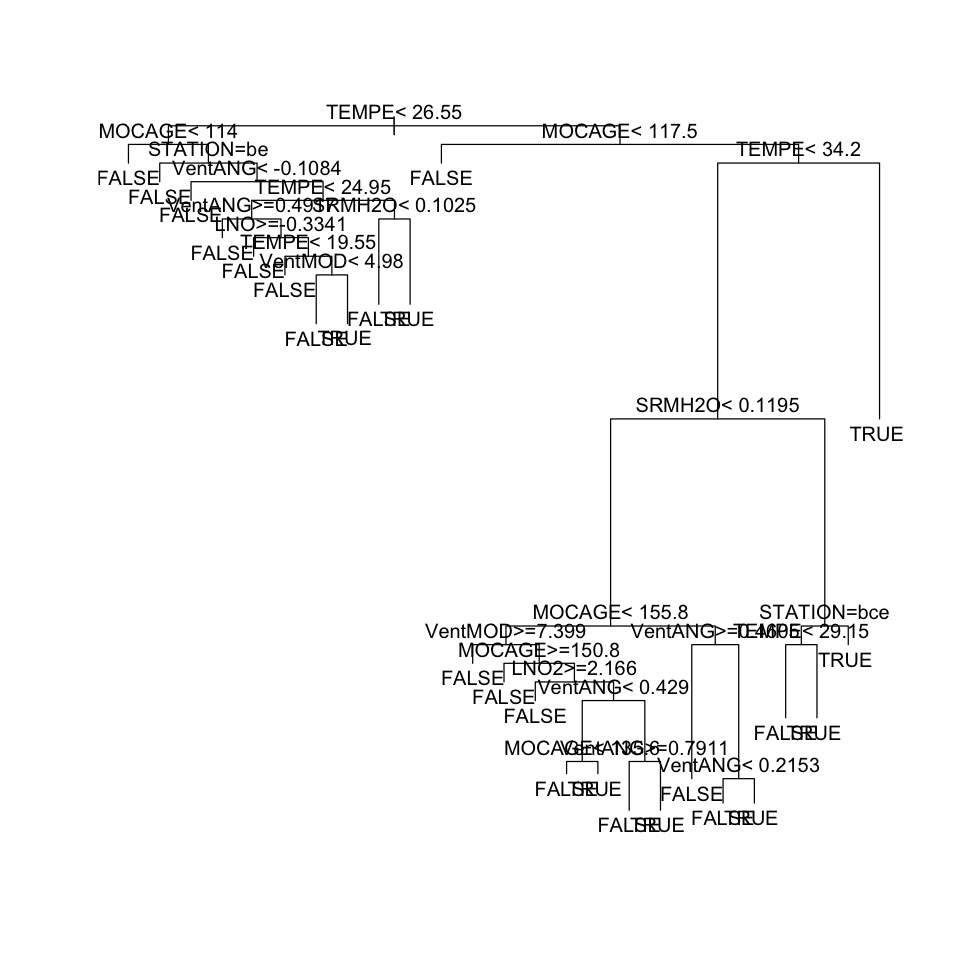

In [127]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)

La même procédure d'élagage par validation croisée est mise en place mais avec un expression différente de l'erreur de prévision: taux de mal classés plutôt qu'erreur quadratique.

In [128]:
xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr=datappq$DepSeuil!= (xmat>1.5) 
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0.525925926 0.045961754 0.030089031 0.018144368 0.012394963 0.009799079 
  0.1622596   0.1442308   0.1442308   0.1430288   0.1514423   0.1514423 
0.008281733 0.002721655 
  0.1514423   0.1598558

In [129]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.01814437

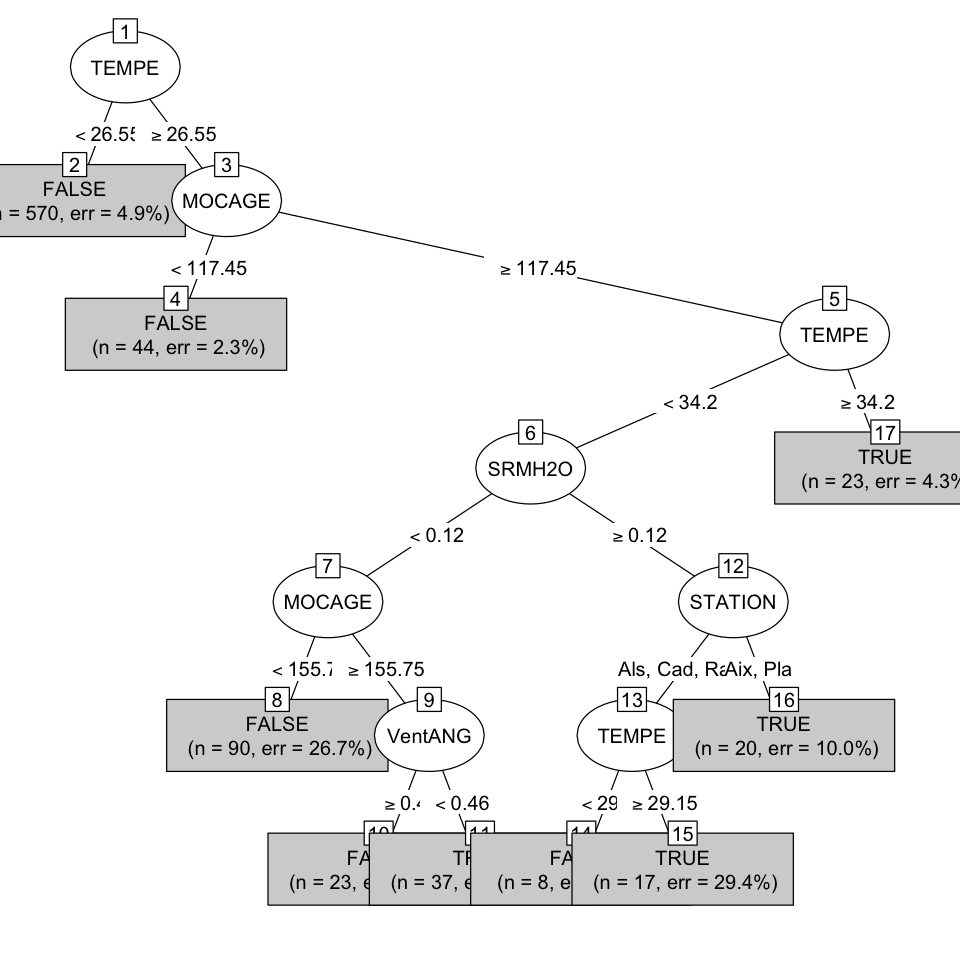

In [130]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

## Prévision de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision.

In [131]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 830.7395

In [132]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.treer>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   157   24
  TRUE      9   19

In [133]:
# Même chose pour l'arbre de discrimination
table(pred.treeq,datestq[,"DepSeuil"])

          
pred.treeq FALSE TRUE
     FALSE   162   22
     TRUE      4   21

***
## Question

* Quelle stratégie semble meilleure à ce niveau?
    * d'après les matrices de confusion ci-dessus c'est l'arbre de discrimination 

***

## Courbes ROC

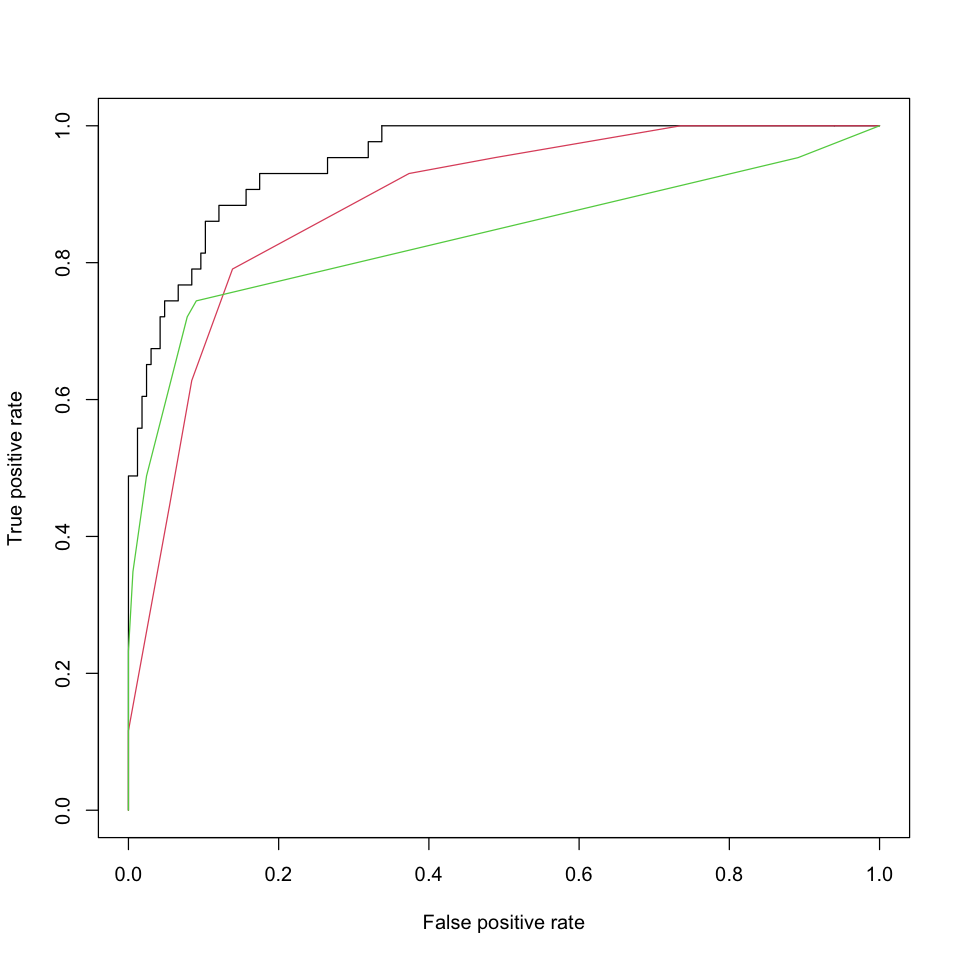

In [134]:
ROCregtree=pred.treer/300
predregtree=prediction(ROCregtree,datestq$DepSeuil)
perfregtree=performance(predregtree,"tpr","fpr")
ROCdistree=predict(tree.dis,newdata=datestq,type="prob")[,2]
preddistree=prediction(ROCdistree,datestq$DepSeuil)
perfdistree=performance(preddistree,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer
plot(perflogit,col=1)
plot(perfregtree,col=2,add=TRUE) 
plot(perfdistree,col=3,add=TRUE)

***
## Questions 

* Comparer les qualités de prévision.
    * logit est meilleure que regtree et disttree. L'arbre de régression (regtree) et aussi plus performant que l'arbre de discrimination (distree)

* Une meilleure méthode se dégage-t-elle?
    * oui la méthode logit
***

# TP 6. Réseau de neurones


## Introduction

Il s'agit d'estimer un modèle de type perceptron avec en entrée les variables qualitatives ou quantitatives et en sortie la variable à prévoir. Des fonctions R pour l'apprentissage d'un perceptron élémentaire ont été réalisées par différents auteurs et sont accessibles sur le réseau. La librairie nnet de (Ripley, 1999), est limitée au perceptron à une couche. Ce n'est pas de l'apprentissage profond ! mais suffisant dans bien des cas. Une librairie R associée au logiciel éponyme H2O propose des réseaux à plusieurs couches et "convolutionnels".
Comme pour les arbres, la variable à expliquer est soit quantitative soit qualitative ; la fonction de transfert du neurone de sortie d'un réseau doit être adaptée en conséquence.

*** 
## Questions

* Quelle fonction de transfert pour le dernier neurone en régression ?
    * la fonction linéaire identité
* Quelle focntion de transfert pour le dernier neuronne en discrimination binaire?
    * la fonction sigmoide
* Quid de la discrimination avec plusieurs classes?
    * la fonction softmax
* Quel est le choix par défaut pour les neurones de la couche cachée?
    * la fonction sigmoide
    
Différentes stratégies sont proposées pour éviter le sur-apprentissage. La première conciste à optimiser le nombre de neurones sur la couche cachée. Très approximativement il est d'usage de considérer, qu'en moyenne, il faut une taille d'échantillon d'apprentissage 10 fois supérieure au nombre de poids c'est-à-dire au nombre de paramètres à estimer. On remarque qu'ici la taille de l'échantillon d'apprentissage (832) est modeste pour une application raisonnable du perceptron. Seuls des nombres restreints de neurones peuvent être considérés et sur une seule couche cachée.


* Quel est le paramètre decay de la fonction nnet?
    * c'est un terme de régularisation ridge (decay)
* Indiquer une autre façon déviter le sur-apprentissage.
    * limiter le nombre de neurones ou la durée d’apprentissage 




***

## Cas de la régression

In [135]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(O3obs~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  71
initial  value 12543551.890379 
iter  10 value 2058741.960932
iter  20 value 1961886.664972
iter  30 value 888483.190098
iter  40 value 810324.256141
iter  50 value 708293.237275
iter  60 value 692624.354631
iter  70 value 665360.731086
iter  80 value 644576.172175
iter  90 value 626877.210263
iter 100 value 616212.140479
iter 110 value 599898.657262
iter 120 value 584883.928052
iter 130 value 577814.932250
iter 140 value 565681.881833
iter 150 value 550188.265579
iter 160 value 534621.476217
iter 170 value 532277.292659
iter 180 value 530148.178877
iter 190 value 526511.460336
iter 200 value 518805.850946
iter 210 value 516492.052836
iter 220 value 515183.268816
iter 230 value 513404.801044
iter 240 value 513134.274564
iter 250 value 512693.333760
iter 260 value 511673.162730
iter 270 value 511134.392452
iter 280 value 510723.974915
iter 290 value 510339.540909
iter 300 value 509939.404110
iter 310 value 509798.035937
iter 320 value 509795.963232
iter 320 value 509795.9

a 12-5-1 network with 71 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
 -12.10   -0.05    0.01    0.33    1.89    0.55    2.13    0.91    0.08    0.31 
i10->h1 i11->h1 i12->h1 
   8.74   -0.96    1.45 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   2.40    3.80    0.11    1.66  -18.00   21.36   -0.86  -16.17   -3.94   -2.14 
i10->h2 i11->h2 i12->h2 
 -16.80  -20.79    6.65 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -0.82   -7.76   -0.35    3.89  -16.33  -12.42   -0.23   10.70    3.83    0.76 
i10->h3 i11->h3 i12->h3 
  -0.64  -10.97    4.18 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
   4.83   -9.60   -0.74    1.61    8.28   11.59    7.81    3.41    3.10  -31.05 
i10->h4 i11->h4 i12->h4 
   8.85   10.31   -7.54 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9

La commande donne la "trace" de l'exécution avec le comportement de la convergence mais le détail des poids de chaque entrée de chaque neurone ne constituent pas des résultats très explicites ! Contrôler le nombre de poids estimés.
L'optimisation des paramètres nécessite encore le passage par la validation croisée. Il n'y a pas de fonction dans la librairie nnet permettant de le faire mais la fonction tune.nnet de la librairie e1071 est adaptée à cette démarche.

In [ ]:
library(e1071)
plot(tune.nnet(O3obs~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))
plot(tune.nnet(O3obs~.,data=datappr,size=4:5,decay=1:10))

Faire éventuellement varier la grille des paramètres (zoom), noter la taille et le decay optimaux. Il faudrait aussi faire varier le nombre total d'itérations. Cela risque de prendre un peu de temps ! Noter également que chaque exécution donne des résultats différents... il n'est donc pas très utile d'y passer beaucoup de temps !
Ré-estimer le modèle supposé optimal avant de tracer le graphe des résidus.

In [ ]:
nnet.reg=nnet(O3obs~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"O3obs"]
plot.res(fit.nnetr,res.nnetr,titre="")

## Cas de la discrimination

In [ ]:
# apprentissage
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

La validation croisée est toujours nécessaire afin de tenter d'optimiser les choix en présence : nombre de neurones, decay et éventuellement le nombre max d'itérations.
L'initialisation de l'apprentissage d'un réseau de neurone comme celle de l'estimation de l'erreur par validation croisée sont aléatoires. Chaque exécution donne donc des résultats différents. À ce niveau, il serait intéressant de construire un plan d'expérience à deux facteurs (ici, les paramètres de taille et decay) de chacun trois niveaux. Plusieurs réalisations pour chaque combinaison des niveaux suivies d'un test classique d'anova permettraient de se faire une idée plus juste de l'influence de ces facteurs sur l'erreur.
Noter la taille et le decay optimaux et ré-estimer le modèle pour ces valeurs.

In [ ]:
plot(tune.nnet(DepSeuil~.,data=datappq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

In [ ]:
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=1)

# Prévisions de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision.

In [ ]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"O3obs"])^2)/nrow(datestr)

In [ ]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.nnetr>150,datestr[,"O3obs"]>150)

In [ ]:
# Même chose pour la discrimination
table(pred.nnetq>0.5,datestq[,"DepSeuil"])

## Courbes ROC

In [ ]:
rocnnetr=pred.nnetr/300
prednnetr=prediction(rocnnetr,datestq$DepSeuil)
perfnnetr=performance(prednnetr,"tpr","fpr")
rocnnetq=pred.nnetq
prednnetq=prediction(rocnnetq,datestq$DepSeuil)
perfnnetq=performance(prednnetq,"tpr","fpr")
# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col=1) #noir
plot(perfnnetr,col=4,add=TRUE) #bleu
plot(perfnnetq,col=7,add=TRUE) #orange

***
## Question

* Qu'indique la comparaison des coubes ROC?

    * Les courbes ROC ci-dessus réalisées sur l’échantillon test permettent de comparer les différentes méthodes (logit,nnetr,nnetq), pour l’échantillon test utilisé ici, la méthode la plus efficace pour prévoir le dépassement du pic d’ozone est logit (sa courbe ROC est presque "toujours" au-dessus des deux autres méthodes) puis l'utilisation du réseau de neurones (nnetr).

***

***


# Conclusion général du cours 

Pourquoi utiliser R et mon appréhension envers ce langage ?

La data science est devenue le domaine le plus populaire du 21e siècle. C'est parce qu'il existe un besoin urgent d'analyser et de construire des connaissances à partir des données. Les industries transforment les données brutes en produits de données fournis. Pour ce faire, il faut disposer de plusieurs outils importants qui permettent de transformer les données brutes. Le langage utilisé et le plus populaire est Python (celui que je connais déja, utilise souvent en entreprise et dans les autres cours), mon appriorié était pourquoi utiliser R alors que je connais déja Python qui est bien plus simple, puissant et très utilisé (impréssion du début).

Après un certain temps d'utilisation j'ai compris pourquoi c'est le premier choix de nombreux statisticiens qui veulent s'impliquer dans la conception de modèles statistiques pour résoudre des problèmes complexes. R contient une énormement de paquets qui font appel à toutes les formes de disciplines comme l'astronomie, la biologie, etc. Alors que R était à l'origine utilisé à des fins académiques, il est maintenant utilisé dans les industries également (chez EDF aussi pour l'analyse des données financières notamment), très puissant, plus rapide que python et contient énormement de fonction pour l'analyse des données et pour effectuer des modélisations statistiques complexes. De plus, R fournit également un support pour les opérations sur les tableaux, les matrices et les vecteurs. R est célèbre pour ses bibliothèques graphiques qui permettent aux utilisateurs de délimiter des graphiques esthétiques et de les rendre intuitifs pour les utilisateurs. De plus, R permet à ses utilisateurs de développer des applications web en utilisant R Shiny, qui est utilisé pour intégrer des visualisations dans des pages web et fournit un niveau élevé d'interaction aux utilisateurs. En outre, l'extraction de données est une partie importante de la science des données. Pour ce faire, R offre la possibilité d'interfacer votre code R avec des systèmes de gestion de bases de données (sql, nosql).


Ce qui m'a le plus surpris en utilisant R c'est que les graphiques sont fait pour "parler". Ils sont intuitif, montre facilement le concept statistiques à éxploiter et sans forcément passer énormement de temps à les configurer.





La préparation de ces tp m'a appris: 
   * la programmation en R
   * charger les données, les manipuler, crée des colonnes, dataframe et gerer les différents types
   * à proposer un étude statistiques unidimensionnelle et multidimensionnelle en R (Effectifs, effectifs cumulés, fréquences et fréquences cumulées, Représentations graphiques, Le diagramme en bâtons + Le diagramme cumulatif, La médiane (quantile d’ordre 1/2) et les quartiles (quantile d’ordre1/4, 3/4), La moyenne, La dispersion, La variance et l’écart–type)
   * faire une réduction de dimension (ACP/PCA) sur mes données, diviser les données en échantillons test et d'apprentissage en gardant une distirbution des données similaires
   * utiliser des modèles de régréssion linaire (avec penalisation L1/Lasso), découvrir l'importance des variables dans la prédiction, choisir les paramètres de régularisation par validation croisée
   * utiliser un modèle de prévision binomiale et comparer avec d'autres modèles (linaires, quadratiques)
   * appliquer un modèle de régréssion logisitque, trouver les bon paramètres, utiliser la comparaison avec la courbe ROC
   * la partie sur l'analyse discriminante m'a appris les notion d'hypothèses d'homo ou d'hétéroscédasticité, comment appliquer le modèle knn sur les données, comment l'évaluer (rechercher le k optimal) mais aussi ses faiblesses
   * la partie sur les arbres binaires m'a appris à appliquer un arbre de décision binaire, changer les paramètres (gini, entropie), comprendre le résultat des changements de paramètres ainsi que comment les intérpréter. De plus commprendre pourquoi élaguer un arbre ce que cela signifie (calcul optimaux, rapidité, meilleure visualisation)
   * la dernière partie sur les réseau de neurones m'a appris comment implémenter et utiliser les réseaux de neurones en R sur mes données, les différents fonctions de transfert et quand les utiliser, le compromis entre variance et bias, la recherche de compromis entre compléxité (nombre de couches) et résultat voulue et comment les comparer avec les courbes ROC
   

**+++ : j'ai découvert les courbes ROC que je pensais inutile ou juste pour faire jolie avant, aujourd'hui j'ai vraiment compris la puissance des courbres ROC face aux simple matrice de confusion et les utilises dans d'autres matières et aussi au travail pour évaluer mes modèles.**


***